In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
%matplotlib inline
import torch
import pickle
import os
from rdflib import Graph
import rdflib as rdf
import os
from scipy import sparse
import matplotlib.colors as mcolors
import re
from collections import defaultdict
from matplotlib.colors import Normalize
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

c:\Users\luisa\anaconda3\envs\aifb\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def read_all_pickle_without_ending(path):
    """
    Read all pickle files in a directory and return a list of the dataframes.
    """
    files = os.listdir(path)
    files = [file for file in files if file.endswith(".pkl")]
    files.sort()
    dfs = []
    for file in files:
        dfs.append(pd.read_pickle(path + file))
    return dfs

def readallcsvinpath(path):
    """
    Read all csv files in a directory and return a list of the dataframes.
    """
    fil = os.listdir(path)
    fil = [file for file in fil if file.endswith(".csv")]
    fil.sort()
    dfs = []
    for file in fil:
        dfs.append(pd.read_csv(path + file))
    return dfs
def get_nameincolfor_index(df,id_list):
    """
    # df: dataframe
    # id_list: list of ids
    # return: list of names of ids
    """
    name_list=[]
    for i in id_list:
        name_list.append(df[df.index==i][0].values[0])
    return name_list
def cut_string(list):
    for i in range(len(list)):
        list[i] = list[i].split('mov')[1]
    return list
def parse_tensor_string(tensor_str):
    values_str = re.search(r'\[(.*?)\]', tensor_str).group(1)
    values = [float(val) for val in values_str.split(', ')]
    return torch.tensor(values)

In [3]:
#files = read_all_pickle_without_ending('out/AIFB/RGCN_no_emb/')
csv = readallcsvinpath('out/AIFB/RGCN_no_emb/')
pred_before = torch.load('out/AIFB/RGCN_no_emb/pred_before.pt').to_dense().detach().numpy()
test_file = pd.read_csv('data/AIFB/testSet.tsv', sep='\t')

i2n = pd.read_pickle('out/AIFB/RGCN_no_emb/i2n.pkl')
n2i = {n:i for i, n in enumerate(i2n)}
i2r = pd.read_pickle('out/AIFB/RGCN_no_emb/i2r.pkl')

test_list = pd.read_pickle('out/AIFB/RGCN_no_emb/test_list.pkl')
test_idx = [n2i[name] for name, _ in test_list.items()]
for i,n in enumerate(i2n):
    if i == 234:
        print(n)

i2r
r2i = {r:i for i, r in enumerate(i2r)}
pred_before[2534]

http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2137instance


array([0.45217708, 0.08076923, 0.4080773 , 0.05897653], dtype=float32)

In [4]:
r2i

{'http://www.w3.org/1999/02/22-rdf-syntax-ns#type': 0,
 'http://swrc.ontoware.org/ontology#author': 1,
 'http://swrc.ontoware.org/ontology#projectInfo': 2,
 'http://swrc.ontoware.org/ontology#publication': 3,
 'http://swrc.ontoware.org/ontology#isAbout': 4,
 'http://swrc.ontoware.org/ontology#hasProject': 5,
 'http://swrc.ontoware.org/ontology#publishes': 6,
 'http://swrc.ontoware.org/ontology#finances': 7,
 'http://swrc.ontoware.org/ontology#worksAtProject': 8,
 'http://swrc.ontoware.org/ontology#editor': 9,
 'http://www.w3.org/2002/07/owl#onProperty': 10,
 'http://swrc.ontoware.org/ontology#isWorkedOnBy': 11,
 'http://www.w3.org/2000/01/rdf-schema#subClassOf': 12,
 'http://swrc.ontoware.org/ontology#financedBy': 13,
 'http://swrc.ontoware.org/ontology#carriedOutBy': 14,
 'http://swrc.ontoware.org/ontology#dealtWithIn': 15,
 'http://swrc.ontoware.org/ontology#carriesOut': 16,
 'http://www.w3.org/2002/07/owl#allValuesFrom': 17,
 'http://www.w3.org/2002/07/owl#inverseOf': 18,
 'http://s

In [6]:
i2n[2481]

'http://www.aifb.uni-karlsruhe.de/Publikationen/viewPublikationOWL/id1134instance'

In [18]:
path = 'out/AIFB/RGCN_no_emb/'
pred_before = pred_before[test_idx]
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
fil.sort()
dfs = []
fil = fil[:len(fil)-1]
for file in fil:
    dfs.append(torch.load(path + file).to_dense()[test_idx].detach().numpy())
print(len(fil))
diff = {}
i=0                                
for i in range(len(fil)):
    minus = (dfs[i] - pred_before)
    diff[i] = minus
    # if minus.sum() != 0:
    #     diff[i] = minus
#len(diff)

12


## Pred Änderung RGCN no emb before/after

#### Relevance that prediction changes, if relevance is changed

In [6]:
classes_before = pred_before.argmax(axis=1)
count_changed,total_pred = 0,0
ch_index = []
cl_after = []
count_cl_after = []
for i in range(len(dfs)):
    classes = dfs[i].argmax(axis=1)
    changed_pred = np.sum([classes != classes_before])
    changed_index = np.where(classes != classes_before)[0]
    count_changed += changed_pred
    total_pred += len(classes)
    ch_index.append(changed_index)
    cl_after.append(classes)
    count_cl_after.append(np.unique(classes, return_counts=True))
    print(changed_pred)
print(len(dfs), total_pred,  count_changed)
score = count_changed / total_pred
print(ch_index[1])
print(score)
count_classes_before = np.unique(classes_before, return_counts=True)
count_classes_before



0
6
0
0
0
0
0
0
0
0
0
0
12 432 6
[ 3  5 16 19 20 27]
0.013888888888888888


(array([0, 2], dtype=int64), array([26, 10], dtype=int64))

In [7]:
triples = files[2]
#print(triples[:20])
num_rels = triples[:, 1].max() + 1
print(num_rels)
inverse_relations = torch.cat([triples[:, 2, None], triples[:, 1, None] + num_rels, triples[:, 0, None]], dim=1)
#inverse_relations[:20]
files[2][:,1].max()

NameError: name 'files' is not defined

12
0
pred_after129adapt_1226_24.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


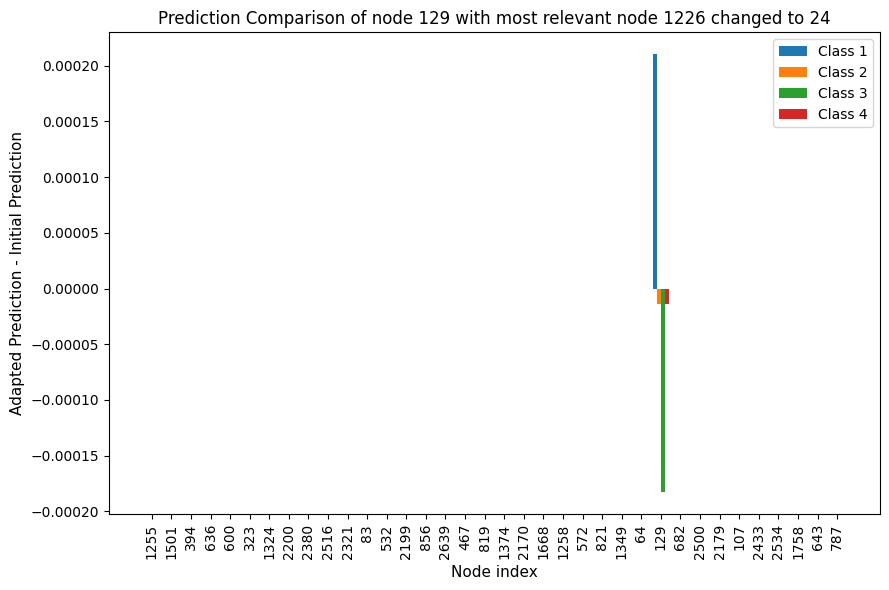

1
pred_after2170adapt_tensor([  27, 1226])_35.pt
Prediction Score before:  [[0.04724665 0.02722972 0.90814257 0.01738106]
 [0.05708399 0.02952954 0.89322495 0.0201615 ]
 [0.04732933 0.02731253 0.90791184 0.0174463 ]
 [0.06204214 0.0317647  0.8857731  0.0204201 ]
 [0.05449843 0.03028713 0.8932784  0.021936  ]
 [0.04828803 0.02721197 0.90714175 0.01735829]] Prediction Score after:  [[0.44326052 0.07675727 0.42750087 0.05248132]
 [0.48071232 0.0755879  0.3884555  0.05524424]
 [0.4434159  0.07691251 0.42704418 0.05262735]
 [0.4709964  0.07745851 0.39841053 0.05313455]
 [0.47190768 0.07880487 0.38814983 0.06113771]
 [0.4488781  0.07601137 0.42317262 0.05193789]]
636
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([32,  4], dtype=int64))


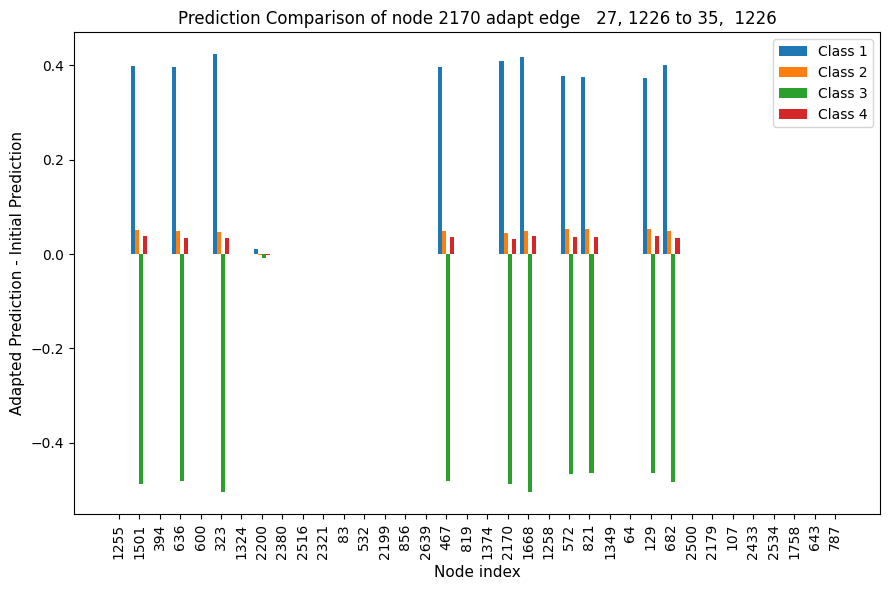

2
pred_after2433adapt_2538_39.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


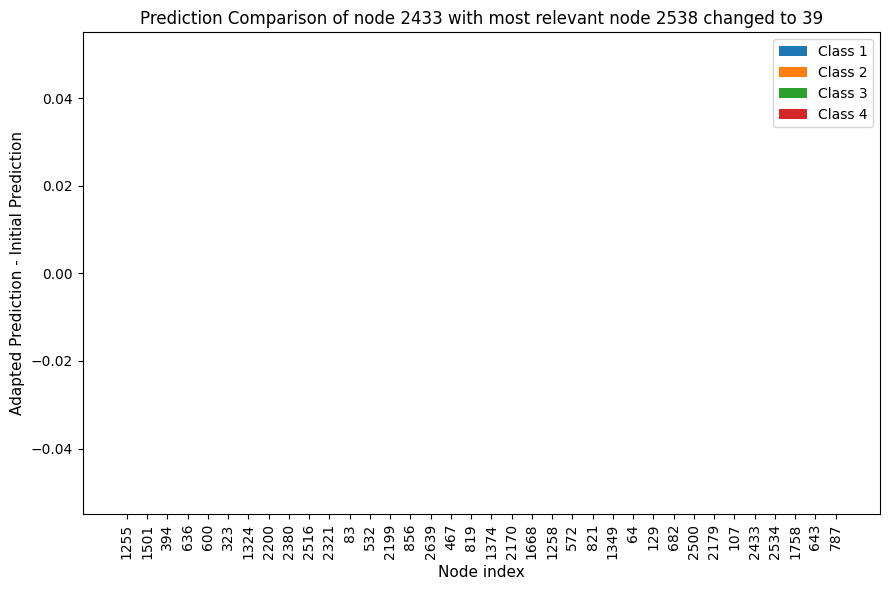

3
pred_after2433adapt_tensor([  27, 2538])_2.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


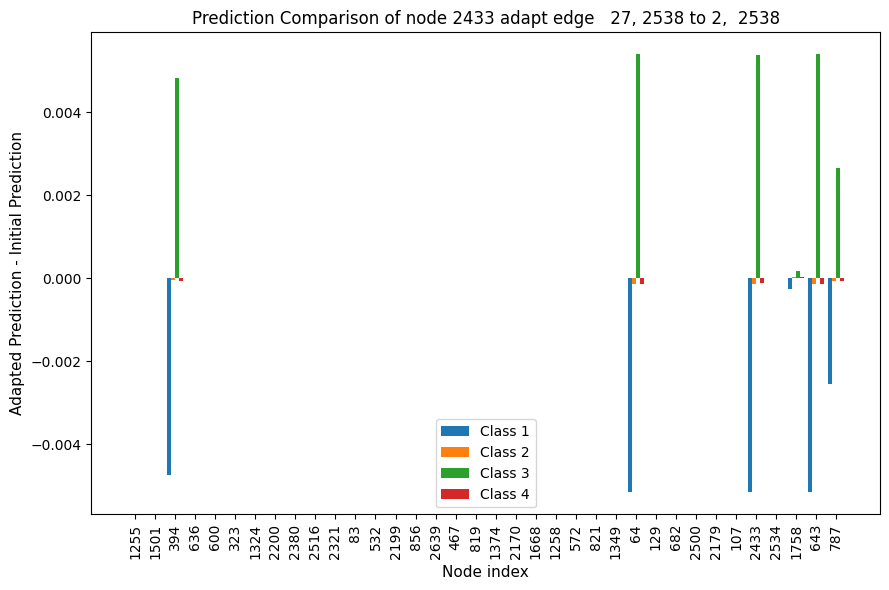

4
pred_after2534adapt_1849_9.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


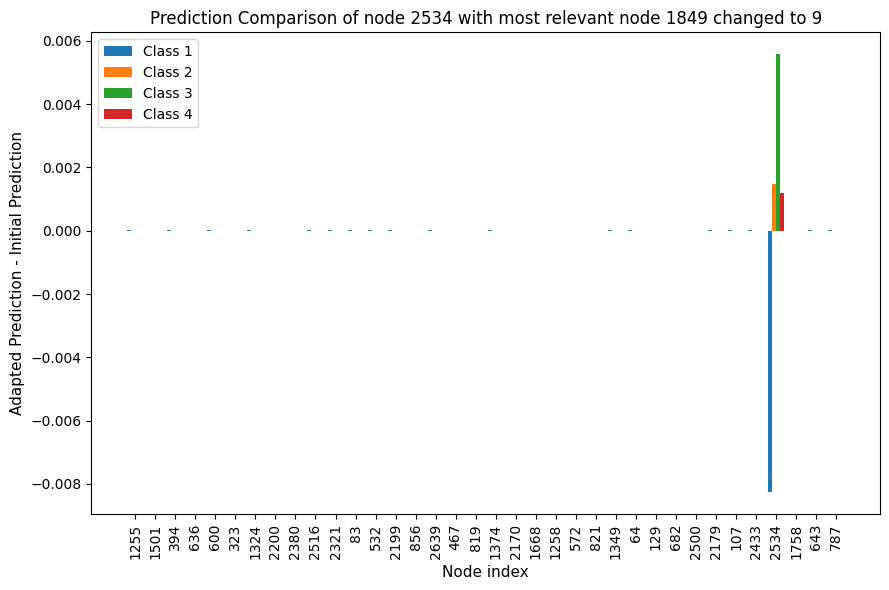

5
pred_after2534adapt_tensor([   0, 1849])_32.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


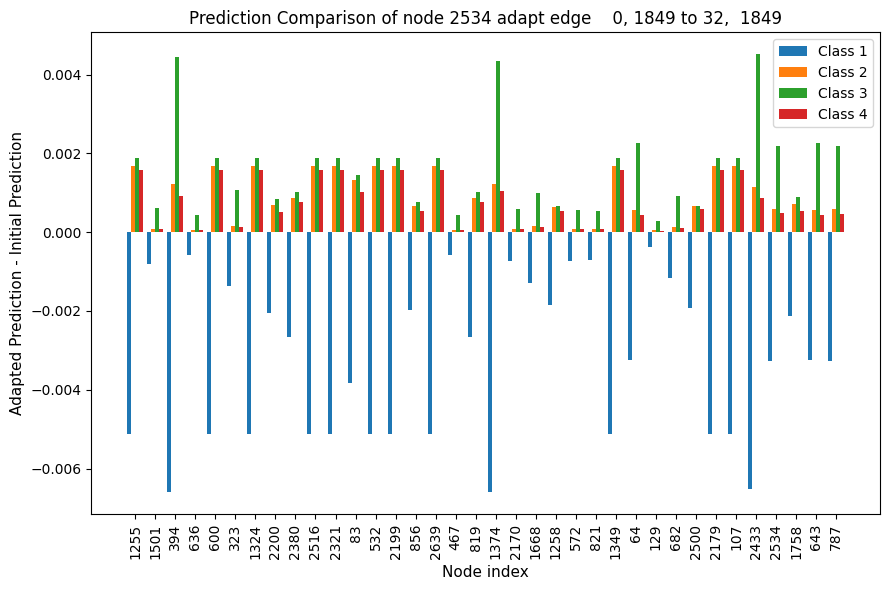

6
pred_after643adapt_2538_12.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


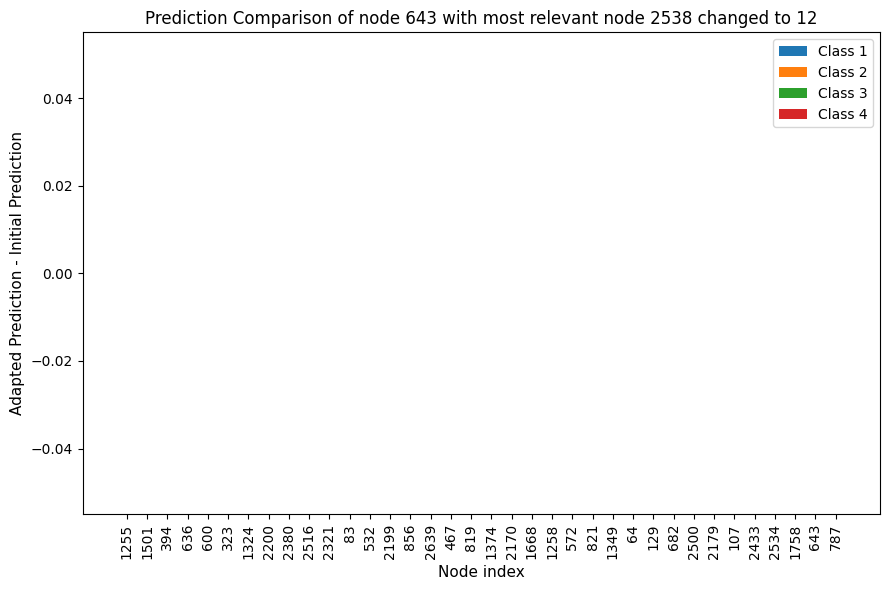

7
pred_after643adapt_tensor([  27, 2538])_34.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


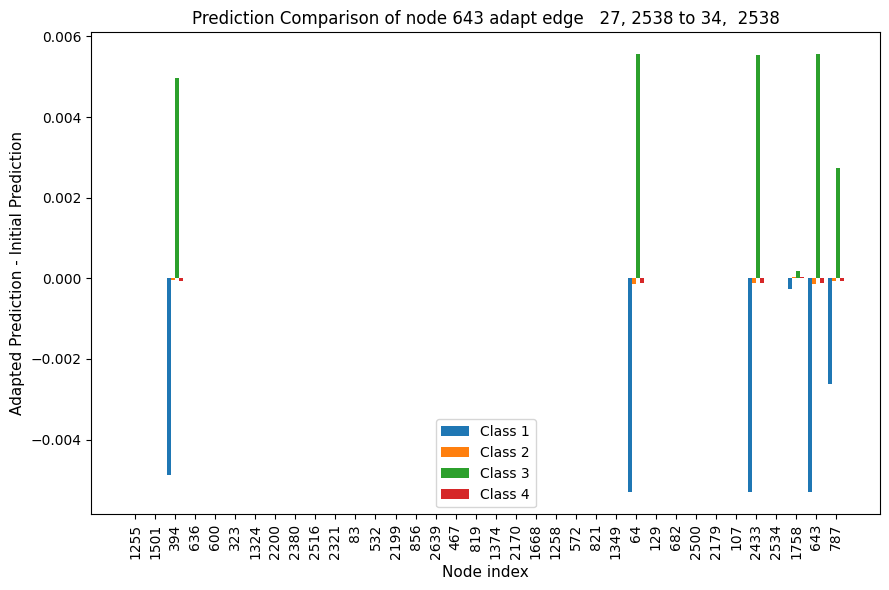

8
pred_after64adapt_2538_21.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


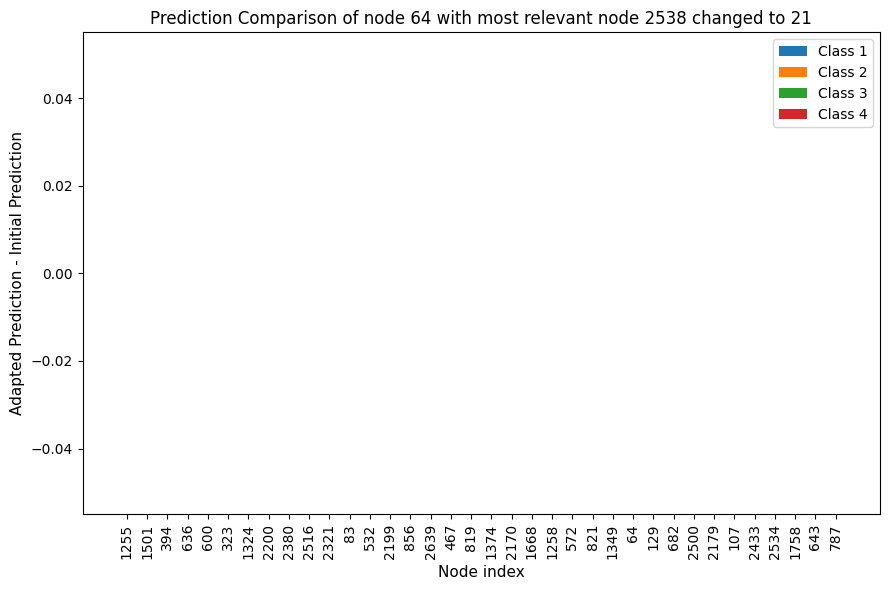

9
pred_after64adapt_tensor([  27, 2538])_25.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


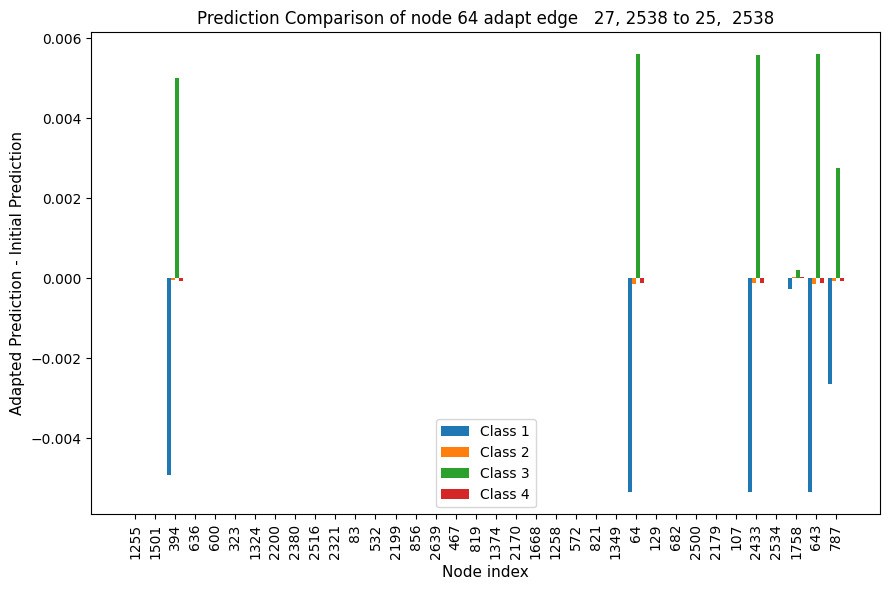

10
pred_after787adapt_1849_7.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


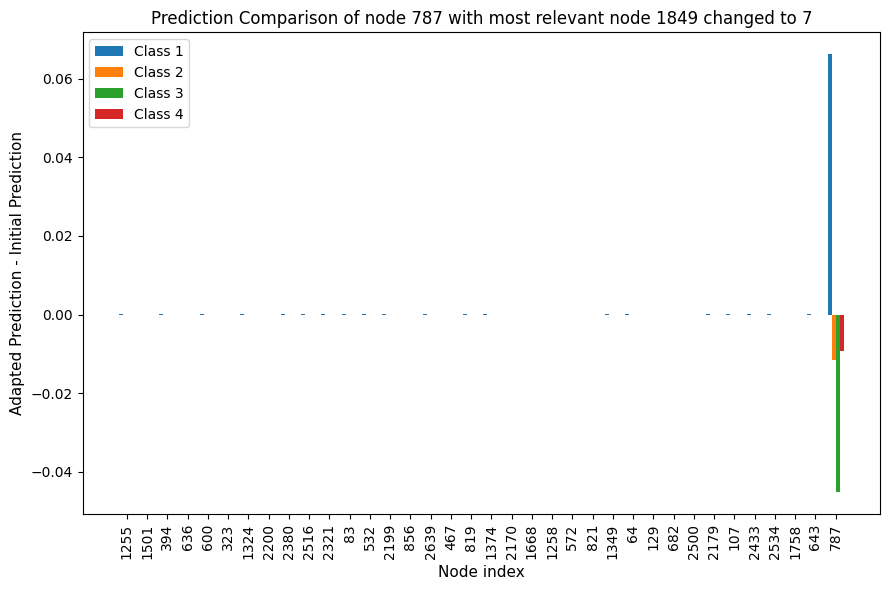

11
pred_after787adapt_tensor([   0, 1849])_1.pt
(array([0, 2], dtype=int64), array([26, 10], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


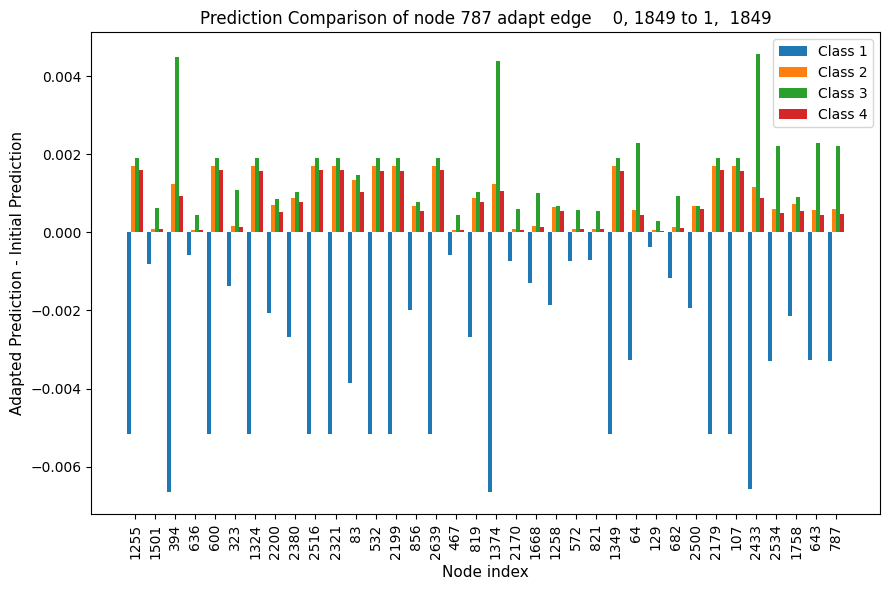

In [8]:
path = 'out/AIFB/RGCN_no_emb/'
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
print(len(diff))
for i in diff:
    print(i)
    percentage_changes = diff[i]
    name = fil[i]
    print(name)
    
    start_node = name.split('pred_after')[1].split('adapt')[0]
    if ch_index[i].size != 0:
        pb = pred_before[ch_index[i]]
        pa = dfs[i][ch_index[i]]
        print('Prediction Score before: ',pb, 'Prediction Score after: ', pa)
        print(test_idx[ch_index[i][0]])
    print(count_classes_before, count_cl_after[i])
    
    # Set the width of each bar
    bar_width = 0.2
    x_positions = np.arange(36)
    # Create a bar plot for each class
    plt.figure(figsize=(9, 6))
    plt.bar(x_positions - 1.5*bar_width, percentage_changes[:, 0], width=bar_width, label='Class 1')
    plt.bar(x_positions - 0.5*bar_width, percentage_changes[:, 1], width=bar_width, label='Class 2')
    plt.bar(x_positions + 0.5*bar_width, percentage_changes[:, 2], width=bar_width, label='Class 3')
    plt.bar(x_positions + 1.5*bar_width, percentage_changes[:, 3], width=bar_width, label='Class 4')

    # Set x-axis labels and tick positions
    plt.xticks(x_positions, test_idx, rotation='vertical', fontsize=10)
    plt.xlabel('Node index', fontsize=11)
    plt.ylabel('Adapted Prediction - Initial Prediction' , fontsize=11)
    if 'adapt_tensor' in name:
        relevant_edge = name.split('[')[1].split(']')[0]
        adapt_edge = name.split('_')[-1].split('.')[0]
        second_node = relevant_edge.split(',')[1]
        plt.title('Prediction Comparison of node {} adapt edge {} to {}, {}'.format(start_node, relevant_edge, adapt_edge, second_node))

    else:
        adapt_to = name.split('_')[2].split('_')[0]
        to_node = name.split('_')[3].split('.')[0]
        plt.title('Prediction Comparison of node {} with most relevant node {} changed to {}'.format(start_node, adapt_to,to_node))
    plt.legend()
    plt.tight_layout()
    plt.show()

In [9]:
csv[2]

Unnamed: 0                     Unnamed: 1  \
0          32  tensor(2534, device='cuda:7')   
1          35   tensor(787, device='cuda:7')   
2          19  tensor(2170, device='cuda:7')   

                                       rel_nodes_new  \
0  tensor([0.0000e+00, 2.2471e-07, 0.0000e+00,  ....   
1  tensor([0.0000e+00, 2.2130e-07, 0.0000e+00,  ....   
2  tensor([0.0000e+00, 2.1091e-07, 0.0000e+00,  ....   

                                       rel_edges_new  max_nodes_new  \
0  tensor([[0., 0., 0.,  ..., 0., 0., 0.],\r\n   ...       1.829980   
1  tensor([[0., 0., 0.,  ..., 0., 0., 0.],\r\n   ...       1.778304   
2  tensor([[0., 0., 0.,  ..., 0., 0., 0.],\r\n   ...       1.296898   

   pos_max_nodes_new  min_nodes_new  pos_min_nodes_new  max_edges_new  \
0               1849      -1.214575               1860       1.672034   
1               1849      -0.722574               1860       1.619033   
2               1849      -1.153915               1226       1.153903   

        pos_max_edges_new  min_edges_new       pos_min_edges_new  
0  tensor([[   0, 1849]])      -1.201397  tensor([[  27, 1860]])  
1  tensor([[   0, 1849]])      -0.702185  tensor([[  27, 1860]])  
2  tensor([[   0, 1849]])      -1.082457  tensor([[  27, 1226]])

#### Prediction changed from working group 0 to working group 2.

In [10]:
edge_index_plus = files[0]
edge_type_plus = files[1]
edges_list = files[2]
i2n = files[3]
i2r = files[4]
test_idx = files[5]

NameError: name 'files' is not defined

In [11]:
large_after_nodes = csv[0]
large_after_edges = csv[1]
edges = csv[2]
nodes = csv[3]
small_after_nodes = csv[4]
small_after_edges = csv[5]

# Auswertung Relevanzen
#### Average relevance nodes

In [31]:
path = 'out/AIFB/RGCN_no_emb/relevances/'
dist = 'out/AIFB/RGCN_emb/DistMult/relevances/'
transe = 'out/AIFB/RGCN_emb/TransE/relevances/'
transh = 'out/AIFB/RGCN_emb/TransH/relevances/'
list_paths = [path,dist,transe,transh]
fil = os.listdir(path)
dist2 = os.listdir(dist)
transe2 = os.listdir(transe)
transh2 = os.listdir(transh)
rel_before = [file for file in fil if file.startswith("relevances_node_")]
rel_bef_dist = [file for file in dist2 if file.startswith("relevances_node_")]
rel_bef_transe = [file for file in transe2 if file.startswith("relevances_node_")]
rel_bef_transh = [file for file in transh2 if file.startswith("relevances_node_")]
count_path= 0
for l in [rel_before,rel_bef_dist,rel_bef_transe,rel_bef_transh]:
    path2 = list_paths[count_path]
    count_path += 1
    print('######',path2,'######')
    mean_rel_ges = 0 
    count_zero_ges = 0
    count_positive_ges = 0
    count_negative_ges = 0 
    mean_positive = 0
    mean_negative = 0
    max_positive = 0
    max_negative = 0
    count = 0
    #print(path2)
    for rel in l:
        #print(rel)
        #print(path2)
        rb = torch.load(path2 + rel)
        rb_non_zero = rb[rb != 0]
        rb_count_zero = rb[rb == 0]
        mean_rel= rb_non_zero.mean(axis=0)
        rb_count_positive = rb[rb > 0]
        #print(rb_count_positive.max())
        rb_count_negative = rb[rb < 0]
        mean_rel_ges += mean_rel
        count_zero_ges += len(rb_count_zero)
        count_positive_ges += len(rb_count_positive)
        count_negative_ges += len(rb_count_negative)
        count += 1
        mean_positive += rb_count_positive.mean(axis=0)
        if len(rb_count_negative) != 0:
            mean_negative += rb_count_negative.mean(axis=0)
        if float(rb_count_positive.max(axis=0)[0]) >= max_positive:
            max_positive = float(rb_count_positive.max(axis=0)[0])
            print(rb_count_positive.max(axis=0)[0])
            print(max_positive)
        if len(rb_count_negative) != 0:
            if float(rb_count_negative.min(axis=0)[0]) < max_negative:
                max_negative = float(rb_count_negative.min(axis=0)[0])
        else:
            max_negative = 0
    mean_positive_ges = mean_positive / count
    mean_negative_ges = mean_negative / count
    percentage_zero =   count_zero_ges / (len(rb)* len(l))
    percentage_positive = count_positive_ges / (len(rb)* len(l))
    percentage_negative = count_negative_ges / (len(rb)* len(l))
    mean_rel_ges = mean_rel_ges / count
    print('Average_relevance without zero: ',mean_rel_ges, '\n',
            'Proportion 0 relevance: ', percentage_zero, '\n',
            'Proportion positive relevance: ', percentage_positive, '\n',
            'Proportion negative relevance: ',percentage_negative, '\n',
            'Average positive relevance: ', mean_positive_ges, '\n',
            'Average negative relevance: ',mean_negative_ges, '\n',
            'Max positive relevance: ', max_positive, '\n',
            'Max negative relevance: ', max_negative, '\n',)

###### out/AIFB/RGCN_no_emb/relevances/ ######
tensor(0.6178, grad_fn=<MaxBackward0>)
0.6177656650543213
tensor(0.6539, grad_fn=<MaxBackward0>)
0.6539342403411865
tensor(1.3575, grad_fn=<MaxBackward0>)
1.3575454950332642
tensor(1.8009, grad_fn=<MaxBackward0>)
1.8009288311004639
Average_relevance without zero:  tensor(0.0008, grad_fn=<DivBackward0>) 
 Proportion 0 relevance:  0.5752400548696845 
 Proportion positive relevance:  0.22177150695669215 
 Proportion negative relevance:  0.20298843817362336 
 Average positive relevance:  tensor(0.0024, grad_fn=<DivBackward0>) 
 Average negative relevance:  tensor(-0.0009, grad_fn=<DivBackward0>) 
 Max positive relevance:  1.8009288311004639 
 Max negative relevance:  -1.7770471572875977 

###### out/AIFB/RGCN_emb/DistMult/relevances/ ######
tensor(0.4419, grad_fn=<MaxBackward0>)
0.44185110926628113
tensor(0.7833, grad_fn=<MaxBackward0>)
0.7832766175270081
tensor(0.8370, grad_fn=<MaxBackward0>)
0.8369743824005127
tensor(0.8731, grad_fn=<MaxBack

## Relevanzverteilung vor/nach Tausch Kante

relevances_after_node_node_129adapt_1226_24.pt 129 1226 relevances_node_129.pt


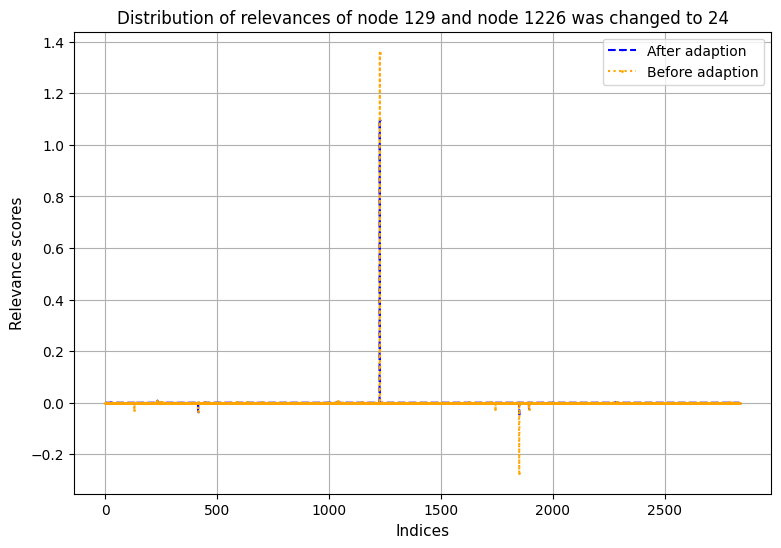

relevances_after_node_node_2433adapt_2538_39.pt 2433 2538 relevances_node_2433.pt


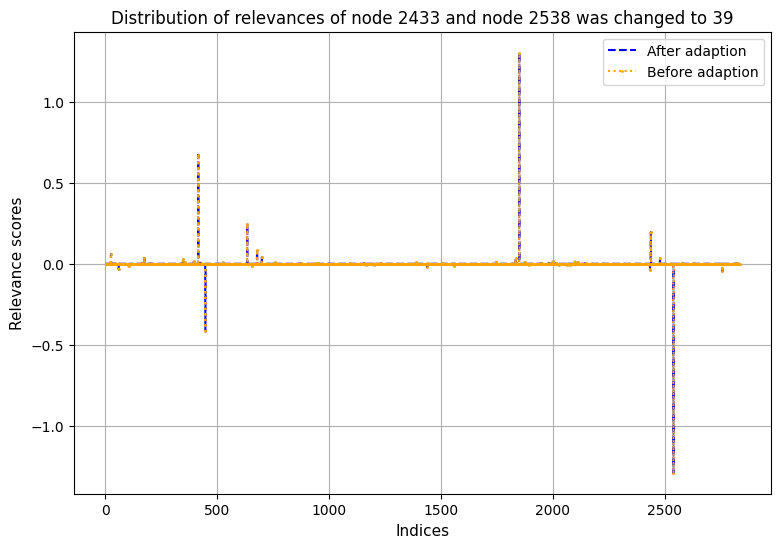

relevances_after_node_node_2534adapt_1849_9.pt 2534 1849 relevances_node_2534.pt


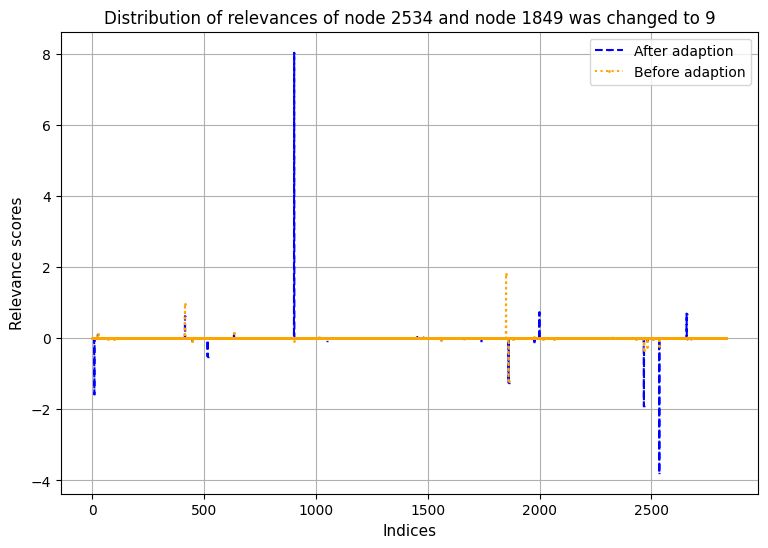

relevances_after_node_node_643adapt_2538_12.pt 643 2538 relevances_node_643.pt


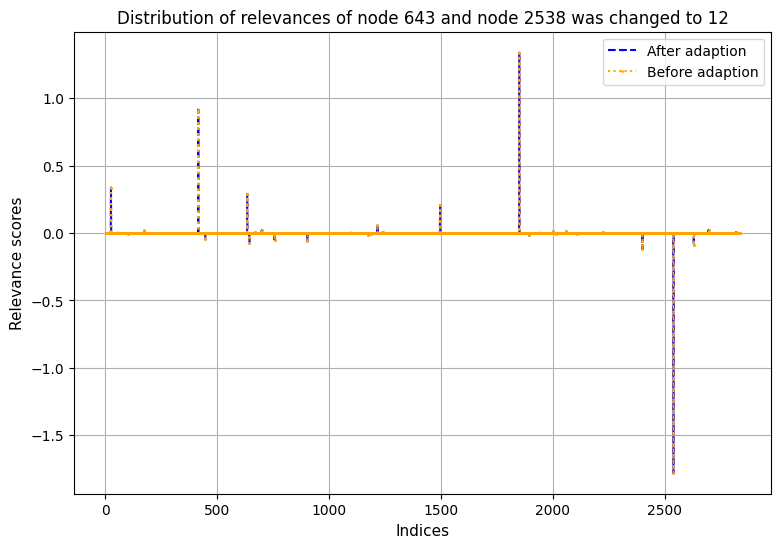

relevances_after_node_node_64adapt_2538_21.pt 64 2538 relevances_node_64.pt


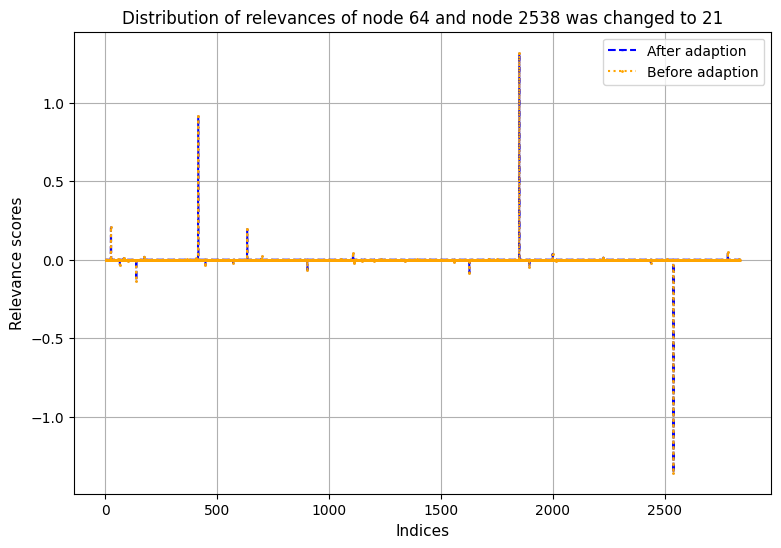

relevances_after_node_node_64adapt_2538_21.pt 64 2538 relevances_node_643.pt


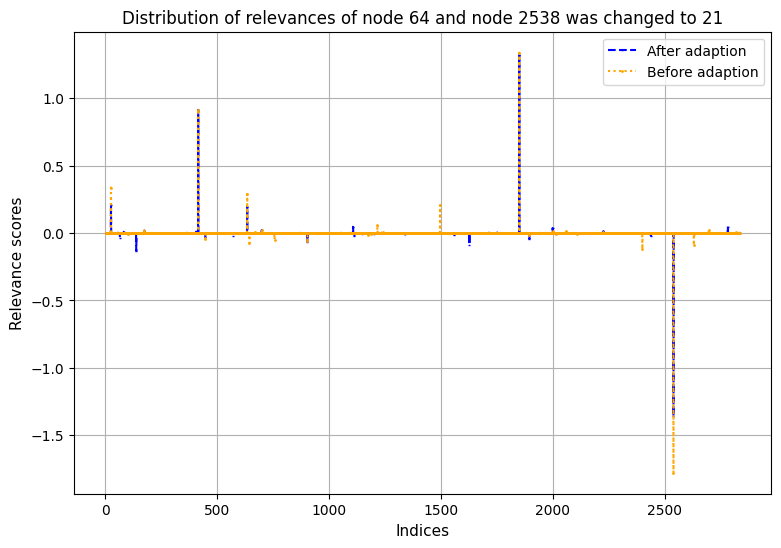

relevances_after_node_node_787adapt_1849_7.pt 787 1849 relevances_node_787.pt


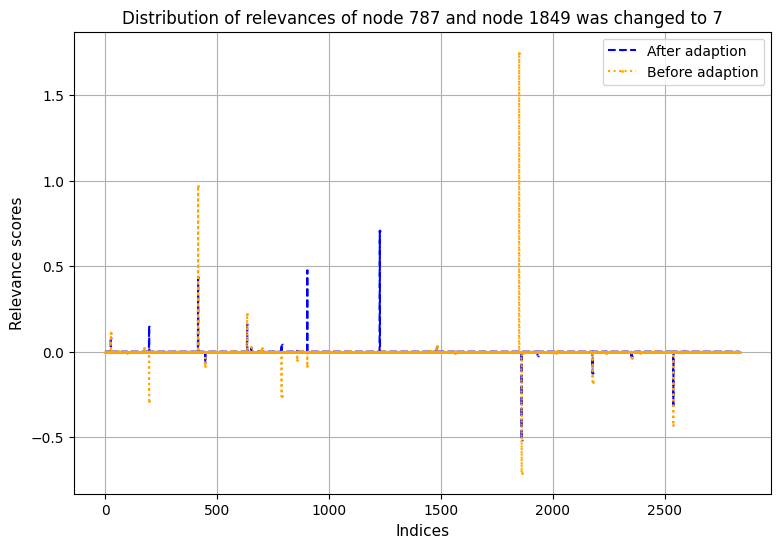

In [529]:
path = 'out/AIFB/RGCN_no_emb/relevances/'

fil = os.listdir(path)

rel_after = [file for file in fil if file.startswith("relevances_after_node_node_")]
rel_before = [file for file in fil if file.startswith("relevances_node_")]
dfs = []
for rel in rel_after:
    ra = torch.load(path+rel).to_dense().detach().numpy()
    node_name = rel.split('node_node_')[1].split('adapt')[0]
    adapt_node = rel.split('adapt_')[1].split('_')[0]
    to_node = rel.split('adapt_')[1].split('_')[1].split('.')[0]
    for rel2 in rel_before:
        

        if node_name in rel2:
            print(rel, node_name, adapt_node, rel2)
            rb = torch.load(path+rel2).to_dense().detach().numpy()
            #ra = np.sort(ra)
            #rb = np.sort(rb)
            #Create an array of indices for the sorted data
            indices = np.arange(1, len(ra) + 1)

            # Create a line plot with different line styles and markers
            plt.figure(figsize=(9, 6))
            plt.plot(indices, ra, color='blue', linestyle='--', marker='_', markersize=2, label='After adaption')
            plt.plot(indices, rb, color='orange', linestyle='dotted', marker='.', markersize=2, label='Before adaption')

            plt.xlabel('Indices', fontsize=11)
            plt.ylabel('Relevance scores', fontsize=11)
            plt.title('Distribution of relevances of node {} and node {} was changed to {}'.format(node_name,adapt_node,to_node))
            plt.legend()
            plt.grid(True)
            plt.show()



In [405]:
path = 'out/AIFB/RGCN_no_emb/relevances/'

fil = os.listdir(path)
rel_after = [file for file in fil if file.startswith("relevances_after_node_node_")]
rel_before = [file for file in fil if file.startswith("relevances_node_")]

relevances_after_node_node_129adapt_1226_24.pt 129 1226 relevances_node_129.pt
0.22713299 -0.25929165
(array([], dtype=int64),)
relevances_after_node_node_2433adapt_2538_39.pt 2433 2538 relevances_node_2433.pt
relevances_after_node_node_2534adapt_1849_9.pt 2534 1849 relevances_node_2534.pt
8.105035 -3.5670042
(array([   9,  414,  515,  902, 1849, 1998, 2465, 2534, 2656], dtype=int64),)


<Figure size 800x600 with 0 Axes>

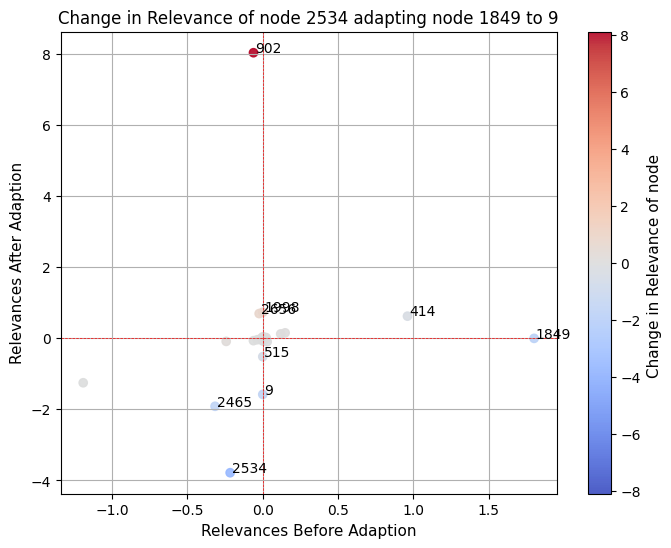

relevances_after_node_node_643adapt_2538_12.pt 643 2538 relevances_node_643.pt
relevances_after_node_node_64adapt_2538_21.pt 64 2538 relevances_node_64.pt
relevances_after_node_node_64adapt_2538_21.pt 64 2538 relevances_node_643.pt
0.41953778 -0.20783153
(array([2538], dtype=int64),)


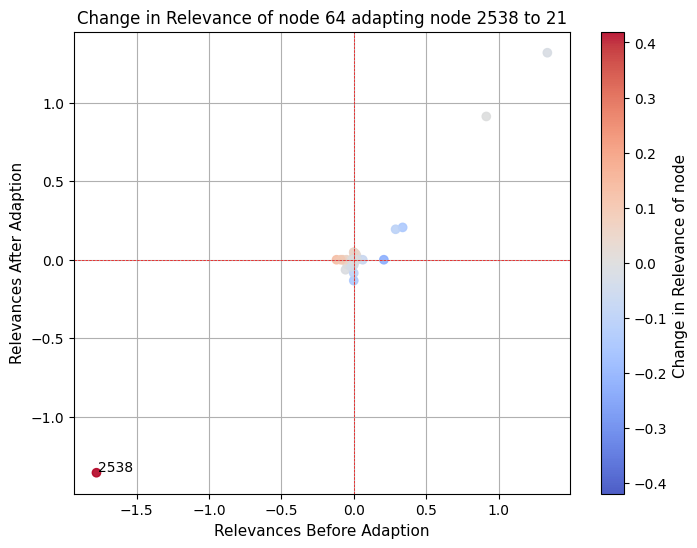

relevances_after_node_node_787adapt_1849_7.pt 787 1849 relevances_node_787.pt
0.7084145 -1.7497579
(array([ 195,  414,  787,  902, 1226, 1849], dtype=int64),)


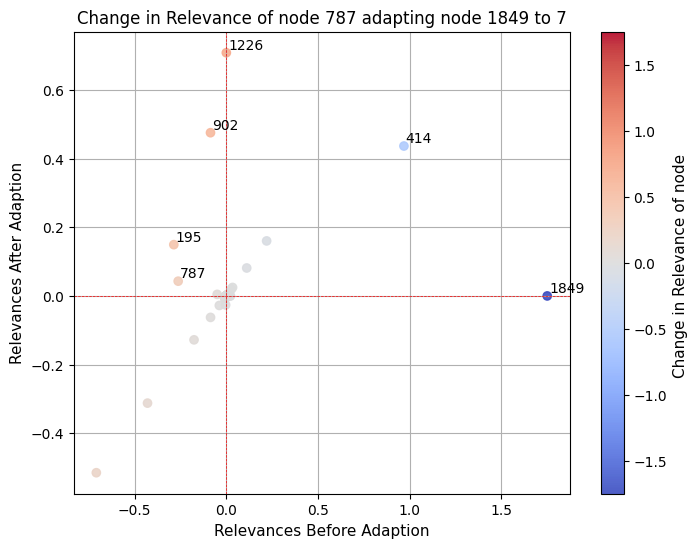

In [531]:
path = 'out/AIFB/RGCN_no_emb/relevances/'

fil = os.listdir(path)

rel_after = [file for file in fil if file.startswith("relevances_after_node_node_")]
rel_before = [file for file in fil if file.startswith("relevances_node_")]
dfs = []
for rel in rel_after:
    ra = torch.load(path+rel).to_dense().detach().numpy()
    node_name = rel.split('node_node_')[1].split('adapt')[0]
    adapt_node = rel.split('adapt_')[1].split('_')[0]
    to_node = rel.split('adapt_')[1].split('_')[1].split('.')[0]
    for rel2 in rel_before:
        

        if node_name in rel2:
            print(rel, node_name, adapt_node, rel2)
            rb = torch.load(path+rel2).to_dense().detach().numpy()
            #nonzero_indices =  np.where((ra <= -0.05) | (ra >= 0.05) )
            change = ra - rb
            if change.sum() == 0:
                continue
            print(change.max(), change.min())
            # Set a threshold for significant change
            threshold = 0.3

            # Filter out points with insignificant change
            nonzero_indices = np.where(np.abs(change) > threshold)
            #nonzero_indices = np.where((change<= -0.00001))#|(change>= 0.000001))
            print(nonzero_indices)
            plt.figure(figsize=(8, 6))
            if change[nonzero_indices].sum() == 0:
                continue
            max_abs_change = np.max(np.abs(change[nonzero_indices]))
            scatter = plt.scatter(
                rb,
                ra,
                c=change,
                cmap='coolwarm',
                alpha=0.9,
                norm=Normalize(vmin=-max_abs_change, vmax=max_abs_change)
            )

            # Add index labels for non-zero relevances
            label_offset = 0.01
            for idx in nonzero_indices[0]:
                plt.text(
                    rb[idx] + label_offset,
                    ra[idx] + label_offset,
                    str(idx),
                    fontsize=10
                )

            # Set x-axis label
            plt.xlabel('Relevances Before Adaption', fontsize=11)

            # Set y-axis label
            plt.ylabel('Relevances After Adaption', fontsize=11)
            plt.title(('Change in Relevance of node {} adapting node {} to {}'.format(node_name, adapt_node, to_node)))
            # Add a colorbar to indicate change
            cbar = plt.colorbar(scatter)
            cbar.set_label('Change in Relevance of node ', fontsize=11)

            # Set plot limits and add grid
            # plt.xlim(-2, 4)
            # plt.ylim(-2, 4)
            plt.axhline(0, color='red', linewidth=0.5, linestyle='dashed')
            plt.axvline(0, color='red', linewidth=0.5, linestyle='dashed')
            plt.grid(True)

            # Show the plot
            plt.show()

## Edges

relevances_after_edge_edge_2170_1226adapt_tensor([  27, 1226])_35.pt 2170  1226 relevances_edge_2170.pt
[[-3.29284626e-03  1.50888914e-03  2.40000000e+01  0.00000000e+00]
 [ 8.57920945e-01 -3.83487903e-02  4.14000000e+02  0.00000000e+00]
 [-3.89779592e-03  1.70069968e-03  4.46000000e+02  0.00000000e+00]
 ...
 [ 1.64505690e-02  4.49066609e-03  1.97300000e+03  4.20000000e+01]
 [ 5.06932614e-04 -2.99208128e-04  2.01100000e+03  4.20000000e+01]
 [-9.98058021e-02  4.48739156e-03  2.17000000e+03  4.20000000e+01]]
-2.6098321903589294e-07
1.2125216983258724 -2.3456904888153076
non : 1


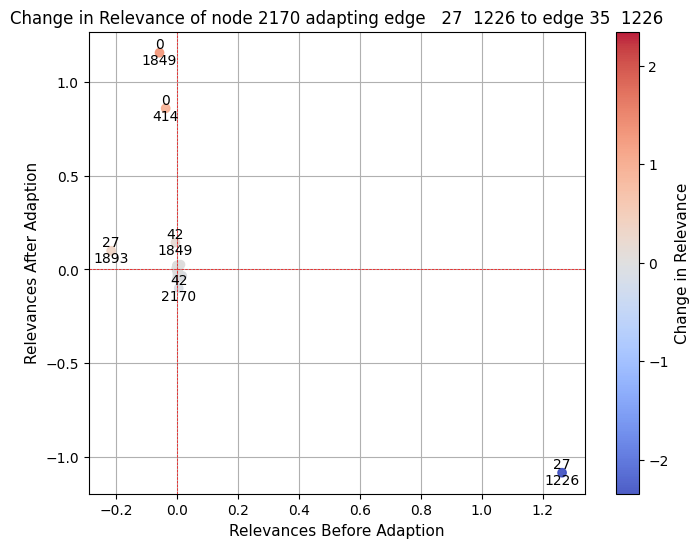

relevances_after_edge_edge_2433_2538adapt_tensor([  27, 2538])_2.pt 2433  2538 relevances_edge_2433.pt
[[ 6.12693578e-02  5.98789752e-02  2.40000000e+01  0.00000000e+00]
 [ 6.85195088e-01  6.73548877e-01  4.14000000e+02  0.00000000e+00]
 [-4.21848744e-01 -4.14678633e-01  4.46000000e+02  0.00000000e+00]
 ...
 [-4.59967880e-04 -4.44579404e-04  2.35400000e+03  4.20000000e+01]
 [ 3.26700434e-02  3.21147554e-02  2.43300000e+03  4.20000000e+01]
 [ 2.42184778e-03  2.38068285e-03  2.81800000e+03  4.20000000e+01]]
3.8178290395762815e-07
0.017417550086975098 -0.04281497001647949
non : 1
relevances_after_edge_edge_2534_1849adapt_tensor([   0, 1849])_32.pt 2534  1849 relevances_edge_2534.pt
[[ 1.21337511e-01  1.19074307e-01  2.40000000e+01  0.00000000e+00]
 [ 9.66663063e-01  9.60433543e-01  4.14000000e+02  0.00000000e+00]
 [-6.32036328e-02 -6.20247461e-02  4.46000000e+02  0.00000000e+00]
 ...
 [-2.68717796e-01 -2.63705641e-01  2.48100000e+03  4.20000000e+01]
 [-2.59997278e-01 -2.55147666e-01  2.53

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

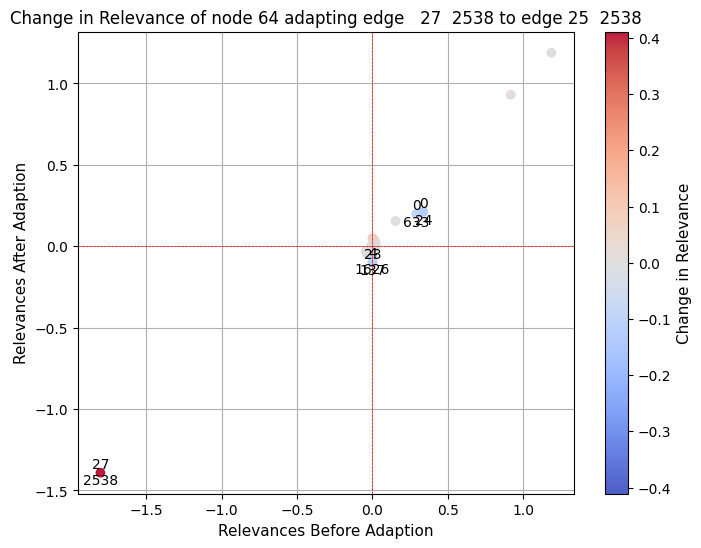

relevances_after_edge_edge_787_1849adapt_tensor([   0, 1849])_1.pt 787  1849 relevances_edge_787.pt
[[ 1.13355704e-01  1.11206926e-01  2.40000000e+01  0.00000000e+00]
 [ 9.74911988e-01  9.68431950e-01  4.14000000e+02  0.00000000e+00]
 [-8.77284184e-02 -8.60654116e-02  4.46000000e+02  0.00000000e+00]
 ...
 [-2.03670561e-02 -1.99809801e-02  9.02000000e+02  4.20000000e+01]
 [ 1.59270570e-01  1.61414996e-01  1.84900000e+03  4.20000000e+01]
 [ 1.41862314e-02  1.39173102e-02  1.93100000e+03  4.20000000e+01]]
-5.163238903094225e-08
0.030690670013427734 -0.013310670852661133
non : 1


<Figure size 800x600 with 0 Axes>

In [526]:
path = 'out/AIFB/RGCN_no_emb/relevances/'

fil = os.listdir(path)

rel_after = [file for file in fil if file.startswith("relevances_after_edge_edge_")]
rel_before = [file for file in fil if file.startswith("relevances_edge_")]
dfs = []
for rel in rel_after:
    ra = torch.load(path+rel).to_dense().detach().numpy()
    node_name = rel.split('edge_edge_')[1].split('_')[0]
    adapt_edge_name = rel.split('[')[1].split(',')[0]
    to_edge = rel.split('_')[-1].split('.')[0]
    adapt_node = rel.split(',')[-1].split(']')[0]
    XX,YY = np.meshgrid(np.arange(ra.shape[1]),np.arange(ra.shape[0]))
    
    for rel2 in rel_before:
        

         if node_name in rel2:
            print(rel, node_name, adapt_node, rel2)
            rb = torch.load(path+rel2).to_dense().detach().numpy()
            table = np.vstack((ra.ravel(),rb.ravel(),XX.ravel(),YY.ravel())).T
            table = table[table[:,0] != 0]
            print(table)
            #nonzero_indices =  np.where((ra <= -0.05) | (ra >= 0.05) )
            change = table[:,0] - table[:,1]
            print(change.sum())
            if change.sum() == 0:
                continue
            print(change.max(), change.min())
            # Set a threshold for significant change
            threshold = 0.08

            # Filter out points with insignificant change
            nonzero_indices = np.where(np.abs(change) > threshold)
            print('non :',len(nonzero_indices))
            #nonzero_indices = np.where((change<= -0.00001))#|(change>= 0.000001))
            plt.figure(figsize=(8, 6))
            if change[nonzero_indices].sum() == 0:
                continue
            max_abs_change = np.max(np.abs(change[nonzero_indices]))
            scatter = plt.scatter(
                table[:,1],
                table[:,0],
                c=change,
                cmap='coolwarm',
                alpha=0.9,
                norm=Normalize(vmin=-max_abs_change, vmax=max_abs_change)
            )

            

            # Add index labels for each point
            for i, (idx1, idx2) in enumerate(zip(table[:,3][nonzero_indices], table[:,2][nonzero_indices])):
                label = f'{int(idx1)}\n{int(idx2)}'  # Combine the two indices into one label
                plt.text(table[:,1][nonzero_indices][i], table[:,0][nonzero_indices][i], label, fontsize=10, ha='center', va='center')



            # Set x-axis label
            plt.xlabel('Relevances Before Adaption', fontsize=11)

            # Set y-axis label
            plt.ylabel('Relevances After Adaption', fontsize=11)
            plt.title(('Change in Relevance of node {} adapting edge {} {} to edge {} {}'.format(node_name, adapt_edge_name, adapt_node, to_edge, adapt_node)))
            # Add a colorbar to indicate change
            cbar = plt.colorbar(scatter)
            cbar.set_label('Change in Relevance', fontsize=11)

            # Set plot limits and add grid
            # plt.xlim(-2, 4)
            # plt.ylim(-2, 4)
            plt.axhline(0, color='red', linewidth=0.5, linestyle='dashed')
            plt.axvline(0, color='red', linewidth=0.5, linestyle='dashed')
            plt.grid(True)

            # Show the plot
            plt.show()

# RGAT

### Auswertung Relevanzen

In [22]:
path = 'out/AIFB/RGAT_no_emb/relevances/'
dist = 'out/AIFB/RGAT_emb/DistMult/relevances/'
transe = 'out/AIFB/RGAT_emb/TransE/relevances/'
transh = 'out/AIFB/RGAT_emb/TransH/relevances/'
list_paths = [path,dist,transe,transh]
fil = os.listdir(path)
dist2 = os.listdir(dist)
transe2 = os.listdir(transe)
transh2 = os.listdir(transh)
rel_before = [file for file in fil if file.startswith("relevances_node_")]
rel_bef_dist = [file for file in dist2 if file.startswith("relevances_node_")]
rel_bef_transe = [file for file in transe2 if file.startswith("relevances_node_")]
rel_bef_transh = [file for file in transh2 if file.startswith("relevances_node_")]
count_path= 0
for l in [rel_before,rel_bef_dist,rel_bef_transe,rel_bef_transh]:
    path2 = list_paths[count_path]
    count_path += 1
    print('######',path2,'######')
    mean_rel_ges = 0 
    count_zero_ges = 0
    count_positive_ges = 0
    count_negative_ges = 0 
    mean_positive = 0
    mean_negative = 0
    count = 0
    #print(path2)
    for rel in l:
        rb = torch.load(path2 + rel)
        #print(path2, rel)
        #print(rb.sum())
        rb_non_zero = rb[rb != 0]
        rb_count_zero = rb[rb == 0]
        mean_rel= rb_non_zero.mean(axis=0)
        rb_count_positive = rb[rb > 0]
        rb_count_negative = rb[rb < 0]
        mean_rel_ges += mean_rel
        #print(mean_rel)
        count_zero_ges += len(rb_count_zero)
        count_positive_ges += len(rb_count_positive)
        count_negative_ges += len(rb_count_negative)
        count += 1
        mean_positive += rb_count_positive.mean(axis=0)
        mean_negative += rb_count_negative.mean(axis=0)
    mean_positive_ges = mean_positive / count
    mean_negative_ges = mean_negative / count
    percentage_zero =   count_zero_ges / (len(rb)* len(l))
    percentage_positive = count_positive_ges / (len(rb)* len(l))
    percentage_negative = count_negative_ges / (len(rb)* len(l))
    mean_rel_ges = mean_rel_ges / count
    print('Average_relevance without zero: ',mean_rel_ges, '\n',
            'Proportion 0 relevance: ', percentage_zero, '\n',
            'Proportion positive relevance: ', percentage_positive, '\n',
            'Proportion negative relevance: ',percentage_negative, '\n',
            'Average positive relevance: ', mean_positive_ges, '\n',
            'Average negative relevance: ',mean_negative_ges)

###### out/AIFB/RGAT_no_emb/relevances/ ######
Average_relevance without zero:  tensor(0.0042) 
 Proportion 0 relevance:  0.8365667254556144 
 Proportion positive relevance:  0.08652753282382912 
 Proportion negative relevance:  0.07690574172055653 
 Average positive relevance:  tensor(0.1472) 
 Average negative relevance:  tensor(-0.1653)
###### out/AIFB/RGAT_emb/DistMult/relevances/ ######
Average_relevance without zero:  tensor(0.0042) 
 Proportion 0 relevance:  0.8365667254556144 
 Proportion positive relevance:  0.09569860866157162 
 Proportion negative relevance:  0.06773466588281403 
 Average positive relevance:  tensor(0.1607) 
 Average negative relevance:  tensor(-0.1775)
###### out/AIFB/RGAT_emb/TransE/relevances/ ######
Average_relevance without zero:  tensor(0.0042) 
 Proportion 0 relevance:  0.8365667254556144 
 Proportion positive relevance:  0.0847246717617088 
 Proportion negative relevance:  0.07870860278267686 
 Average positive relevance:  tensor(0.0793) 
 Average ne

# RGCN TransE

In [13]:
model = 'TransE'
csv = readallcsvinpath('out/AIFB/RGCN_emb/')
pred_before = torch.load('out/AIFB/RGCN_emb/'+model+'/pred_before.pt').to_dense().detach().numpy()
test_file = pd.read_csv('data/AIFB/testSet.tsv', sep='\t')

i2n = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/i2n.pkl')
n2i = {n:i for i, n in enumerate(i2n)}
i2r = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/i2r.pkl')

test_list = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/test_list.pkl')
test_idx = [n2i[name] for name, _ in test_list.items()]
for i,n in enumerate(i2n):
    if i == 234:
        print(n)

i2r
r2i = {r:i for i, r in enumerate(i2r)}
path = 'out/AIFB/RGCN_emb/'+model+'/'
pred_before = pred_before[test_idx]
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
fil.sort()
dfs = []
fil = fil[:len(fil)-1]
for file in fil:
    dfs.append(torch.load(path + file).to_dense()[test_idx].detach().numpy())
print(len(fil))
diff = {}
i=0                                
for i in range(len(fil)):
    minus = (dfs[i] - pred_before)
    diff[i] = minus
    # if minus.sum() != 0:
    #     diff[i] = minus
#len(diff)
classes_before = pred_before.argmax(axis=1)
count_changed,total_pred = 0,0
ch_index = []
cl_after = []
count_cl_after = []
for i in range(len(dfs)):
    classes = dfs[i].argmax(axis=1)
    changed_pred = np.sum([classes != classes_before])
    changed_index = np.where(classes != classes_before)[0]
    count_changed += changed_pred
    total_pred += len(classes)
    ch_index.append(changed_index)
    cl_after.append(classes)
    count_cl_after.append(np.unique(classes, return_counts=True))
    print(changed_pred)
print(len(dfs), total_pred,  count_changed)
score = count_changed / total_pred
print(ch_index[1])
print(score)
count_classes_before = np.unique(classes_before, return_counts=True)
count_classes_before

http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2137instance
12
0
0
2
2
0
0
0
2
0
0
0
1
12 432 7
[]
0.016203703703703703


(array([0, 2], dtype=int64), array([23, 13], dtype=int64))

12
0
pred_after1349adapt_1849_28.pt
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([23, 13], dtype=int64))


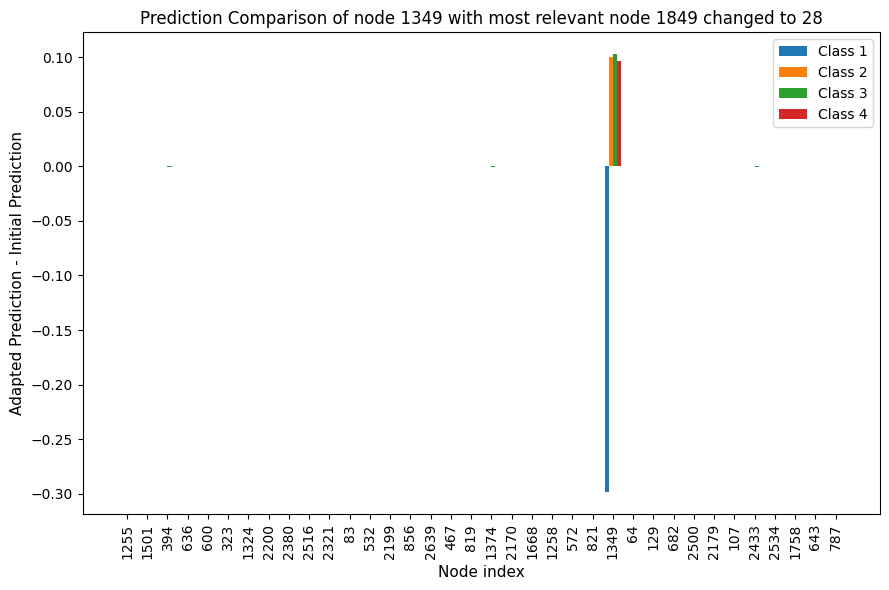

1
pred_after1668adapt_1226_32.pt
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([23, 13], dtype=int64))


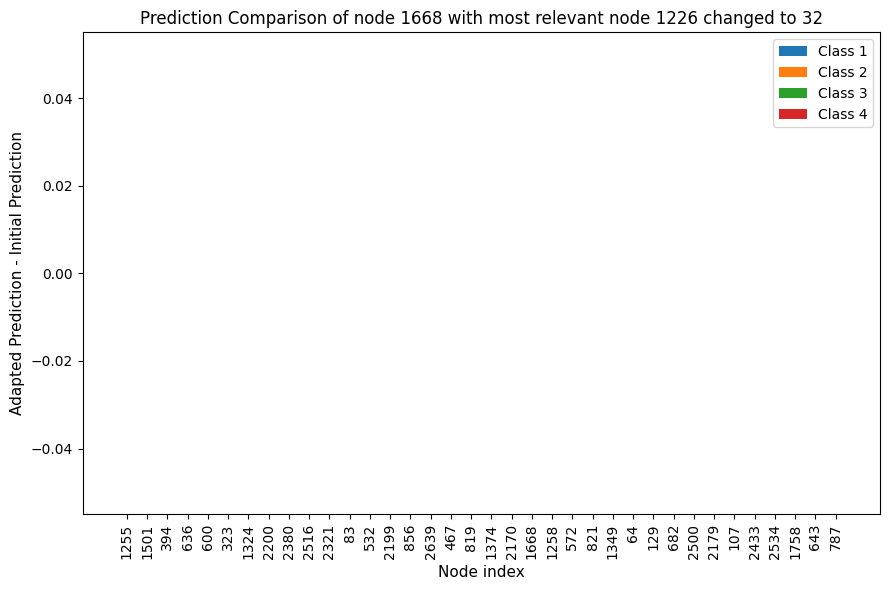

2
pred_after1668adapt_tensor([  27, 1226])_40.pt
Prediction Score before:  [[0.08269489 0.02519022 0.8724993  0.01961557]
 [0.08614335 0.0272623  0.86479646 0.02179784]] Prediction Score after:  [[0.45249125 0.05805396 0.44408828 0.04536641]
 [0.46511424 0.061448   0.42413467 0.04930313]]
323
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


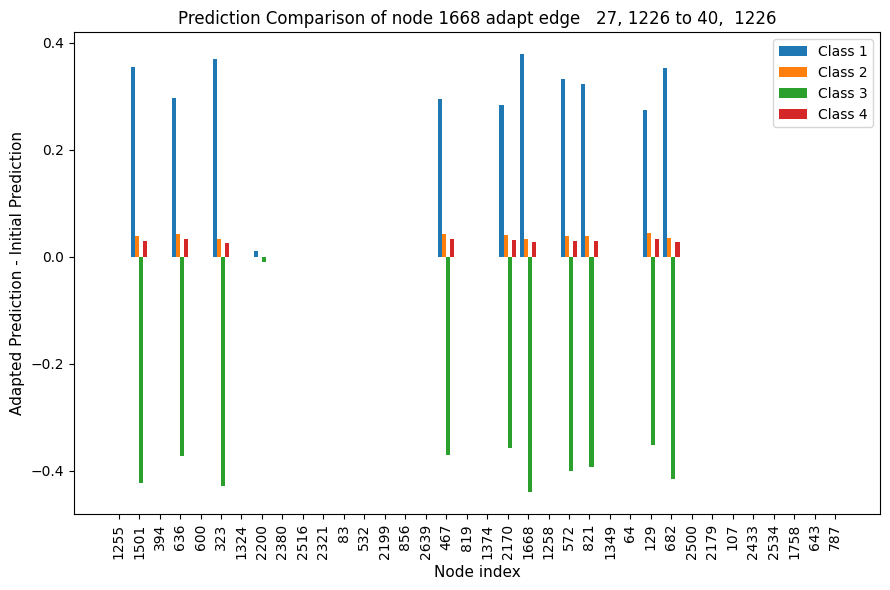

3
pred_after572adapt_tensor([  27, 1226])_8.pt
Prediction Score before:  [[0.08269489 0.02519022 0.8724993  0.01961557]
 [0.08614335 0.0272623  0.86479646 0.02179784]] Prediction Score after:  [[0.45827612 0.05831527 0.43781695 0.04559172]
 [0.47089097 0.06169745 0.4178852  0.04952641]]
323
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


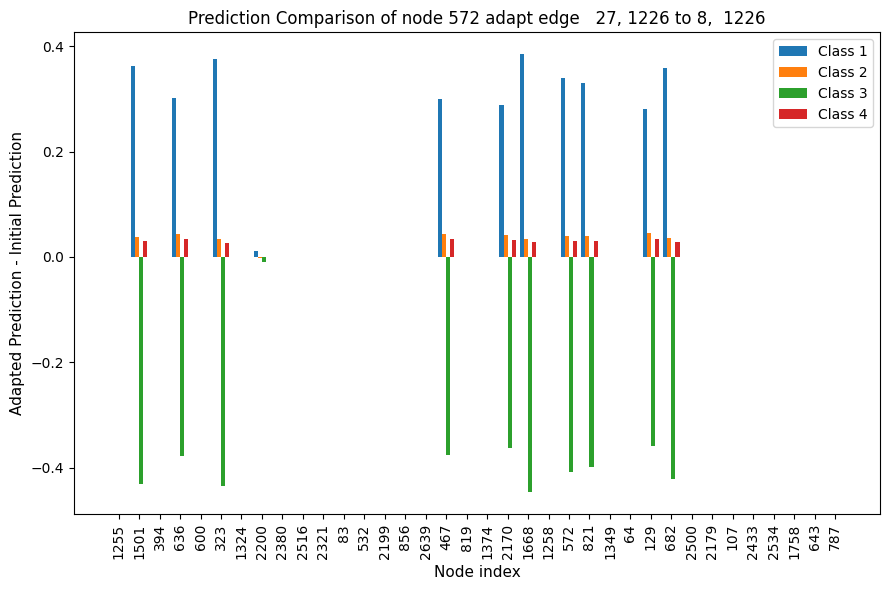

4
pred_after643adapt_1849_34.pt
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([23, 13], dtype=int64))


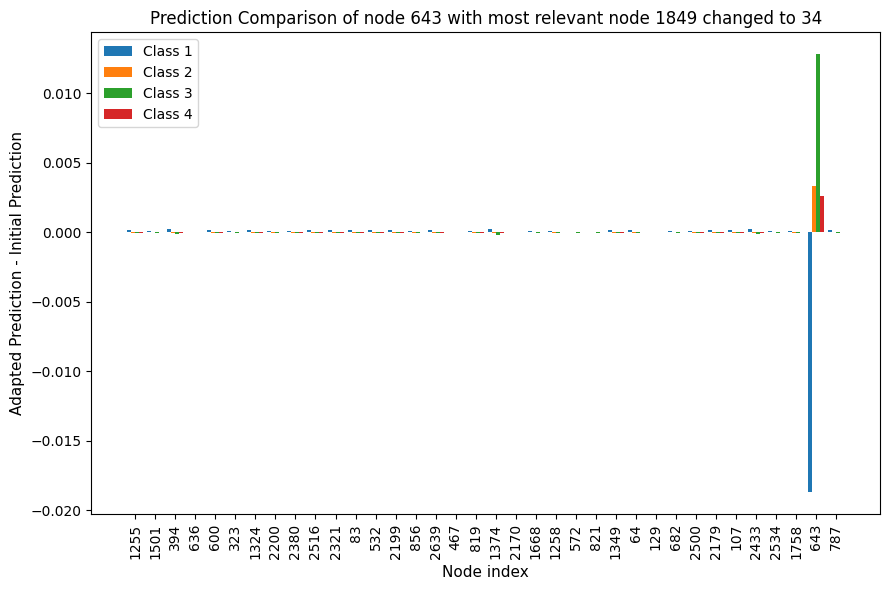

5
pred_after643adapt_tensor([   0, 1849])_24.pt
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([23, 13], dtype=int64))


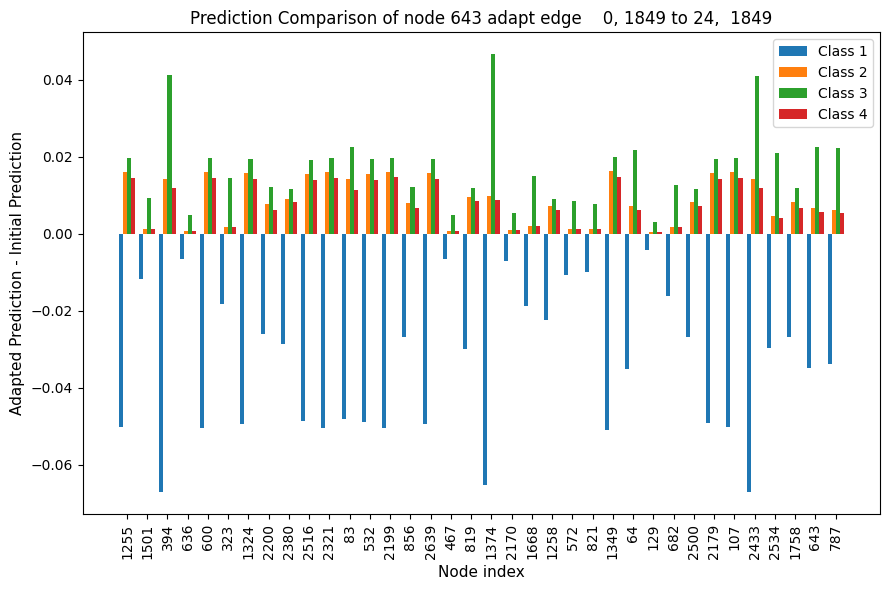

6
pred_after64adapt_2538_5.pt
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([23, 13], dtype=int64))


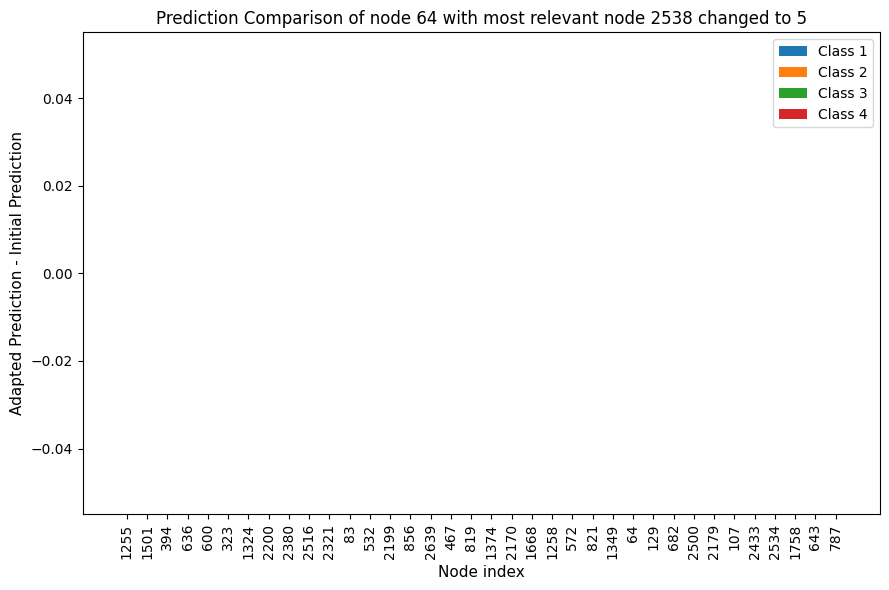

7
pred_after64adapt_tensor([  27, 2538])_19.pt
Prediction Score before:  [[0.54804313 0.07530494 0.31857258 0.05807934]
 [0.48734957 0.07586908 0.37858453 0.05819679]] Prediction Score after:  [[0.3896637  0.07009578 0.48624098 0.05399951]
 [0.33029965 0.06731715 0.55080575 0.05157745]]
64
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([21, 15], dtype=int64))


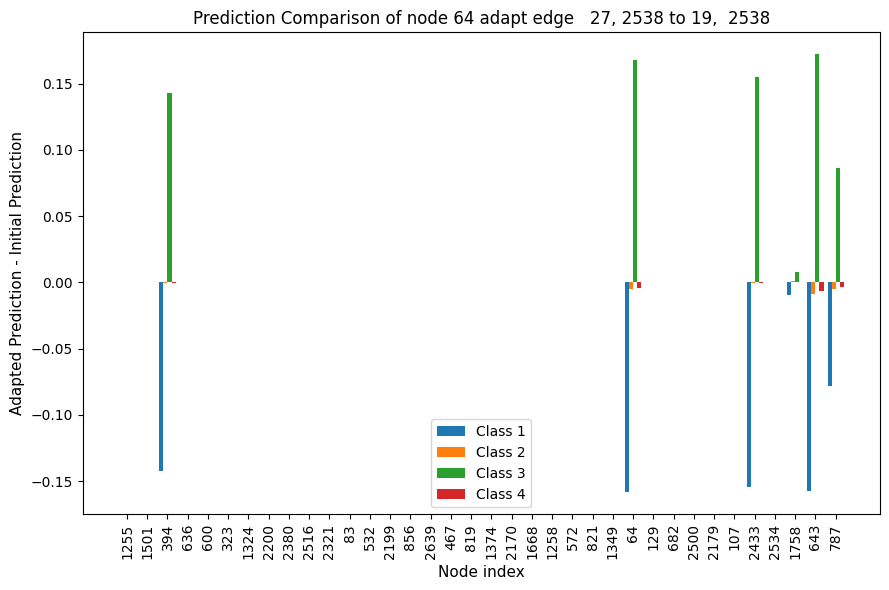

8
pred_after787adapt_195_16.pt
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([23, 13], dtype=int64))


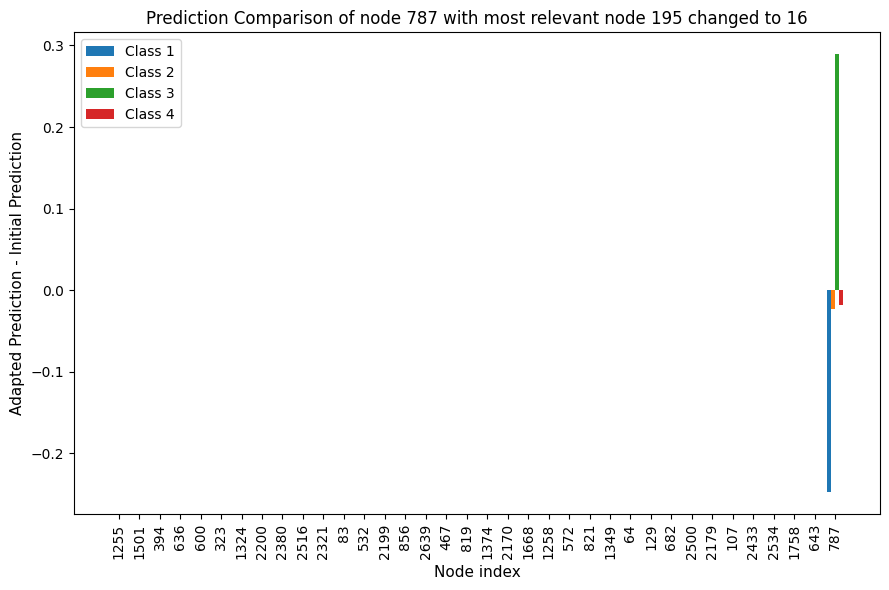

9
pred_after787adapt_24_14.pt
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([23, 13], dtype=int64))


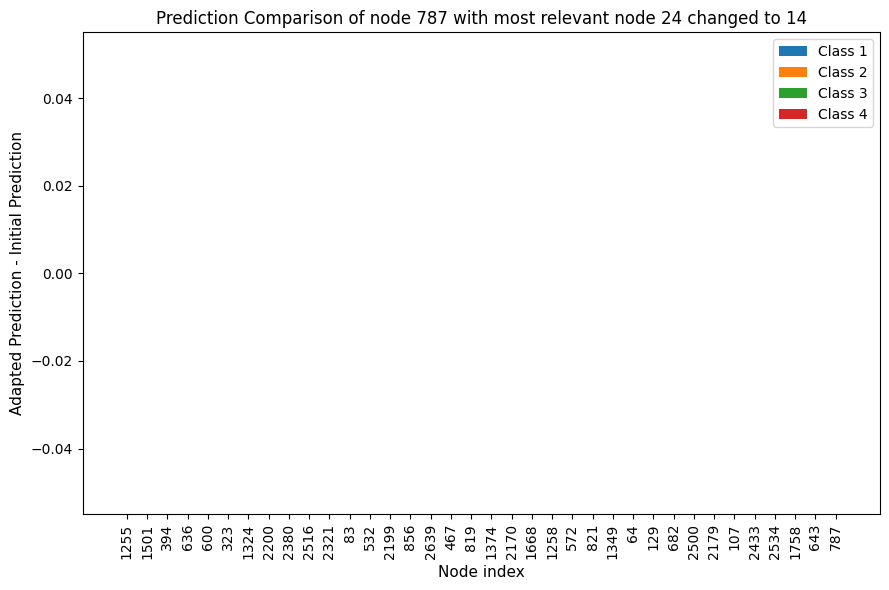

10
pred_after787adapt_tensor([ 0, 24])_14.pt
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([23, 13], dtype=int64))


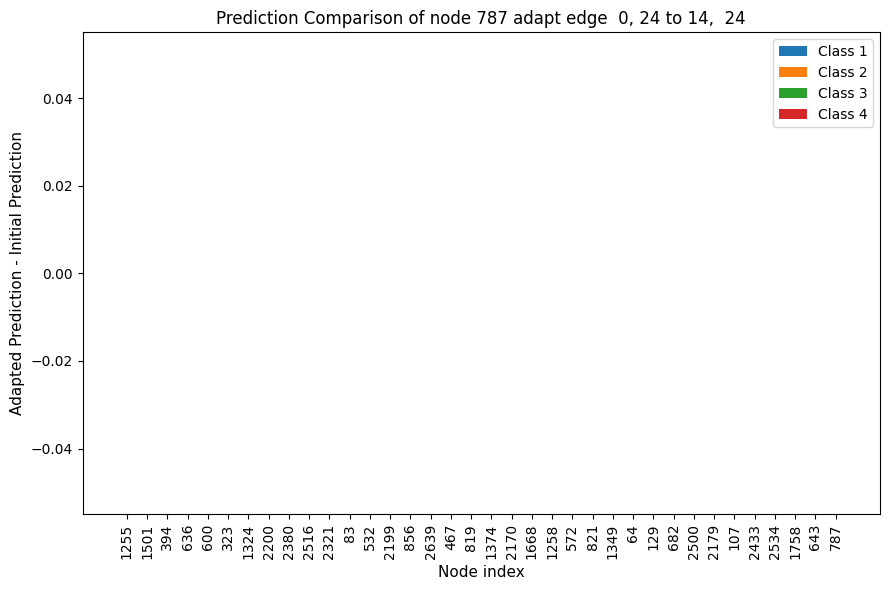

11
pred_after787adapt_tensor([ 42, 195])_9.pt
Prediction Score before:  [[0.4312275  0.07625838 0.43238986 0.06012422]] Prediction Score after:  [[0.45139077 0.07743856 0.4100006  0.06117005]]
787
(array([0, 2], dtype=int64), array([23, 13], dtype=int64)) (array([0, 2], dtype=int64), array([24, 12], dtype=int64))


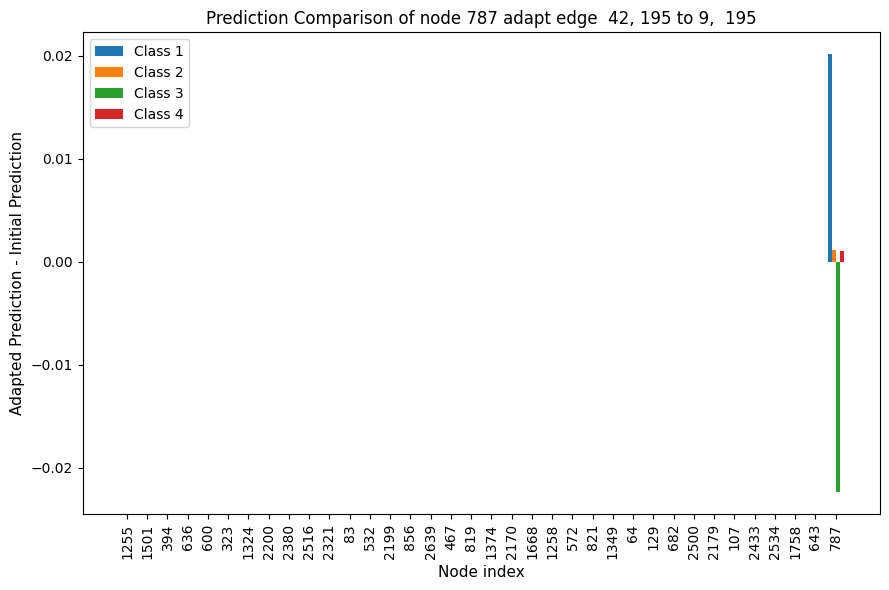

In [549]:
path = 'out/AIFB/RGCN_emb/'+model+'/'
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
print(len(diff))
for i in diff:
    print(i)
    percentage_changes = diff[i]
    name = fil[i]
    print(name)
    
    start_node = name.split('pred_after')[1].split('adapt')[0]
    if ch_index[i].size != 0:
        pb = pred_before[ch_index[i]]
        pa = dfs[i][ch_index[i]]
        print('Prediction Score before: ',pb, 'Prediction Score after: ', pa)
        print(test_idx[ch_index[i][0]])
    print(count_classes_before, count_cl_after[i])
    
    # Set the width of each bar
    bar_width = 0.2
    x_positions = np.arange(36)
    # Create a bar plot for each class
    plt.figure(figsize=(9, 6))
    plt.bar(x_positions - 1.5*bar_width, percentage_changes[:, 0], width=bar_width, label='Class 1')
    plt.bar(x_positions - 0.5*bar_width, percentage_changes[:, 1], width=bar_width, label='Class 2')
    plt.bar(x_positions + 0.5*bar_width, percentage_changes[:, 2], width=bar_width, label='Class 3')
    plt.bar(x_positions + 1.5*bar_width, percentage_changes[:, 3], width=bar_width, label='Class 4')

    # Set x-axis labels and tick positions
    plt.xticks(x_positions, test_idx, rotation='vertical', fontsize=10)
    plt.xlabel('Node index', fontsize=11)
    plt.ylabel('Adapted Prediction - Initial Prediction' , fontsize=11)
    if 'adapt_tensor' in name:
        relevant_edge = name.split('[')[1].split(']')[0]
        adapt_edge = name.split('_')[-1].split('.')[0]
        second_node = relevant_edge.split(',')[1]
        plt.title('Prediction Comparison of node {} adapt edge {} to {}, {}'.format(start_node, relevant_edge, adapt_edge, second_node))

    else:
        adapt_to = name.split('_')[2].split('_')[0]
        to_node = name.split('_')[3].split('.')[0]
        plt.title('Prediction Comparison of node {} with most relevant node {} changed to {}'.format(start_node, adapt_to,to_node))
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Edges

relevances_after_edge_edge_1668_1226adapt_tensor([  27, 1226])_40.pt 1668  1226 relevances_edge_1668.pt
[[-2.69996058e-02  4.25084755e-02  2.40000000e+01  0.00000000e+00]
 [ 5.77786922e-01 -2.81995293e-02  4.14000000e+02  0.00000000e+00]
 [-6.61130399e-02  4.54308540e-02  6.33000000e+02  0.00000000e+00]
 ...
 [ 5.33709675e-03 -4.21074638e-03  2.29900000e+03  4.20000000e+01]
 [-1.23016937e-02  8.46491382e-03  2.30200000e+03  4.20000000e+01]
 [-2.84605892e-03  2.05995073e-03  2.33200000e+03  4.20000000e+01]]
-8.207123336489985e-08
0.6649995502084494 -1.9914501309394836
non : 1


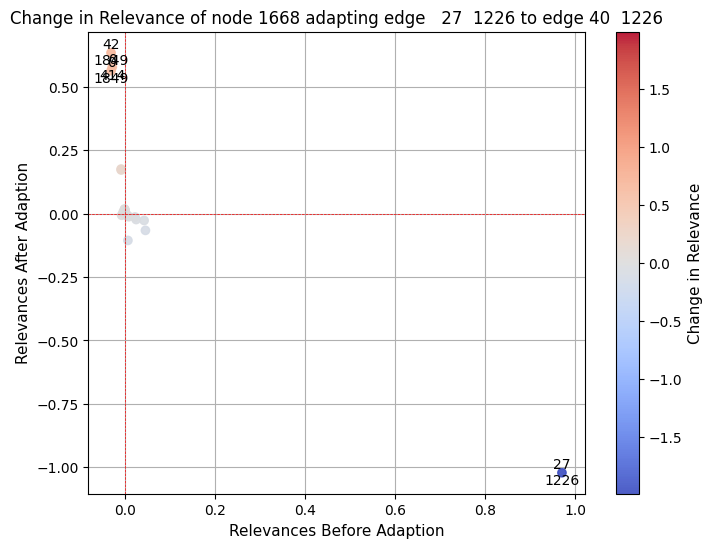

relevances_after_edge_edge_572_1226adapt_tensor([  27, 1226])_8.pt 572  1226 relevances_edge_572.pt
[[ 3.45987380e-02  2.91591324e-02  2.40000000e+01  0.00000000e+00]
 [-5.37512414e-02 -2.41438579e-02  4.14000000e+02  0.00000000e+00]
 [ 1.15990248e-02  5.21002384e-03  4.46000000e+02  0.00000000e+00]
 ...
 [-1.79258315e-03 -1.62021397e-03  2.72200000e+03  4.20000000e+01]
 [-6.67907763e-04 -6.20319566e-04  2.83200000e+03  4.20000000e+01]
 [-1.11472642e-03 -9.82139842e-04  2.83400000e+03  4.20000000e+01]]
-2.757061769997904e-07
0.04294663667678833 -0.044179268181324005
non : 1
relevances_after_edge_edge_643_1849adapt_tensor([   0, 1849])_24.pt 643  1849 relevances_edge_643.pt
[[ 2.01002821e-01  1.69065505e-01  2.40000000e+01  0.00000000e+00]
 [ 8.73623252e-01  7.89710522e-01  4.14000000e+02  0.00000000e+00]
 [-4.61666286e-02 -3.88312265e-02  4.46000000e+02  0.00000000e+00]
 ...
 [ 3.21080893e-01  3.30019325e-01  1.84900000e+03  4.20000000e+01]
 [ 3.87136877e-01  3.25624645e-01  2.39900000

<Figure size 800x600 with 0 Axes>

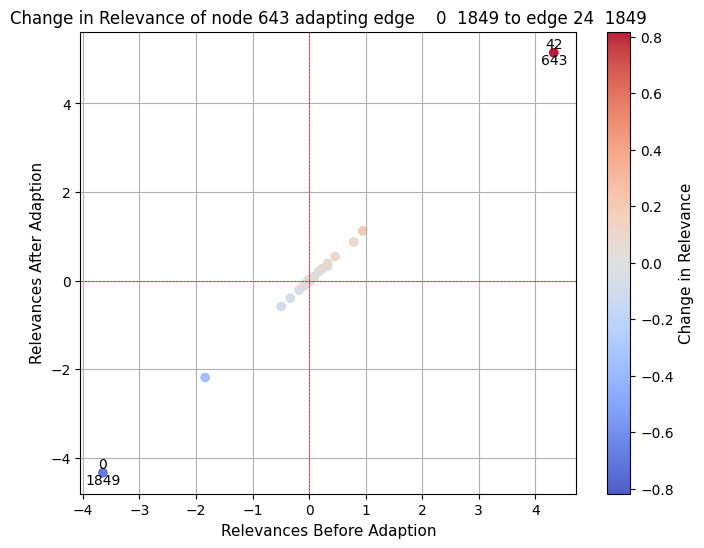

relevances_after_edge_edge_64_2538adapt_tensor([  27, 2538])_19.pt 64  2538 relevances_edge_64.pt
[[-4.69708055e-01  3.28755349e-01  2.40000000e+01  0.00000000e+00]
 [-7.96668380e-02  6.64723873e-01  4.14000000e+02  0.00000000e+00]
 [-5.58366179e-02  1.04077533e-01  4.46000000e+02  0.00000000e+00]
 ...
 [ 1.20281917e-03  3.19287716e-03  1.62600000e+03  4.20000000e+01]
 [-3.32896188e-02  2.77787536e-01  1.84900000e+03  4.20000000e+01]
 [-1.52693138e-01  1.09162666e-01  2.78100000e+03  4.20000000e+01]]
-5.56163764819928e-07
4.572801470756531 -0.7984634041786194
non : 1


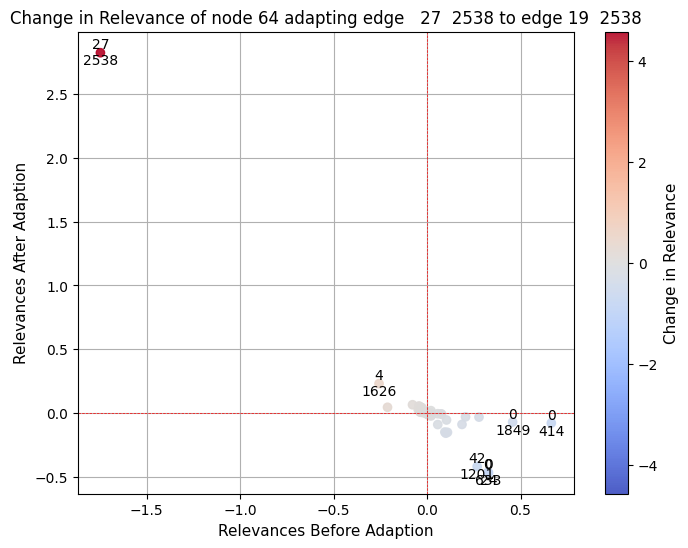

relevances_after_edge_edge_64_2538adapt_tensor([  27, 2538])_19.pt 64  2538 relevances_edge_643.pt
[[-4.69708055e-01  1.69065505e-01  2.40000000e+01  0.00000000e+00]
 [-7.96668380e-02  7.89710522e-01  4.14000000e+02  0.00000000e+00]
 [-5.58366179e-02 -3.88312265e-02  4.46000000e+02  0.00000000e+00]
 ...
 [ 1.20281917e-03  0.00000000e+00  1.62600000e+03  4.20000000e+01]
 [-3.32896188e-02  3.30019325e-01  1.84900000e+03  4.20000000e+01]
 [-1.52693138e-01  0.00000000e+00  2.78100000e+03  4.20000000e+01]]
5.681380743288703
3.5742689967155457 -0.8693773597478867
non : 1


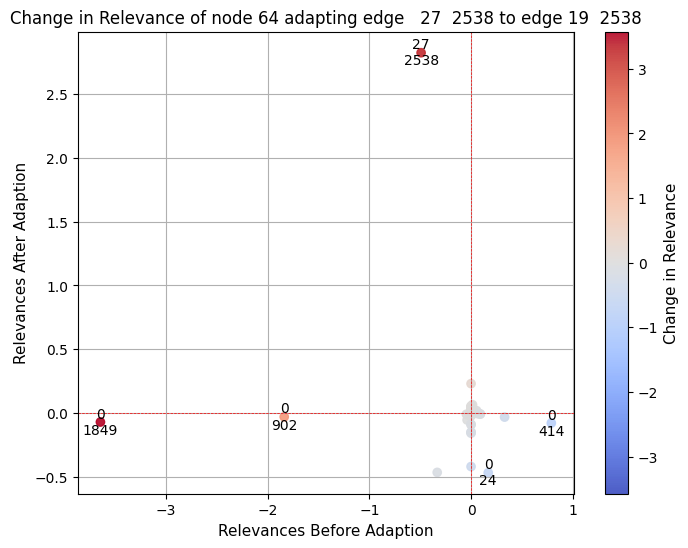

relevances_after_edge_edge_787_195adapt_tensor([ 42, 195])_9.pt 787  195 relevances_edge_787.pt
[[ 2.03212500e+00 -1.79371035e+00  2.40000000e+01  0.00000000e+00]
 [ 9.12673116e-01 -9.34563726e-02  4.14000000e+02  0.00000000e+00]
 [-3.27447653e-02  2.57685445e-02  4.46000000e+02  0.00000000e+00]
 ...
 [ 5.83318435e-03 -5.03869378e-04  9.02000000e+02  4.20000000e+01]
 [ 3.81405294e-01 -3.90517227e-02  1.84900000e+03  4.20000000e+01]
 [-9.87504646e-02  7.08940625e-02  1.93100000e+03  4.20000000e+01]]
-2.038704497664412e-06
3.825835347175598 -6.515048503875732
non : 1


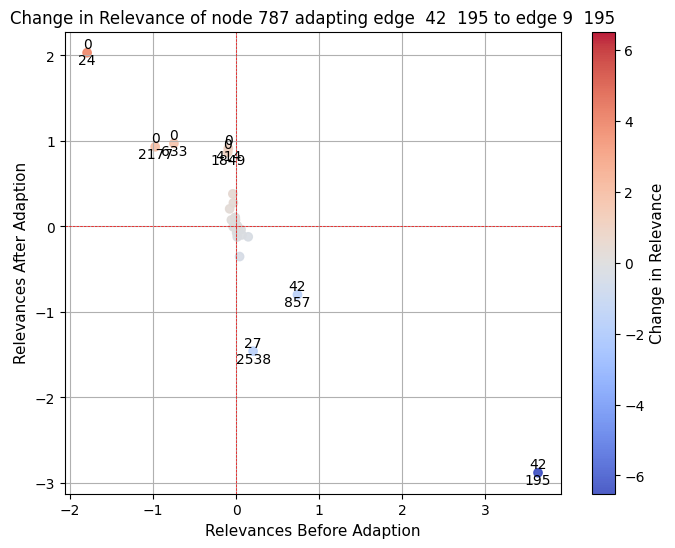

relevances_after_edge_edge_787_24adapt_tensor([ 0, 24])_14.pt 787  24 relevances_edge_787.pt
[[-1.79371035e+00 -1.79371035e+00  2.40000000e+01  0.00000000e+00]
 [-9.34563726e-02 -9.34563726e-02  4.14000000e+02  0.00000000e+00]
 [ 2.57685445e-02  2.57685445e-02  4.46000000e+02  0.00000000e+00]
 ...
 [-5.03869378e-04 -5.03869378e-04  9.02000000e+02  4.20000000e+01]
 [-3.90517227e-02 -3.90517227e-02  1.84900000e+03  4.20000000e+01]
 [ 7.08940625e-02  7.08940625e-02  1.93100000e+03  4.20000000e+01]]
0.0


In [ ]:
path = 'out/AIFB/RGCN_emb/'+model+'/relevances/'

fil = os.listdir(path)

rel_after = [file for file in fil if file.startswith("relevances_after_edge_edge_")]
rel_before = [file for file in fil if file.startswith("relevances_edge_")]
dfs = []
for rel in rel_after:
    ra = torch.load(path+rel).to_dense().detach().numpy()
    node_name = rel.split('edge_edge_')[1].split('_')[0]
    adapt_edge_name = rel.split('[')[1].split(',')[0]
    to_edge = rel.split('_')[-1].split('.')[0]
    adapt_node = rel.split(',')[-1].split(']')[0]
    XX,YY = np.meshgrid(np.arange(ra.shape[1]),np.arange(ra.shape[0]))
    
    for rel2 in rel_before:
        

         if node_name in rel2:
            print(rel, node_name, adapt_node, rel2)
            rb = torch.load(path+rel2).to_dense().detach().numpy()
            table = np.vstack((ra.ravel(),rb.ravel(),XX.ravel(),YY.ravel())).T
            table = table[table[:,0] != 0]
            print(table)
            #nonzero_indices =  np.where((ra <= -0.05) | (ra >= 0.05) )
            change = table[:,0] - table[:,1]
            print(change.sum())
            if change.sum() == 0:
                continue
            print(change.max(), change.min())
            # Set a threshold for significant change
            threshold = 0.45

            # Filter out points with insignificant change
            nonzero_indices = np.where(np.abs(change) > threshold)
            print('non :',len(nonzero_indices))
            #nonzero_indices = np.where((change<= -0.00001))#|(change>= 0.000001))
            plt.figure(figsize=(8, 6))
            if change[nonzero_indices].sum() == 0:
                continue
            max_abs_change = np.max(np.abs(change[nonzero_indices]))
            scatter = plt.scatter(
                table[:,1],
                table[:,0],
                c=change,
                cmap='coolwarm',
                alpha=0.9,
                norm=Normalize(vmin=-max_abs_change, vmax=max_abs_change)
            )

            

            # Add index labels for each point
            for i, (idx1, idx2) in enumerate(zip(table[:,3][nonzero_indices], table[:,2][nonzero_indices])):
                label = f'{int(idx1)}\n{int(idx2)}'  # Combine the two indices into one label
                plt.text(table[:,1][nonzero_indices][i], table[:,0][nonzero_indices][i], label, fontsize=10, ha='center', va='center')



            # Set x-axis label
            plt.xlabel('Relevances Before Adaption', fontsize=11)

            # Set y-axis label
            plt.ylabel('Relevances After Adaption', fontsize=11)
            plt.title(('Change in Relevance of node {} adapting edge {} {} to edge {} {}'.format(node_name, adapt_edge_name, adapt_node, to_edge, adapt_node)))
            # Add a colorbar to indicate change
            cbar = plt.colorbar(scatter)
            cbar.set_label('Change in Relevance', fontsize=11)

            # Set plot limits and add grid
            # plt.xlim(-2, 4)
            # plt.ylim(-2, 4)
            plt.axhline(0, color='red', linewidth=0.5, linestyle='dashed')
            plt.axvline(0, color='red', linewidth=0.5, linestyle='dashed')
            plt.grid(True)

            # Show the plot
            plt.show()

relevances_node_107.pt 107  24 relevances_node_856.pt


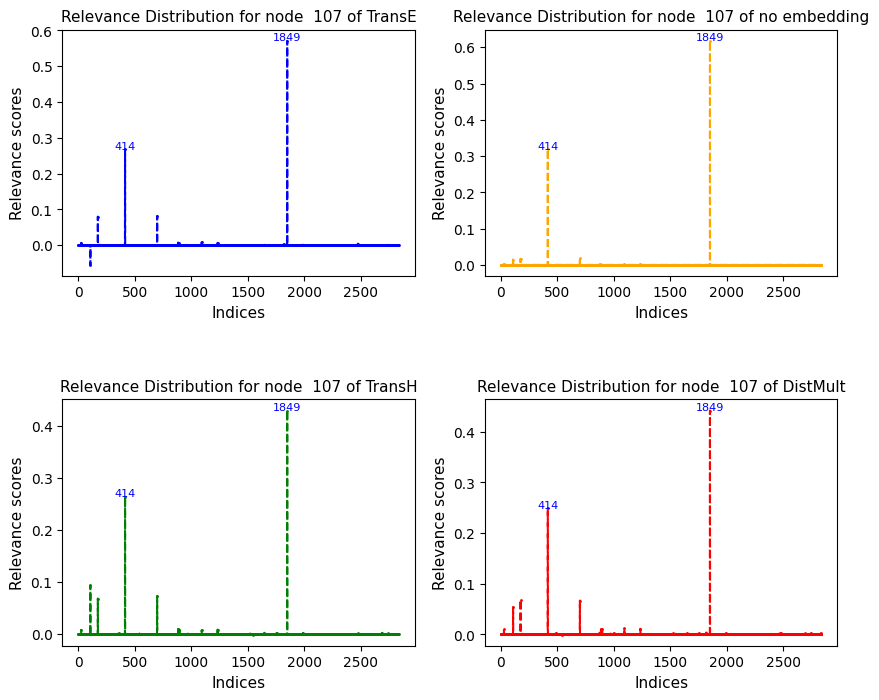

<Figure size 900x600 with 0 Axes>

relevances_node_1255.pt 1255  24 relevances_node_856.pt


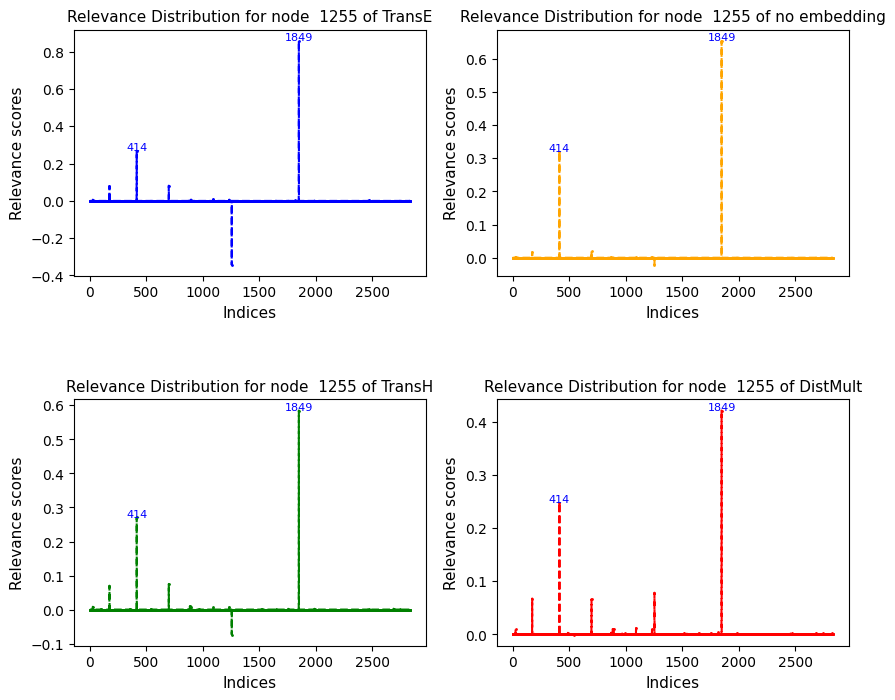

<Figure size 900x600 with 0 Axes>

relevances_node_1258.pt 1258  24 relevances_node_856.pt


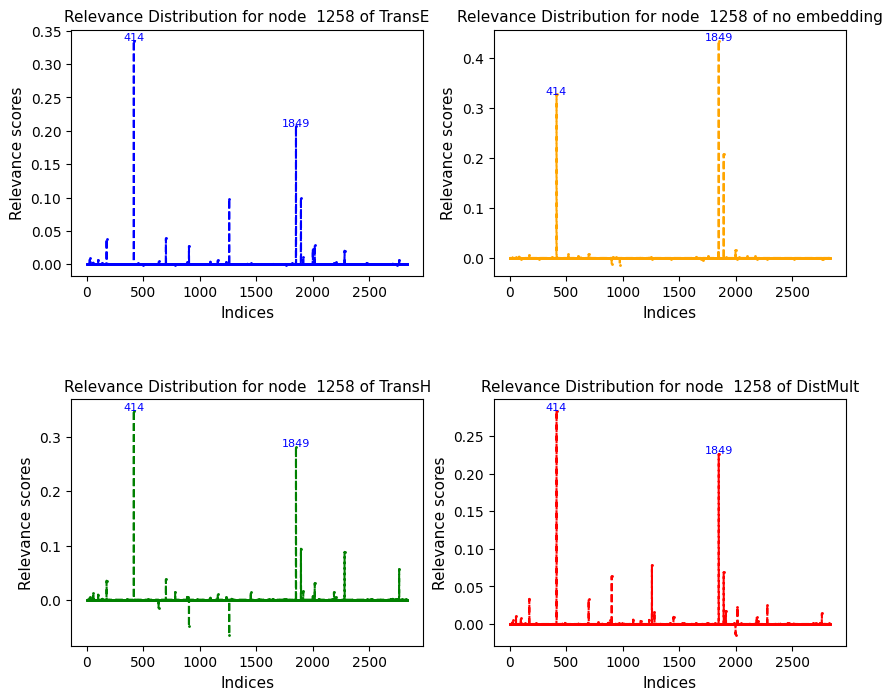

<Figure size 900x600 with 0 Axes>

relevances_node_129.pt 129  24 relevances_node_856.pt


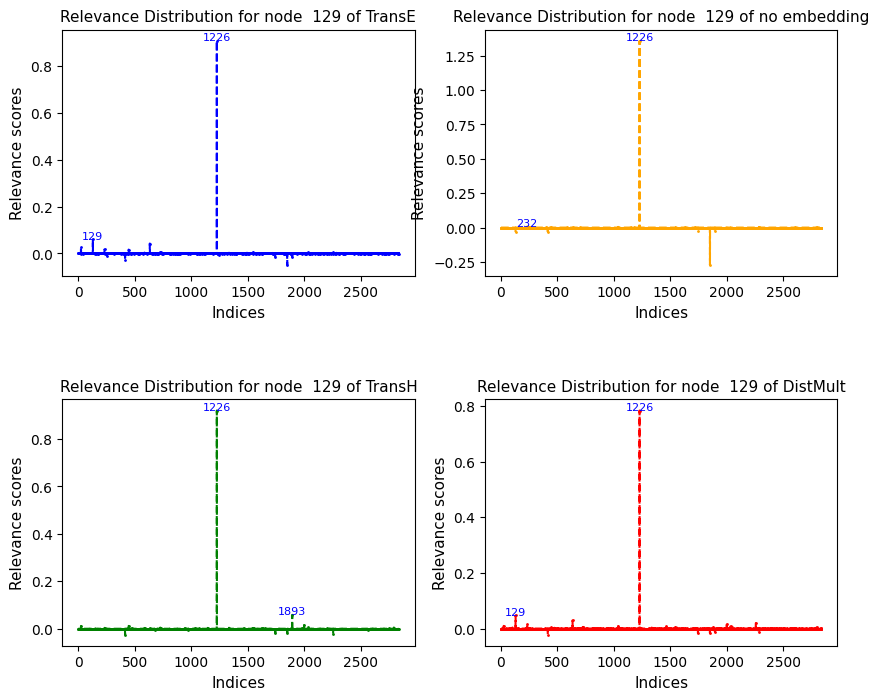

<Figure size 900x600 with 0 Axes>

relevances_node_1324.pt 1324  24 relevances_node_856.pt


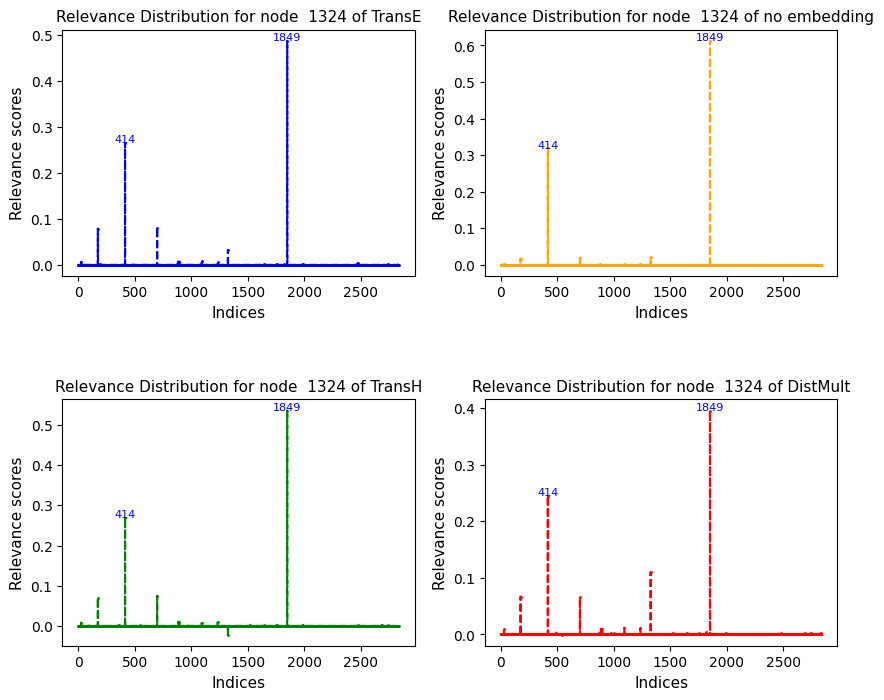

<Figure size 900x600 with 0 Axes>

relevances_node_1349.pt 1349  24 relevances_node_856.pt


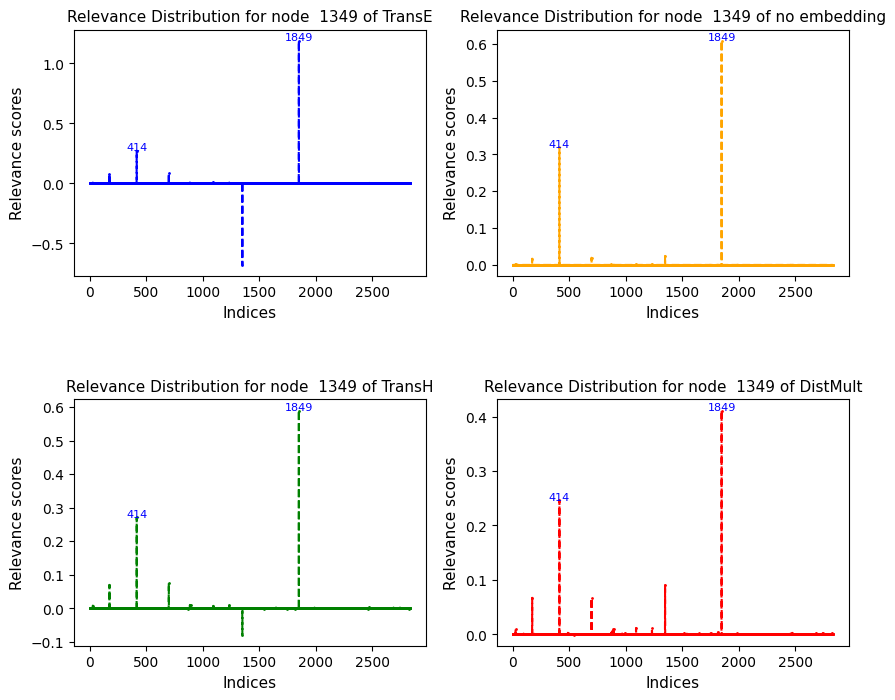

<Figure size 900x600 with 0 Axes>

relevances_node_1374.pt 1374  24 relevances_node_856.pt


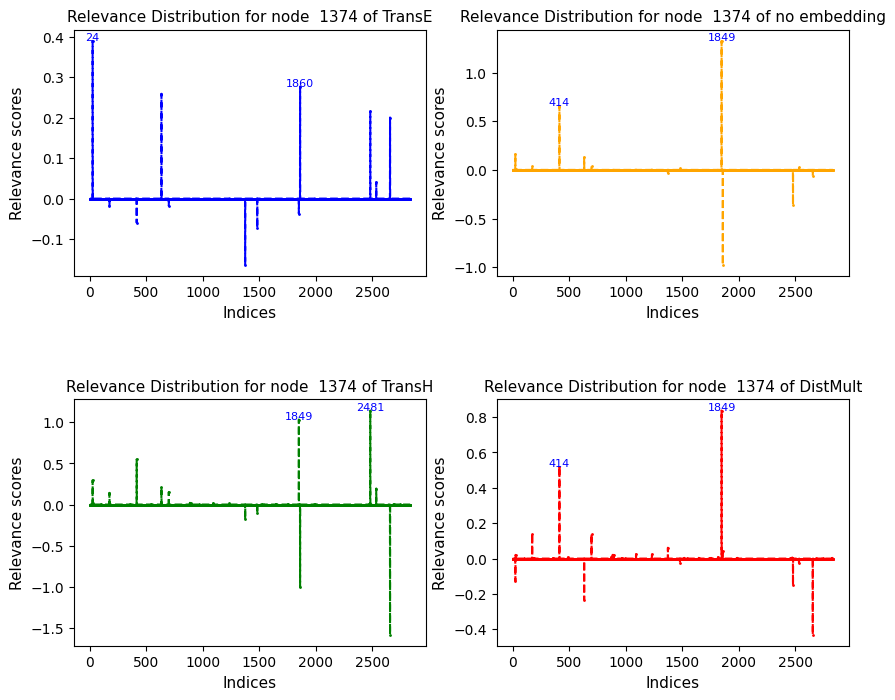

<Figure size 900x600 with 0 Axes>

relevances_node_1501.pt 1501  24 relevances_node_856.pt


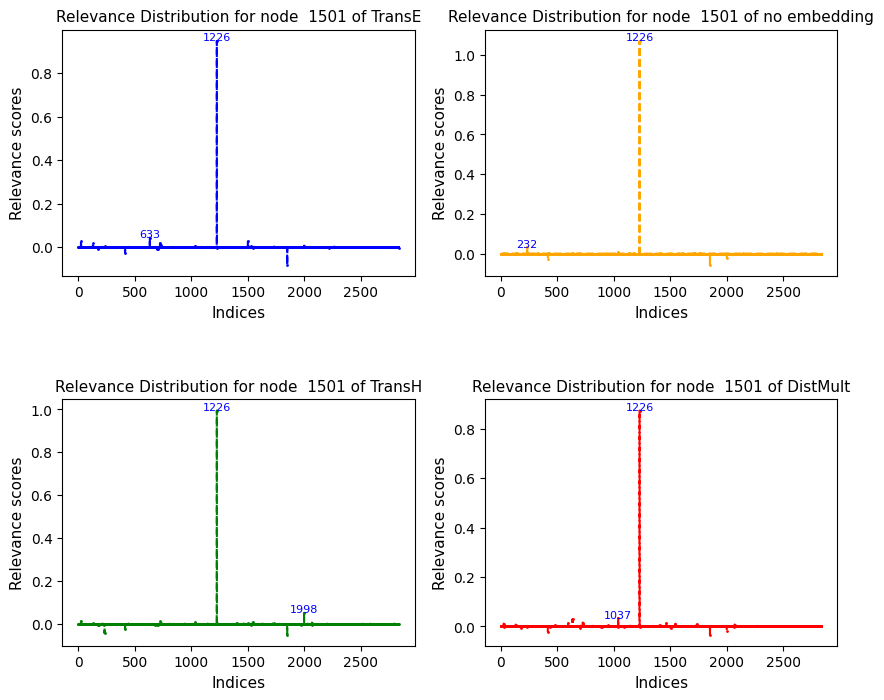

<Figure size 900x600 with 0 Axes>

relevances_node_1668.pt 1668  24 relevances_node_856.pt


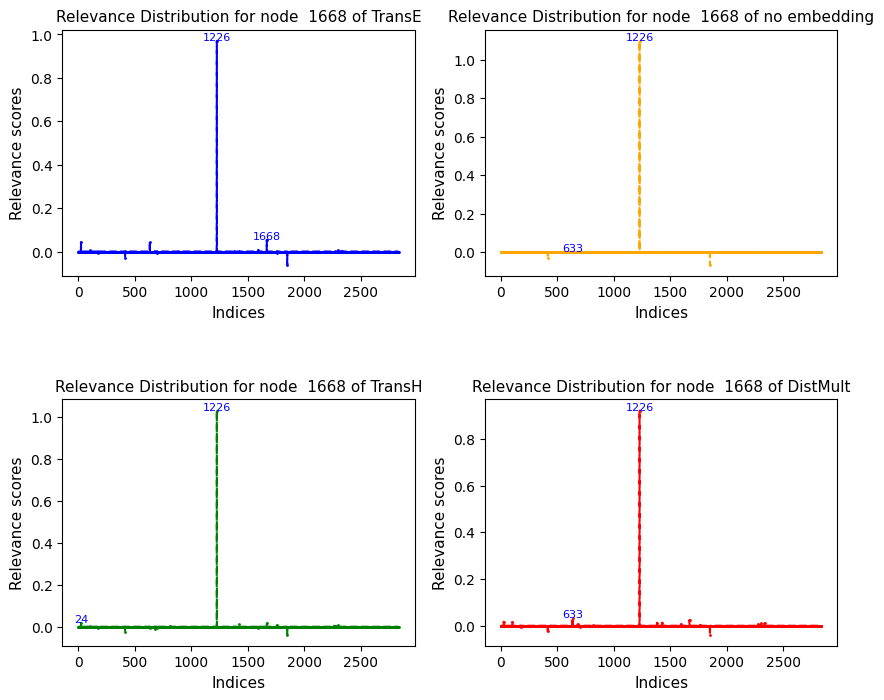

<Figure size 900x600 with 0 Axes>

relevances_node_1758.pt 1758  24 relevances_node_856.pt


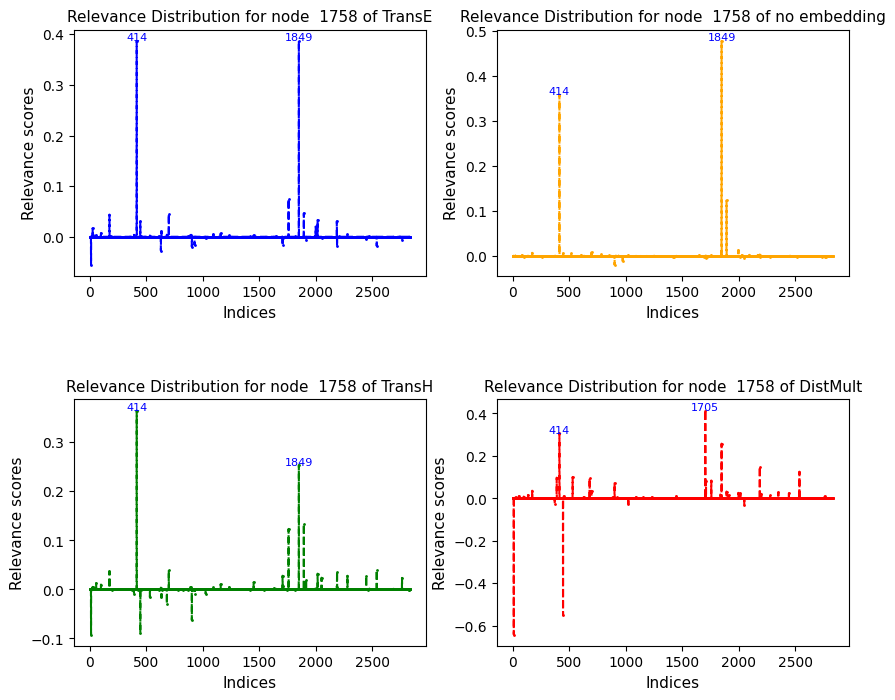

<Figure size 900x600 with 0 Axes>

relevances_node_2170.pt 2170  24 relevances_node_856.pt


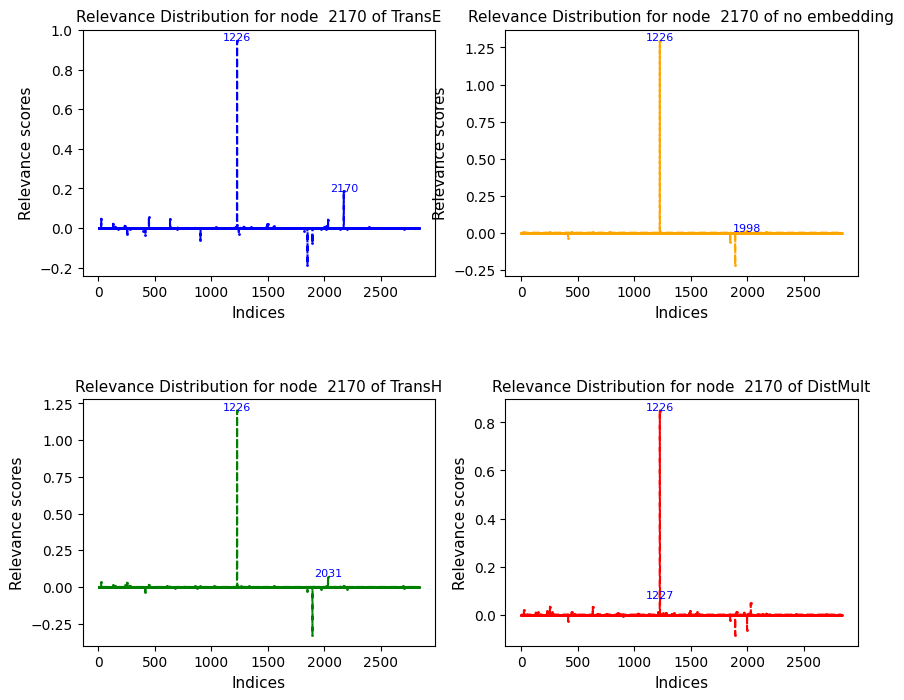

<Figure size 900x600 with 0 Axes>

relevances_node_2179.pt 2179  24 relevances_node_856.pt


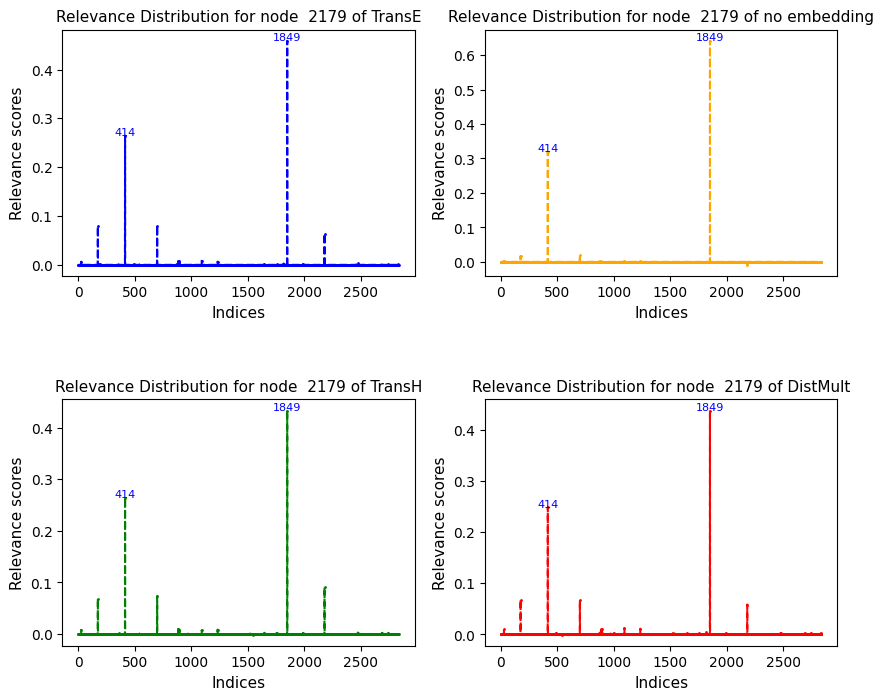

<Figure size 900x600 with 0 Axes>

relevances_node_2199.pt 2199  24 relevances_node_856.pt


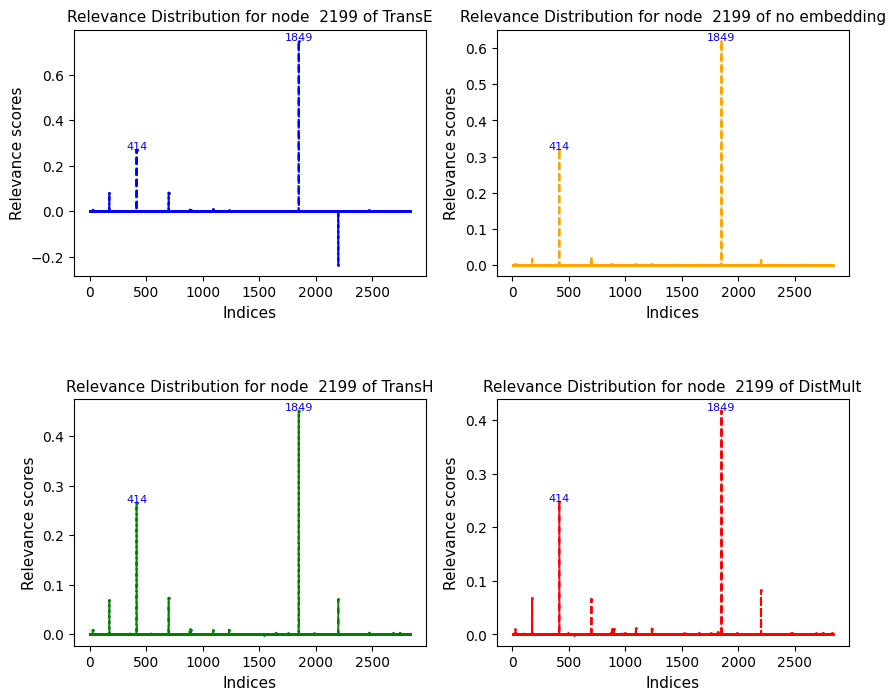

<Figure size 900x600 with 0 Axes>

relevances_node_2200.pt 2200  24 relevances_node_856.pt


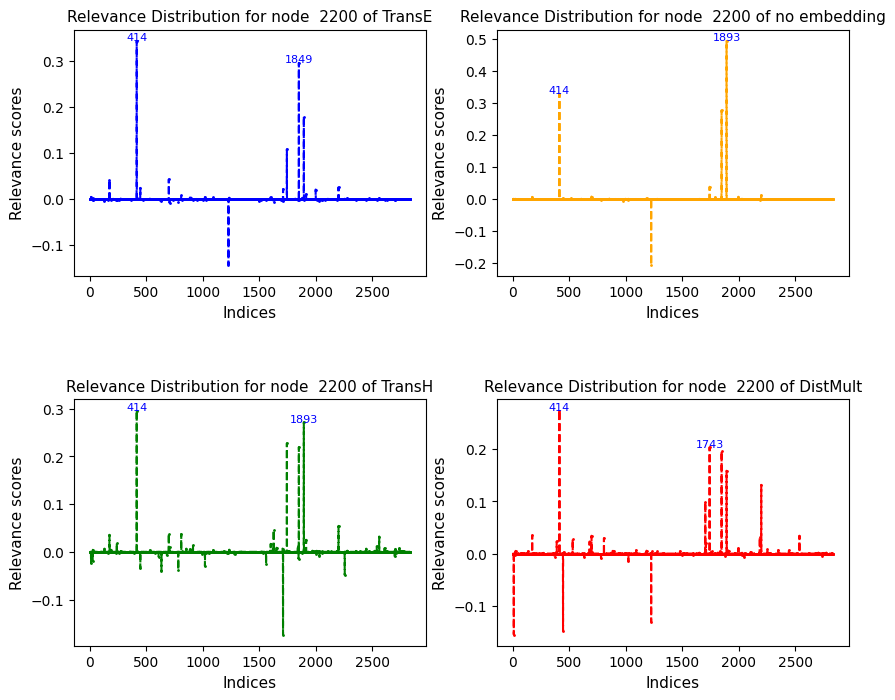

<Figure size 900x600 with 0 Axes>

relevances_node_2321.pt 2321  24 relevances_node_856.pt


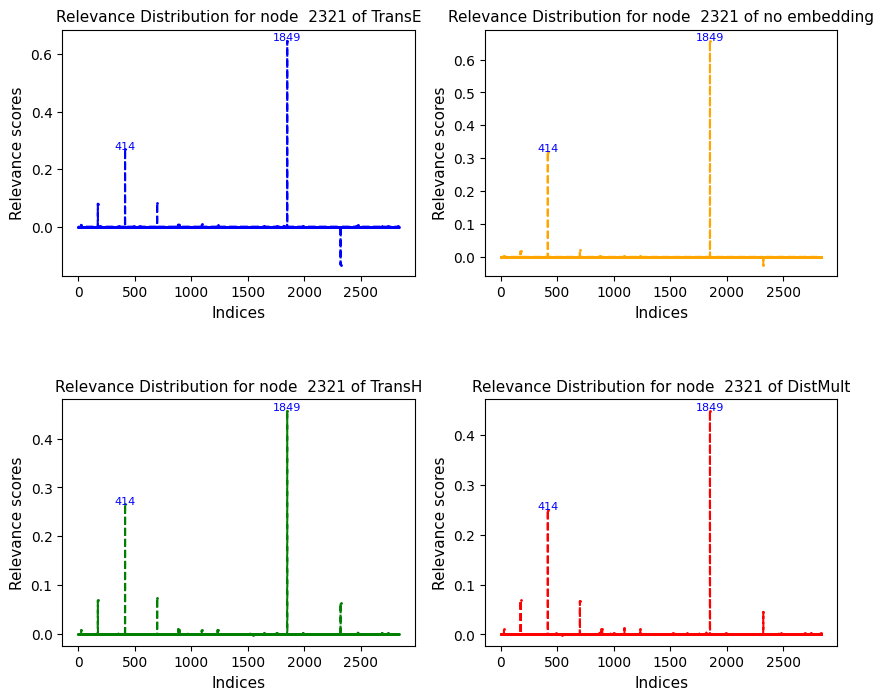

<Figure size 900x600 with 0 Axes>

relevances_node_2380.pt 2380  24 relevances_node_856.pt


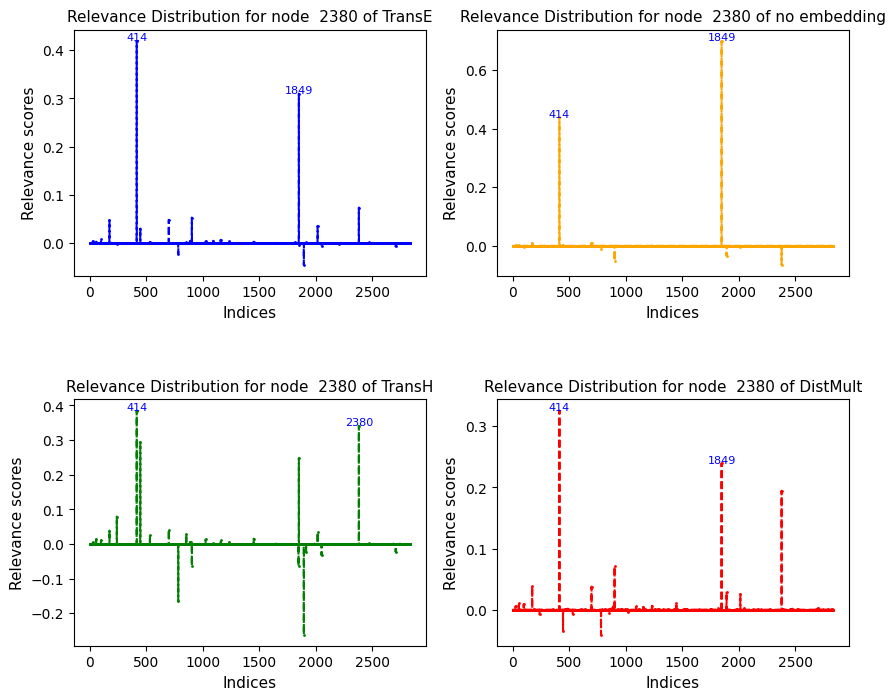

<Figure size 900x600 with 0 Axes>

relevances_node_2433.pt 2433  24 relevances_node_856.pt


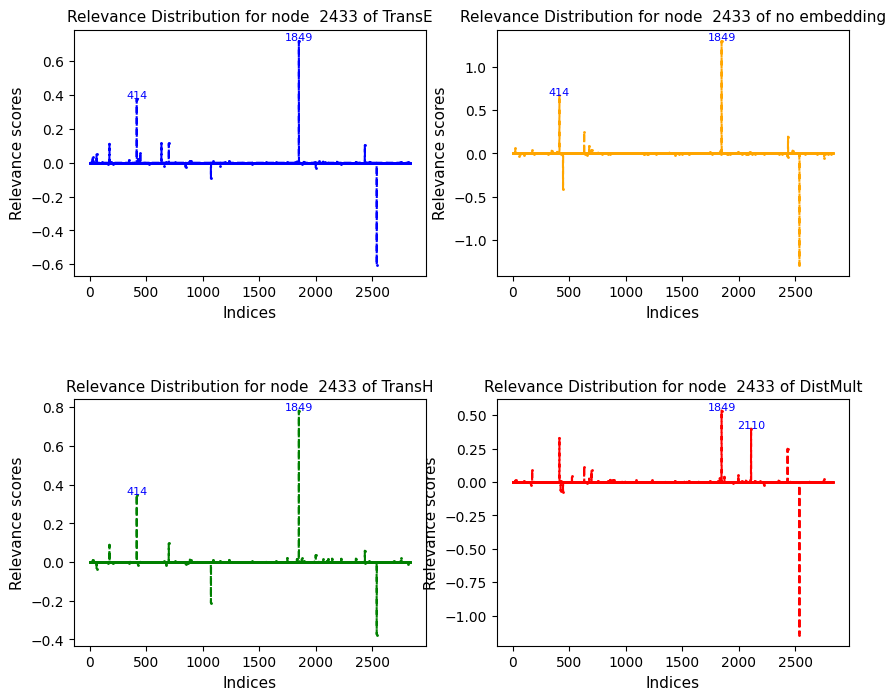

<Figure size 900x600 with 0 Axes>

relevances_node_2500.pt 2500  24 relevances_node_856.pt


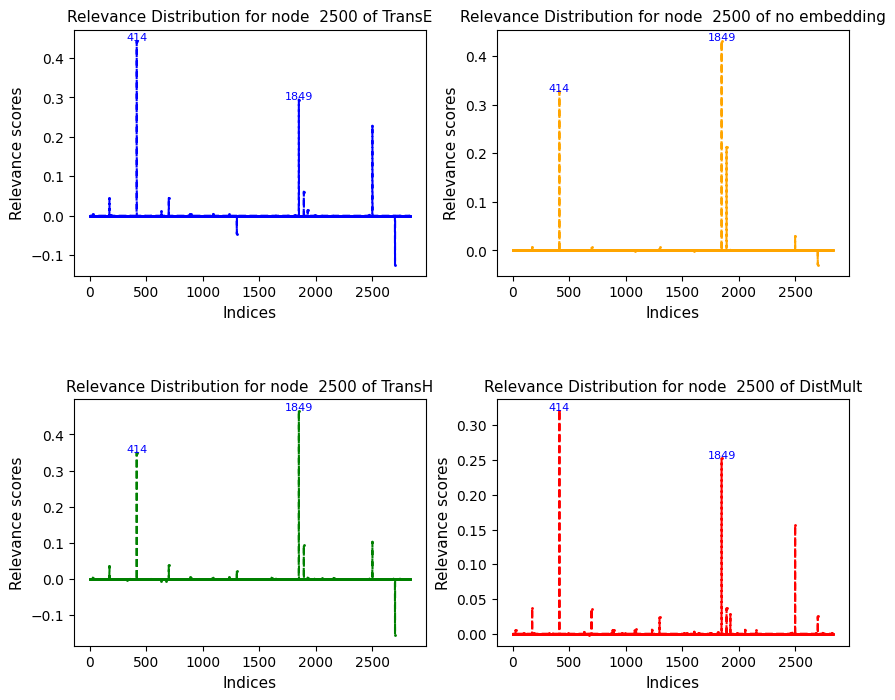

<Figure size 900x600 with 0 Axes>

relevances_node_2516.pt 2516  24 relevances_node_856.pt


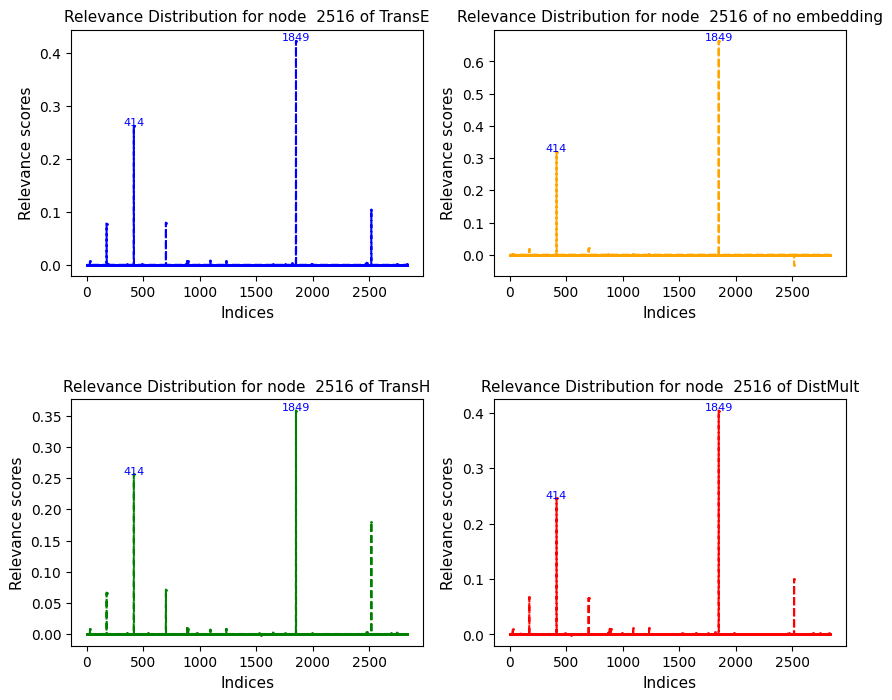

<Figure size 900x600 with 0 Axes>

relevances_node_2534.pt 2534  24 relevances_node_856.pt


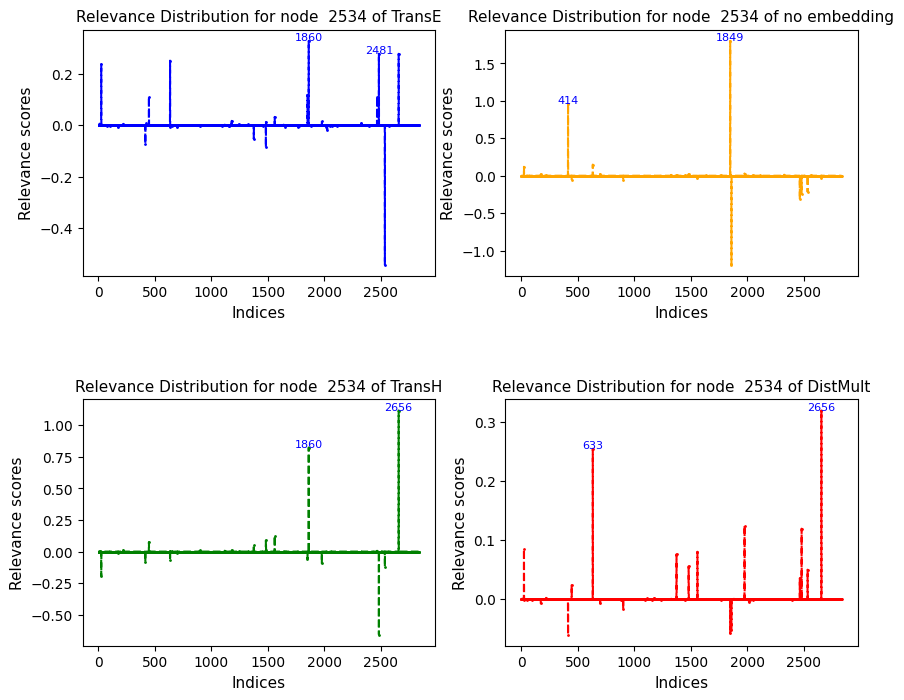

<Figure size 900x600 with 0 Axes>

relevances_node_2639.pt 2639  24 relevances_node_856.pt


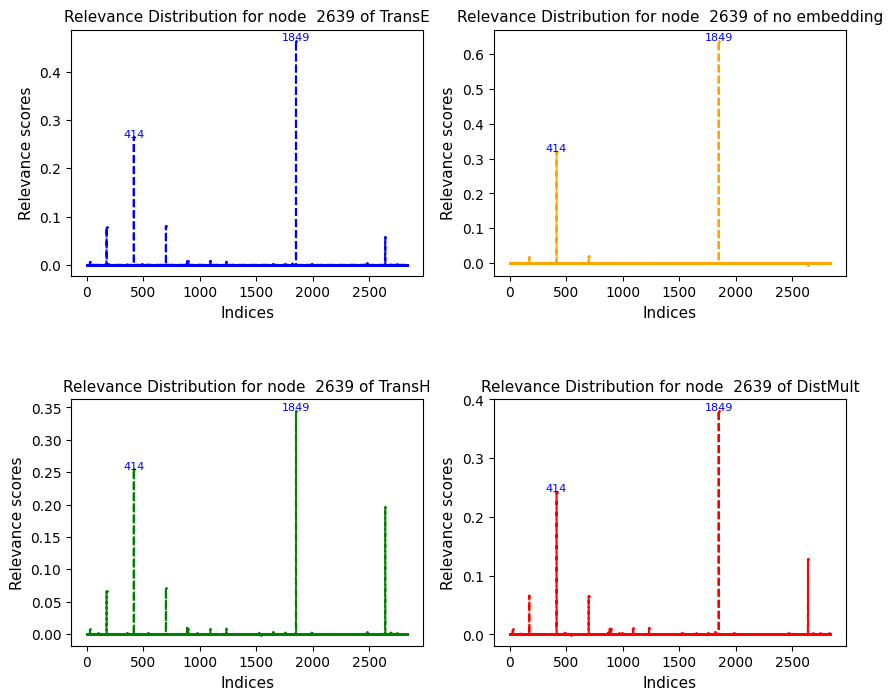

<Figure size 900x600 with 0 Axes>

relevances_node_323.pt 323  24 relevances_node_856.pt


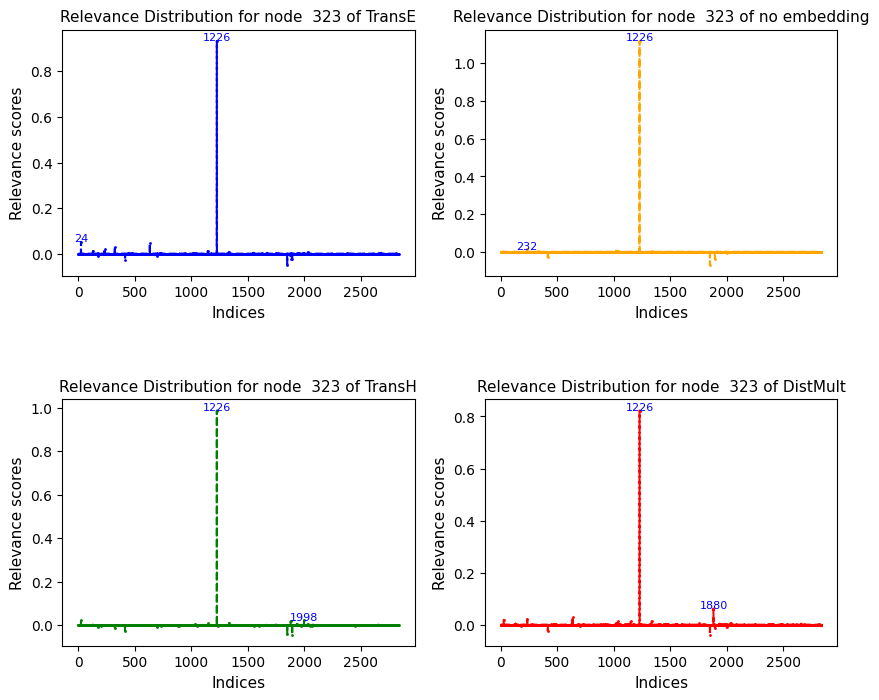

<Figure size 900x600 with 0 Axes>

relevances_node_394.pt 394  24 relevances_node_856.pt


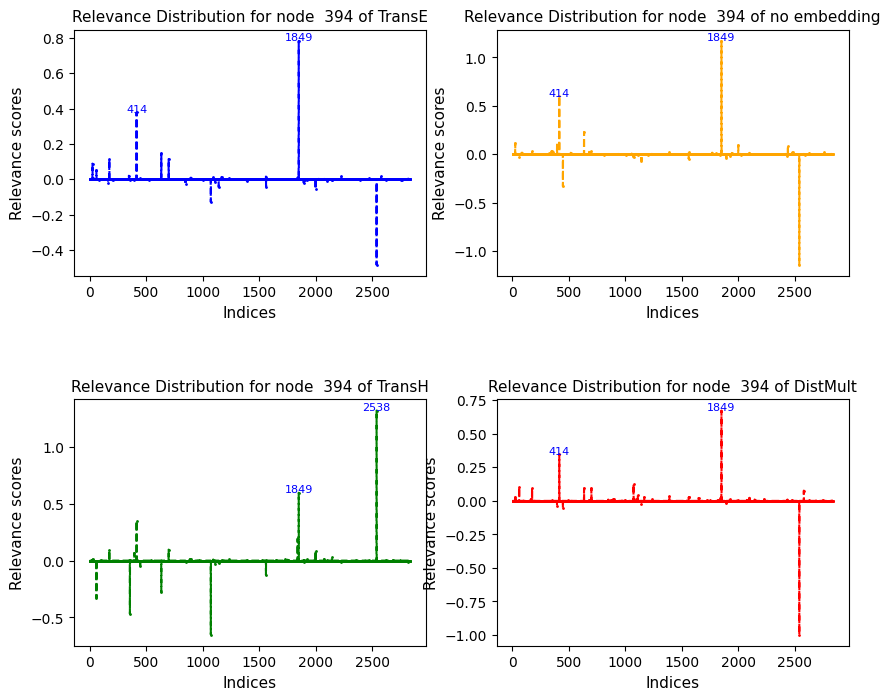

<Figure size 900x600 with 0 Axes>

relevances_node_467.pt 467  24 relevances_node_856.pt


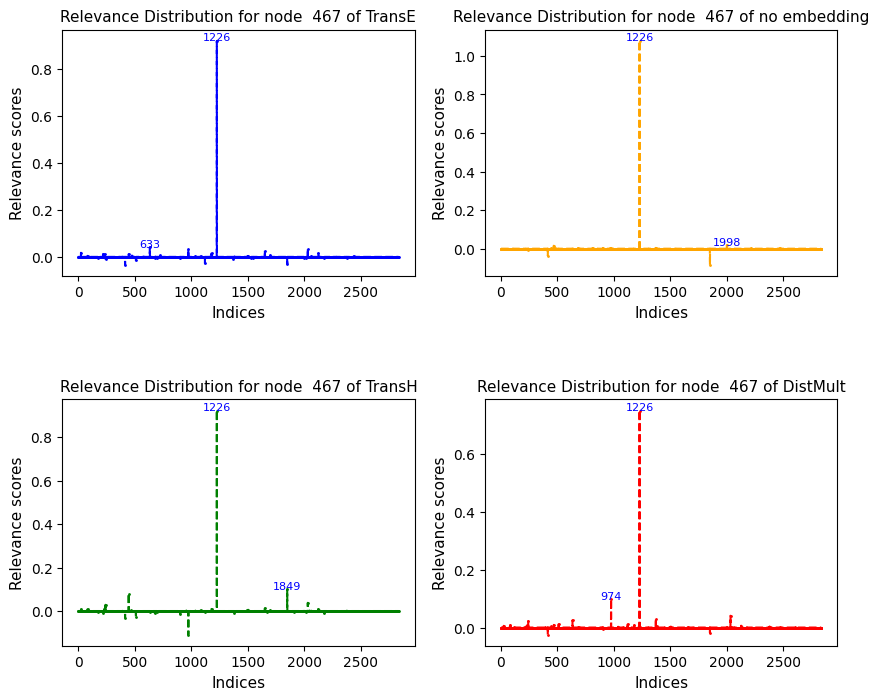

<Figure size 900x600 with 0 Axes>

relevances_node_532.pt 532  24 relevances_node_856.pt


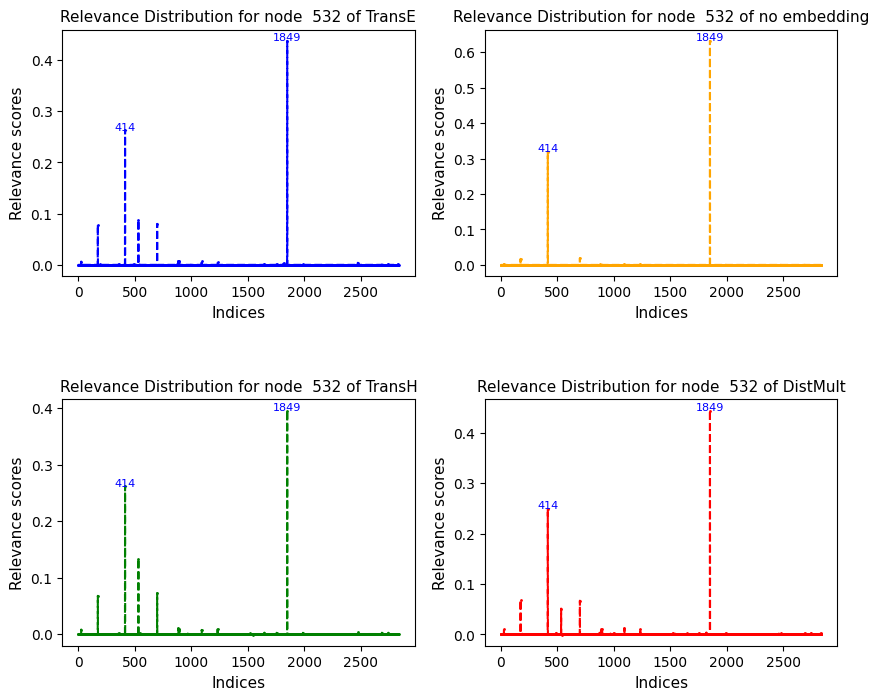

<Figure size 900x600 with 0 Axes>

relevances_node_572.pt 572  24 relevances_node_856.pt


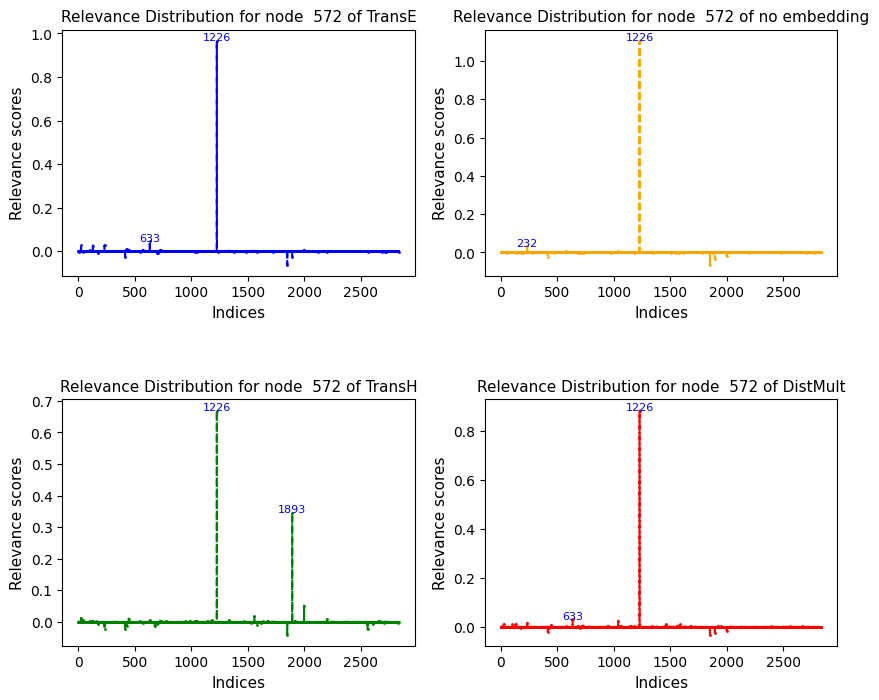

<Figure size 900x600 with 0 Axes>

relevances_node_600.pt 600  24 relevances_node_856.pt


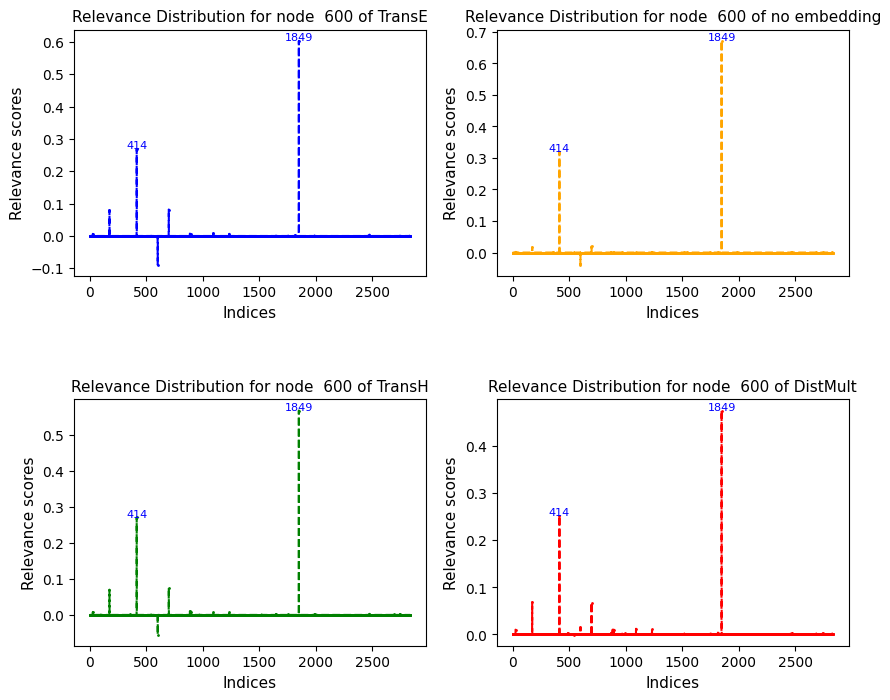

<Figure size 900x600 with 0 Axes>

relevances_node_636.pt 636  24 relevances_node_856.pt


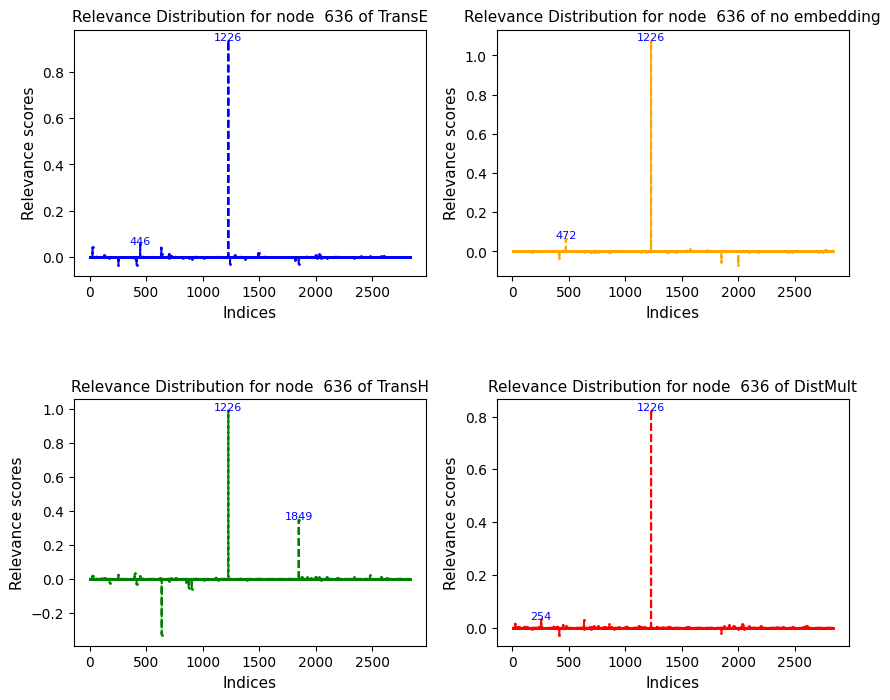

<Figure size 900x600 with 0 Axes>

relevances_node_64.pt 64  24 relevances_node_856.pt


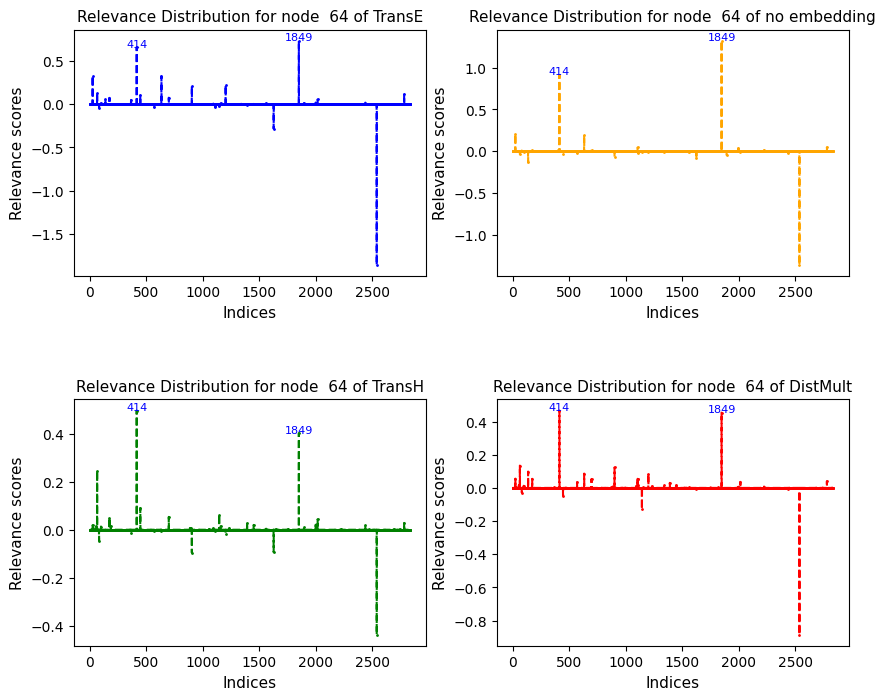

<Figure size 900x600 with 0 Axes>

relevances_node_643.pt 643  24 relevances_node_856.pt


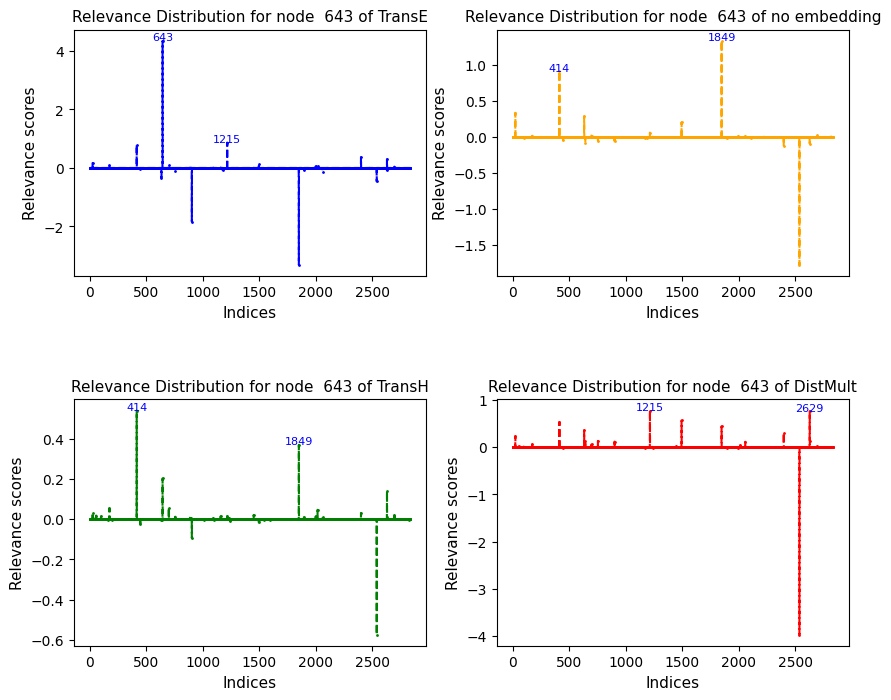

<Figure size 900x600 with 0 Axes>

relevances_node_682.pt 682  24 relevances_node_856.pt


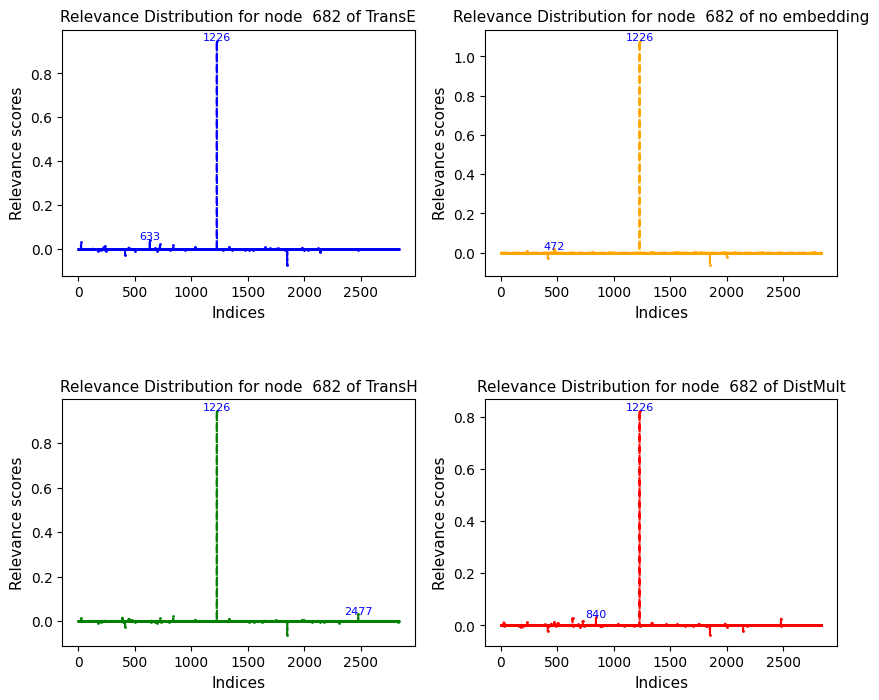

<Figure size 900x600 with 0 Axes>

relevances_node_787.pt 787  24 relevances_node_856.pt


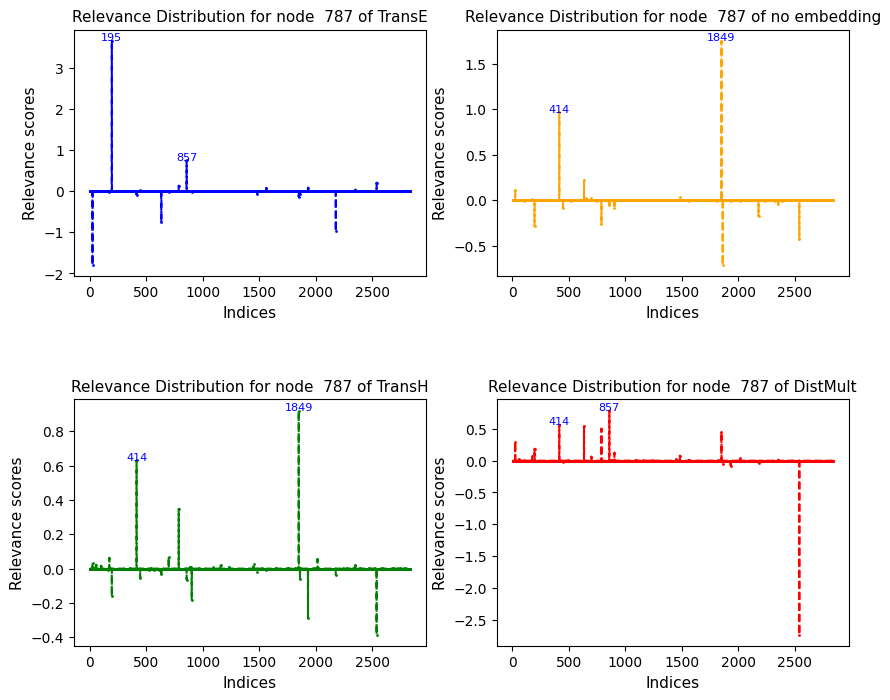

<Figure size 900x600 with 0 Axes>

relevances_node_819.pt 819  24 relevances_node_856.pt


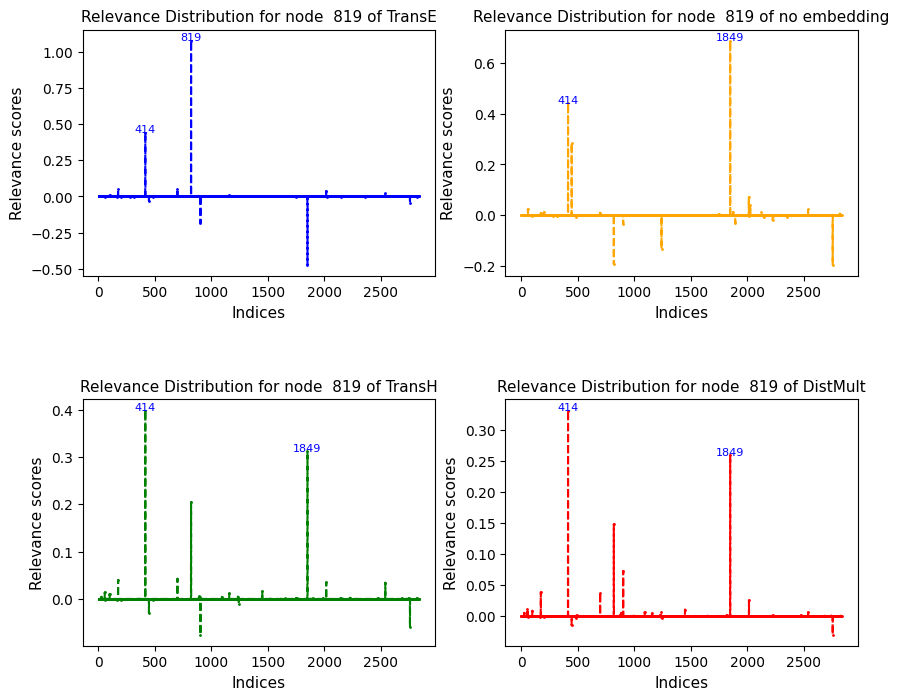

<Figure size 900x600 with 0 Axes>

relevances_node_821.pt 821  24 relevances_node_856.pt


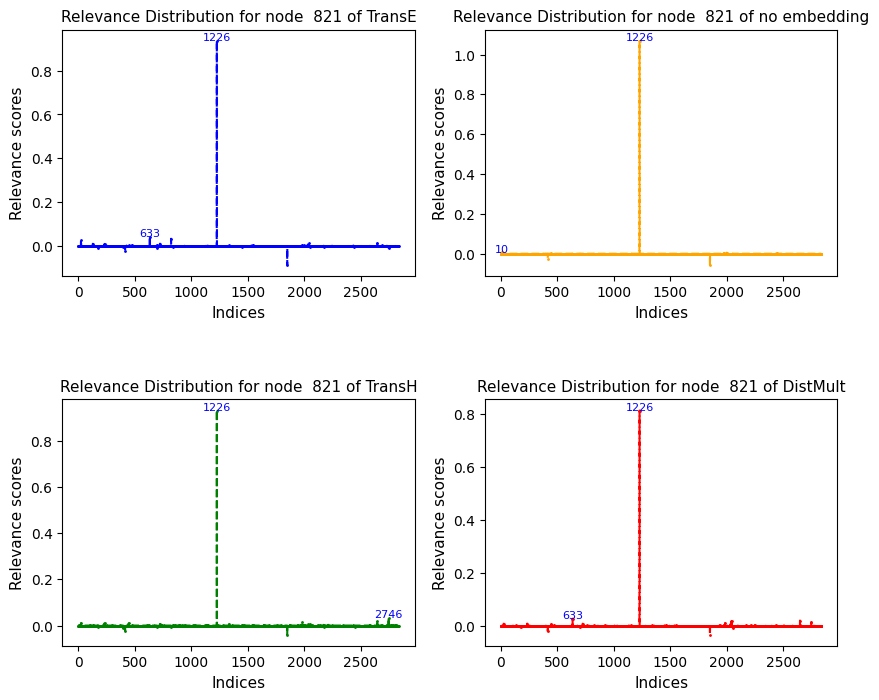

<Figure size 900x600 with 0 Axes>

relevances_node_83.pt 83  24 relevances_node_856.pt


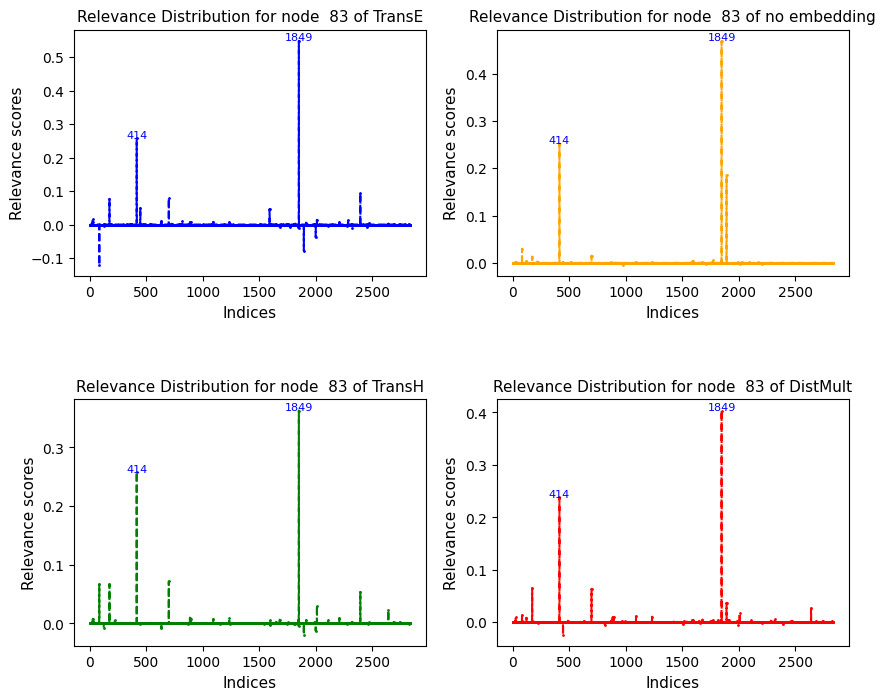

<Figure size 900x600 with 0 Axes>

relevances_node_856.pt 856  24 relevances_node_856.pt


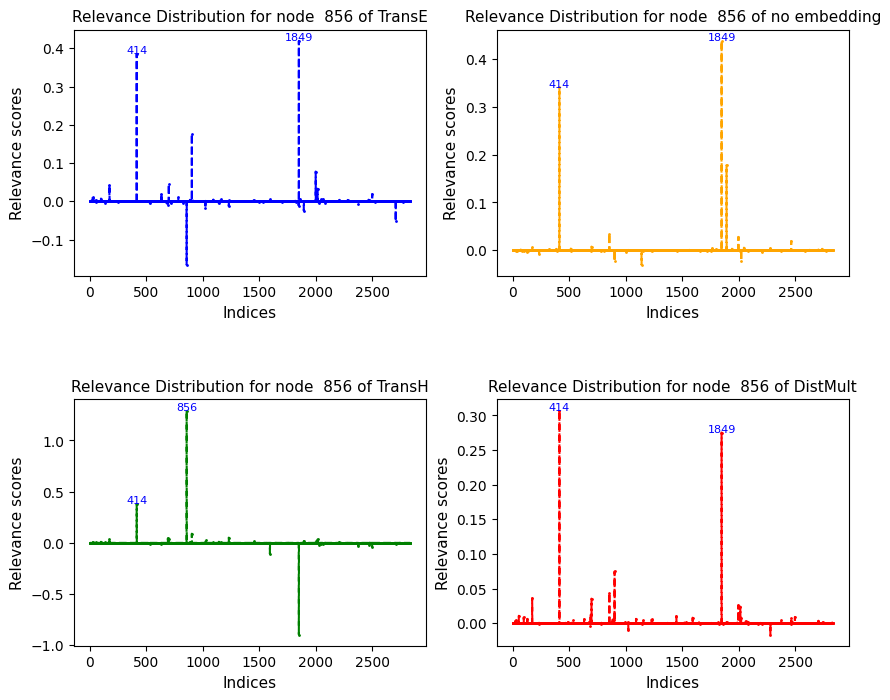

<Figure size 900x600 with 0 Axes>

In [585]:
path = 'out/AIFB/RGCN_no_emb/relevances/'
path_dist = 'out/AIFB/RGCN_emb/DistMult/relevances/'
path_transe = 'out/AIFB/RGCN_emb/TransE/relevances/'
path_transh = 'out/AIFB/RGCN_emb/TransH/relevances/'
fil = os.listdir(path)
fil_transe = os.listdir('out/AIFB/RGCN_emb/TransE/relevances/')
fil_transh = os.listdir('out/AIFB/RGCN_emb/TransH/relevances/')
fil_dist = os.listdir('out/AIFB/RGCN_emb/DistMult/relevances/')
rel_no = [file for file in fil if file.startswith("relevances_node_")]
rel_transe = [file for file in fil if file.startswith("relevances_node_")]
rel_transh = [file for file in fil if file.startswith("relevances_node_")]
rel_dist = [file for file in fil if file.startswith("relevances_node_")]

dfs = []
for rel in rel_transe:
    rte = torch.load(path_transe+rel).to_dense().detach().numpy()
    node_name = rel.split('node_')[1].split('.')[0]


    print(rel, node_name, adapt_node, rel2)
    rno = torch.load(path+rel).to_dense().detach().numpy()
    rth = torch.load(path_transh+rel).to_dense().detach().numpy()
    rdi = torch.load(path_dist+rel).to_dense().detach().numpy()
    #ra = np.sort(ra)
    #rb = np.sort(rb)
    #Create an array of indices for the sorted data
    indices = np.arange(1, len(rte) + 1)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), gridspec_kw={'hspace': 0.5})
    # Create a line plot with different line styles and markers
    plt.figure(figsize=(9, 6))
    axes[0,0].plot(indices, rte, color='blue', linestyle='--', marker='.', markersize=2, label='Relevance TransE')
    axes[0,1].plot(indices, rno, color='orange', linestyle='--', marker='.', markersize=2, label='Relevance no embedding')
    axes[1,0].plot(indices, rth, color='green', linestyle='--', marker='.', markersize=2, label='Relevance TransH')
    axes[1,1].plot(indices, rdi, color='red', linestyle='--', marker='.', markersize=2, label='Relevance DistMult')
    emb_type = ['TransE', 'no embedding', 'TransH', 'DistMult']
    plt.tight_layout()
    for i, ax in enumerate(axes.flatten()):
        ax.set_xlabel('Indices', fontsize=11)
        ax.set_ylabel('Relevance scores', fontsize=11)
        ax.set_title('Relevance Distribution for node  {} of {}'.format(node_name, emb_type[i]), fontsize=11)


        highest_indices = np.argsort(-[rte, rno, rth, rdi][i])[:2]
        #lowest_indices = np.argsort([rte, rno, rth, rdi][i])[:2]

        # Annotate highest indices at the top of the plot
        for idx in highest_indices:
            ax.annotate(str(idx), xy=(indices[idx], [rte, rno, rth, rdi][i][idx]),
                     xytext=(0, 0.1), textcoords='offset points', ha='center', fontsize=8, color='blue')


    plt.show()

### EDGE RELEVANCE

relevances_edge_107.pt 107


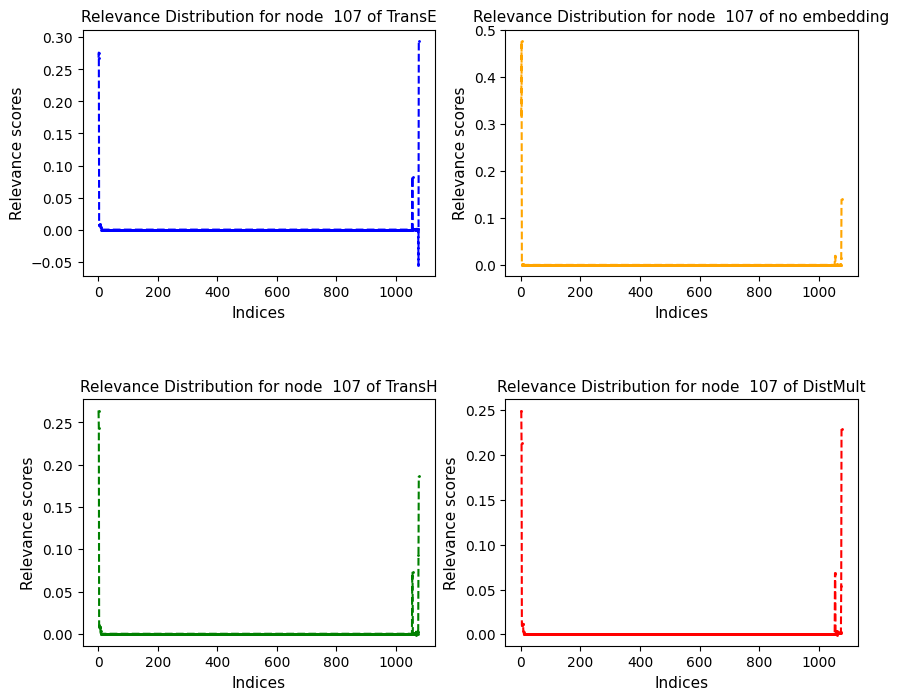

<Figure size 900x600 with 0 Axes>

relevances_edge_1255.pt 1255


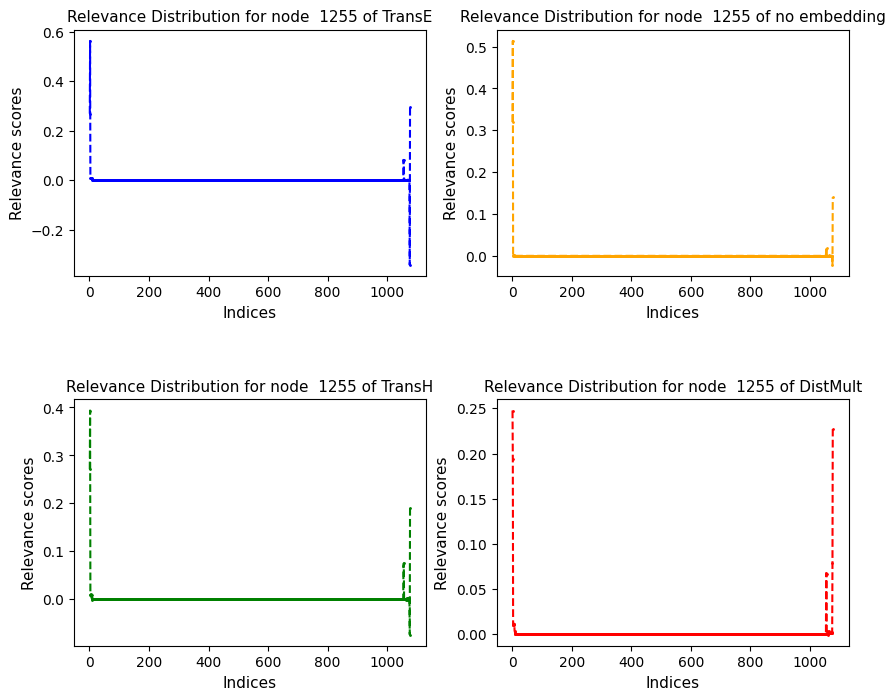

<Figure size 900x600 with 0 Axes>

relevances_edge_1258.pt 1258


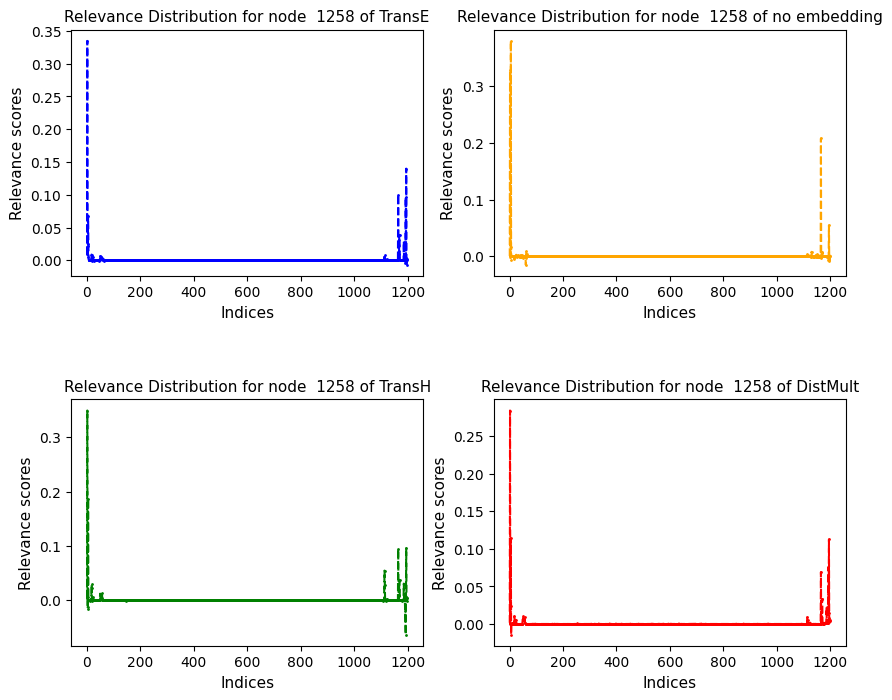

<Figure size 900x600 with 0 Axes>

relevances_edge_129.pt 129


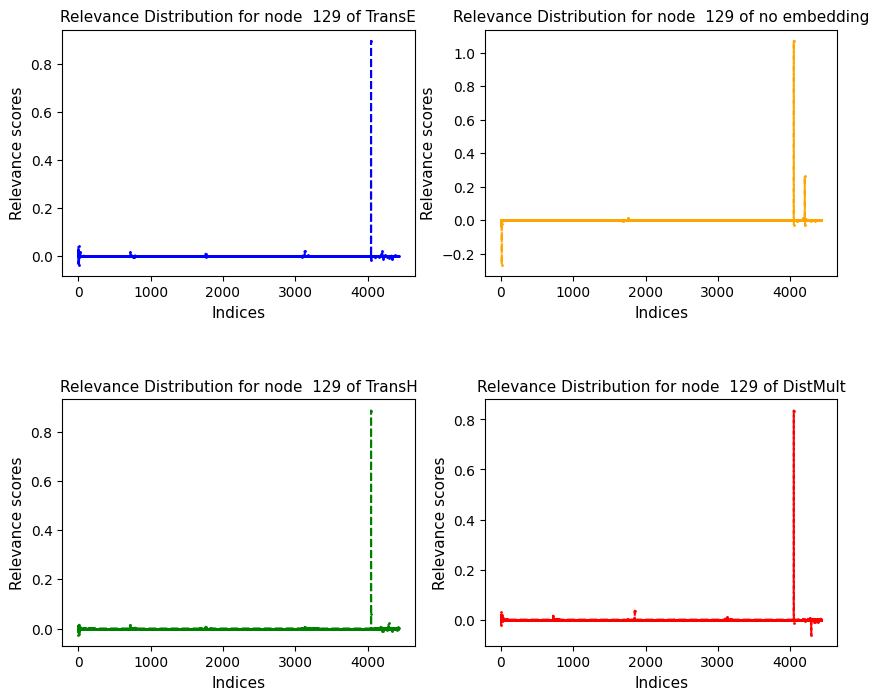

<Figure size 900x600 with 0 Axes>

relevances_edge_1324.pt 1324


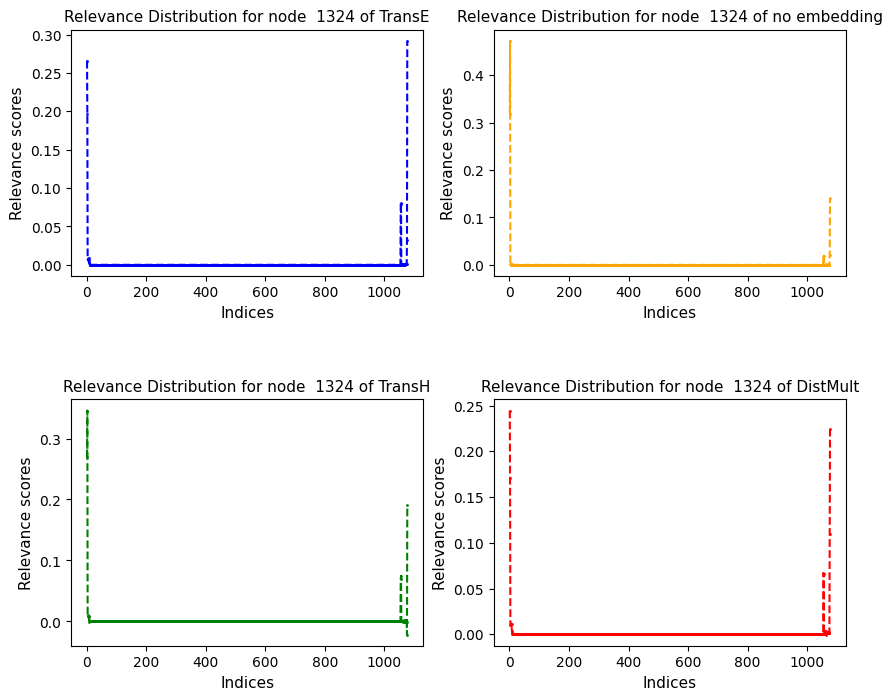

<Figure size 900x600 with 0 Axes>

relevances_edge_1349.pt 1349


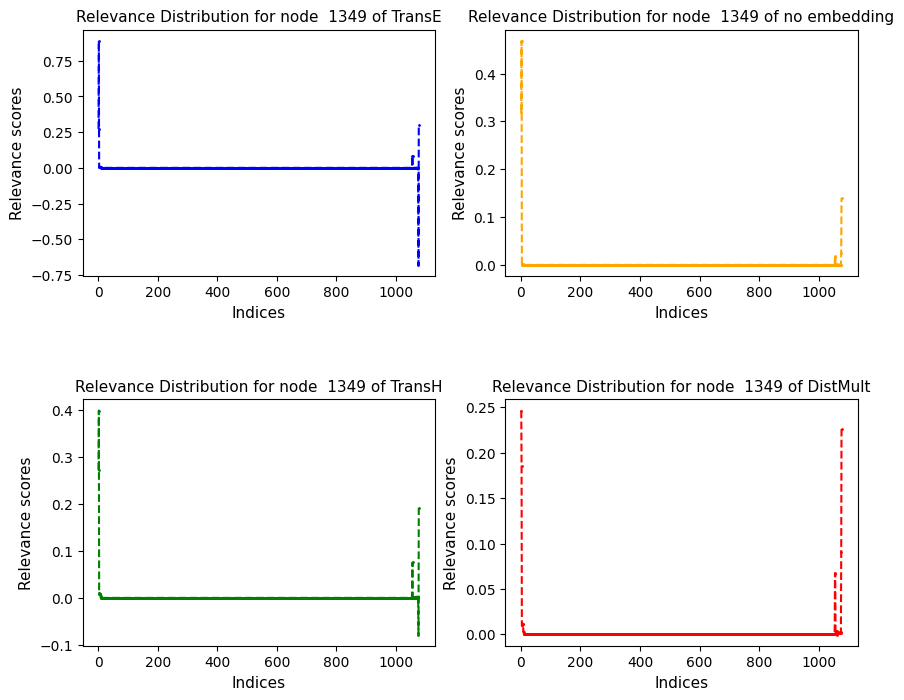

<Figure size 900x600 with 0 Axes>

relevances_edge_1374.pt 1374


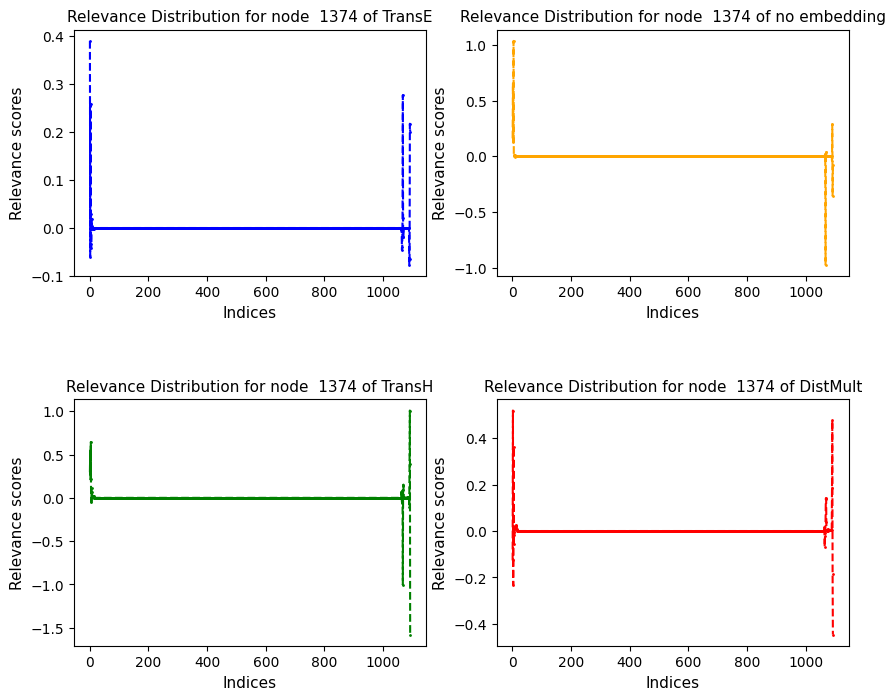

<Figure size 900x600 with 0 Axes>

relevances_edge_1501.pt 1501


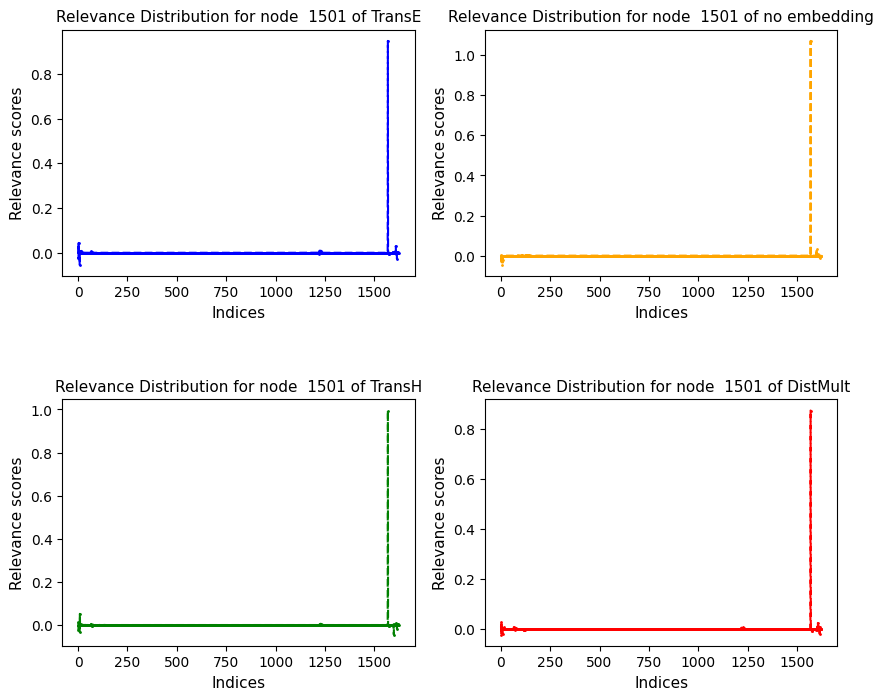

<Figure size 900x600 with 0 Axes>

relevances_edge_1668.pt 1668


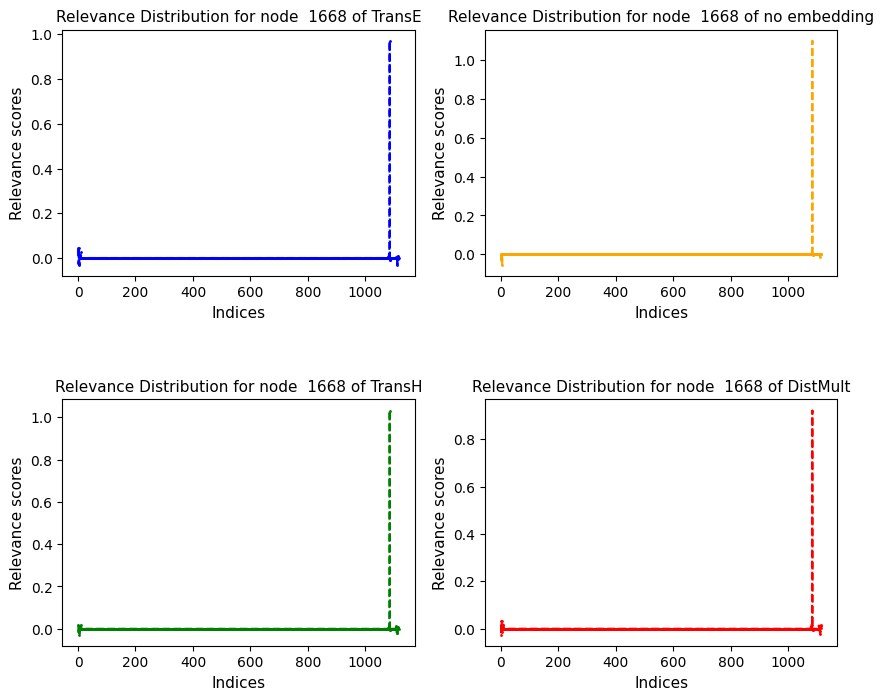

<Figure size 900x600 with 0 Axes>

relevances_edge_1758.pt 1758


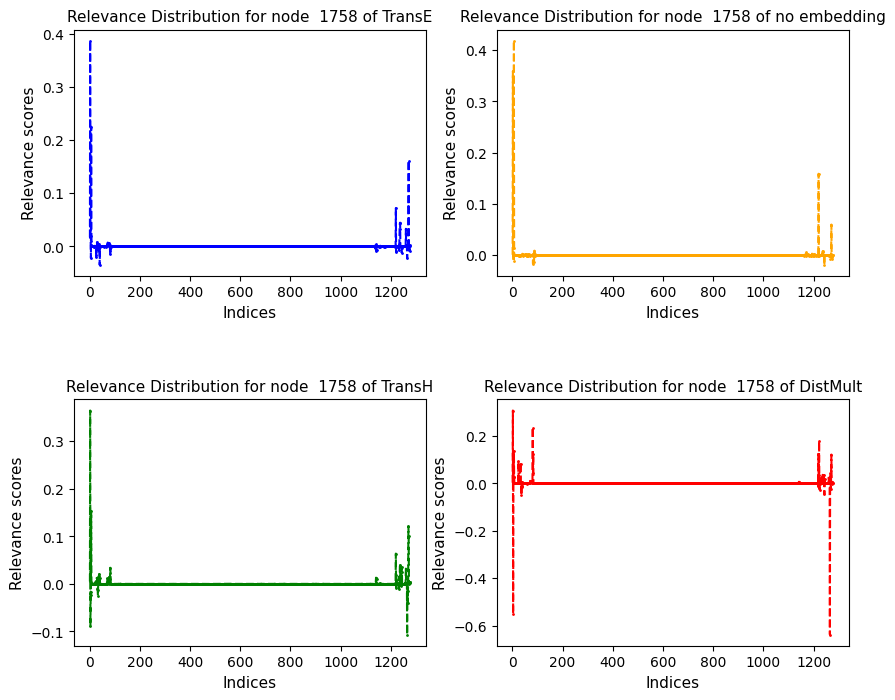

<Figure size 900x600 with 0 Axes>

relevances_edge_2170.pt 2170


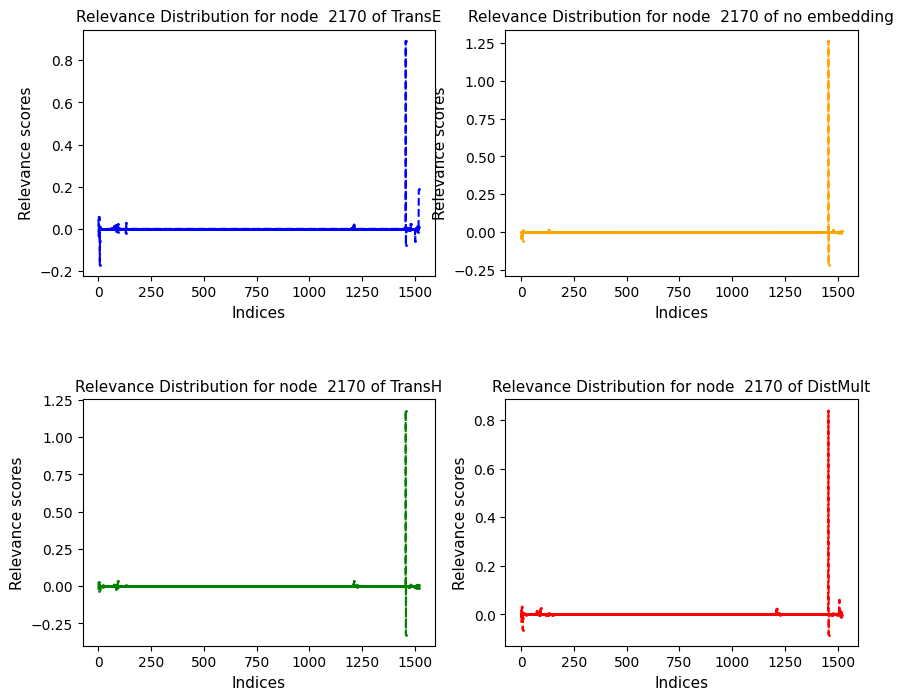

<Figure size 900x600 with 0 Axes>

relevances_edge_2179.pt 2179


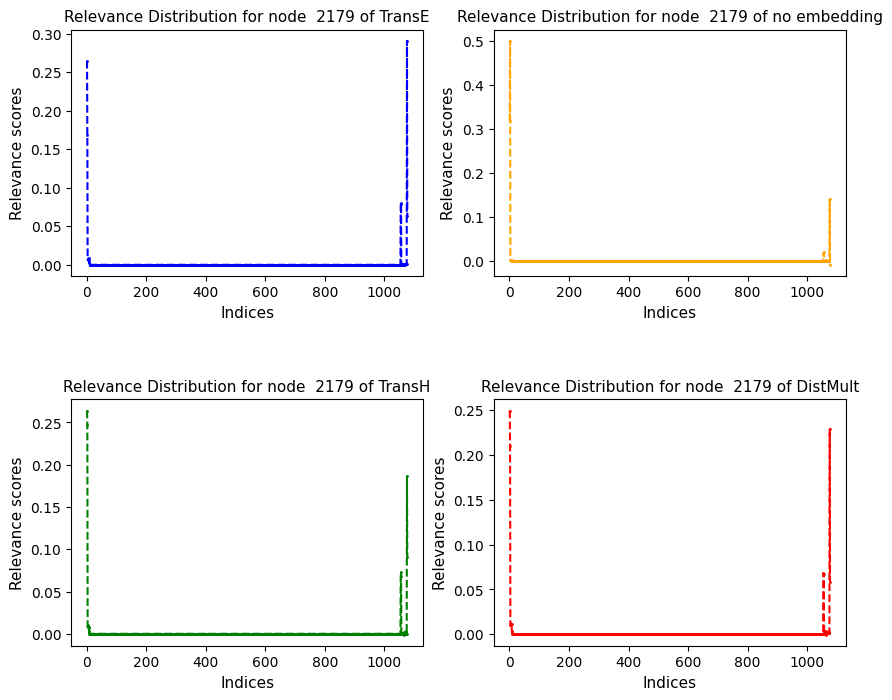

<Figure size 900x600 with 0 Axes>

relevances_edge_2199.pt 2199


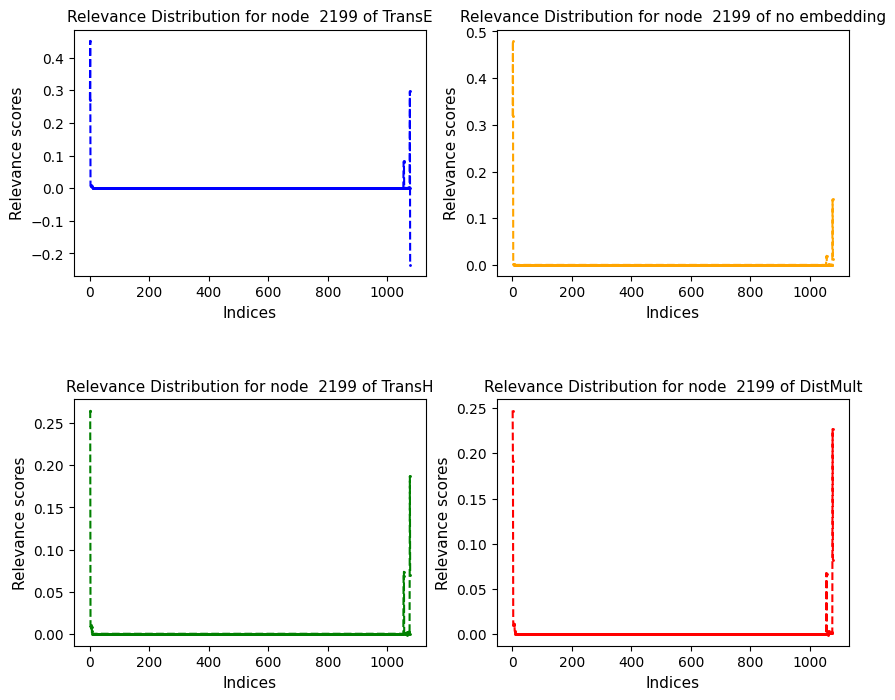

<Figure size 900x600 with 0 Axes>

relevances_edge_2200.pt 2200


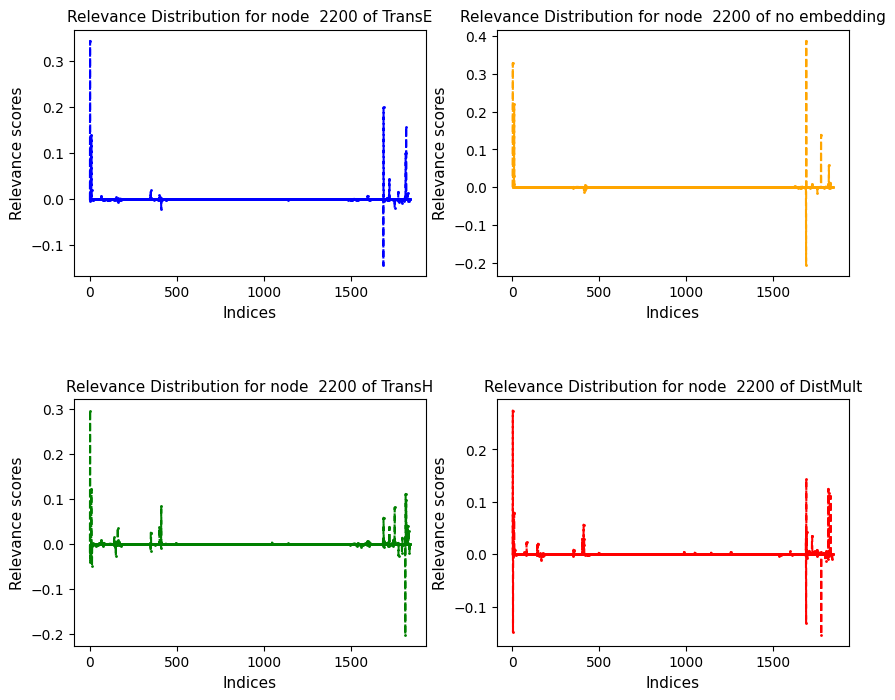

<Figure size 900x600 with 0 Axes>

relevances_edge_2321.pt 2321


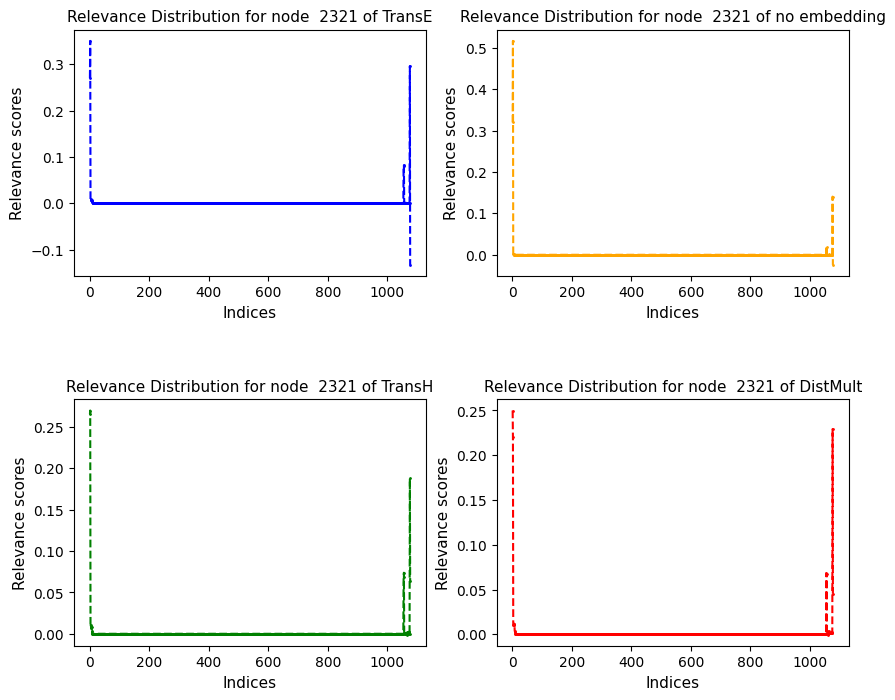

<Figure size 900x600 with 0 Axes>

relevances_edge_2380.pt 2380


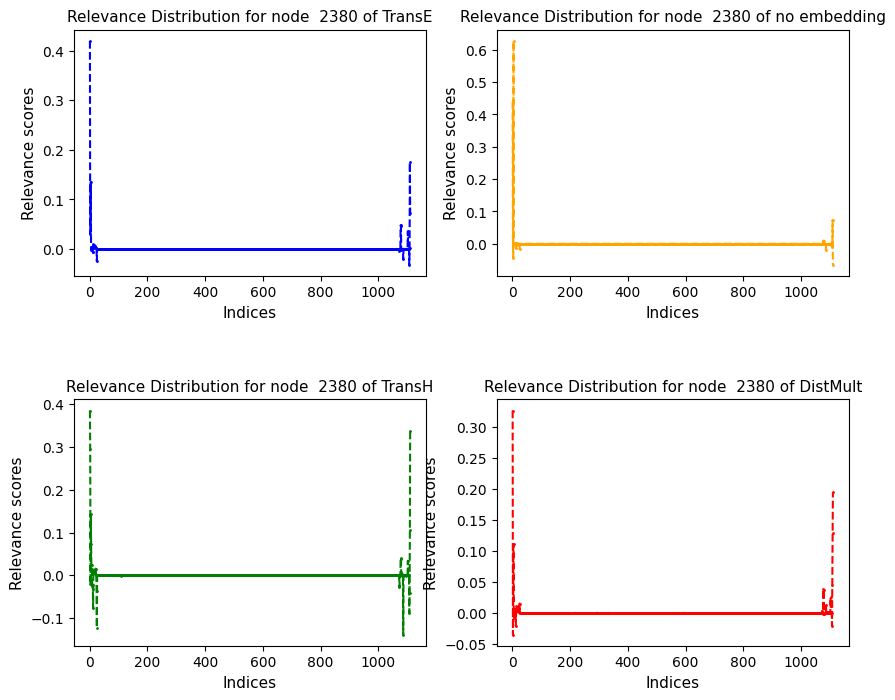

<Figure size 900x600 with 0 Axes>

relevances_edge_2433.pt 2433


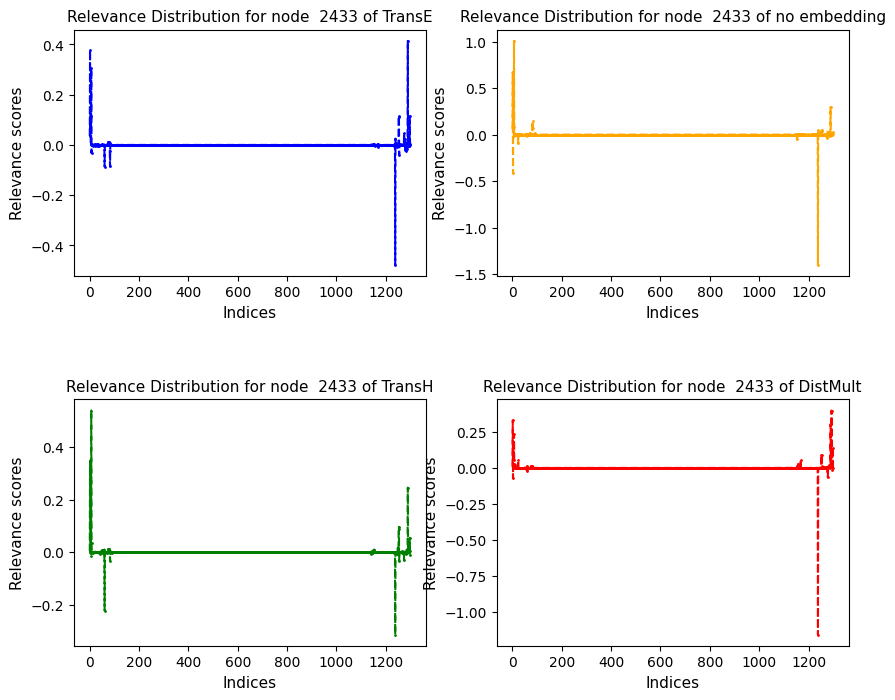

<Figure size 900x600 with 0 Axes>

relevances_edge_2500.pt 2500


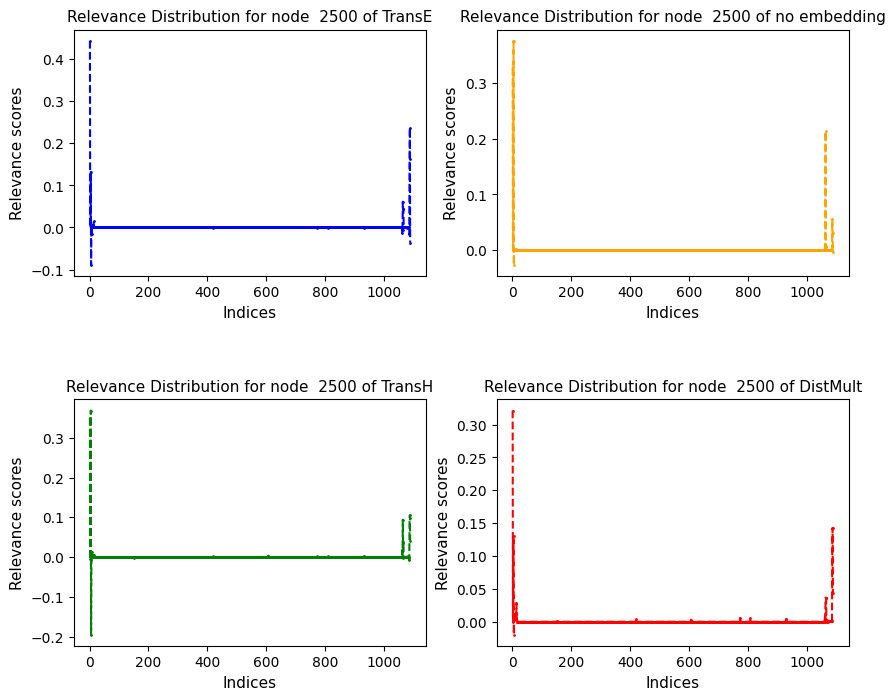

<Figure size 900x600 with 0 Axes>

relevances_edge_2516.pt 2516


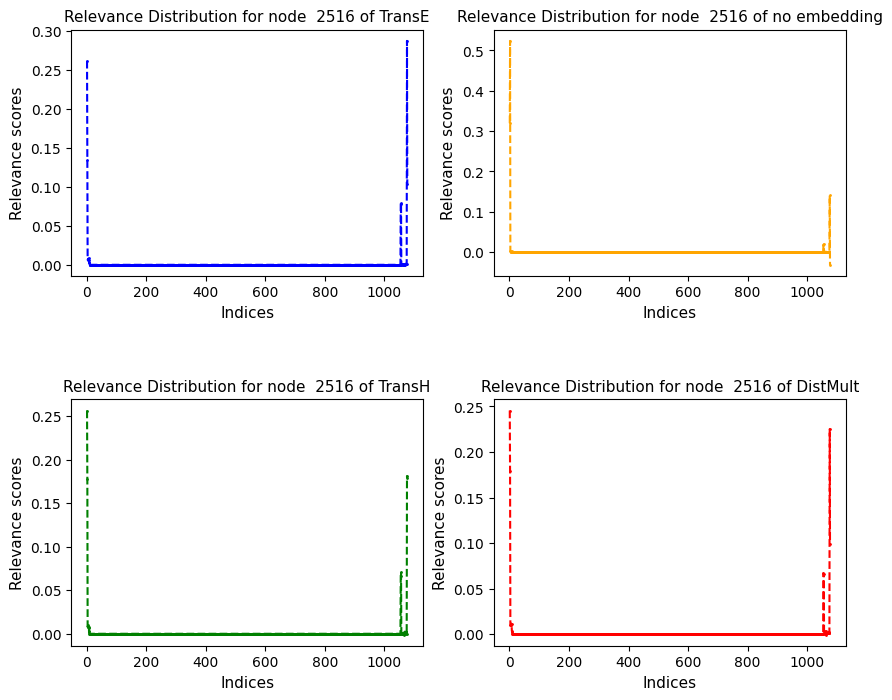

<Figure size 900x600 with 0 Axes>

relevances_edge_2534.pt 2534


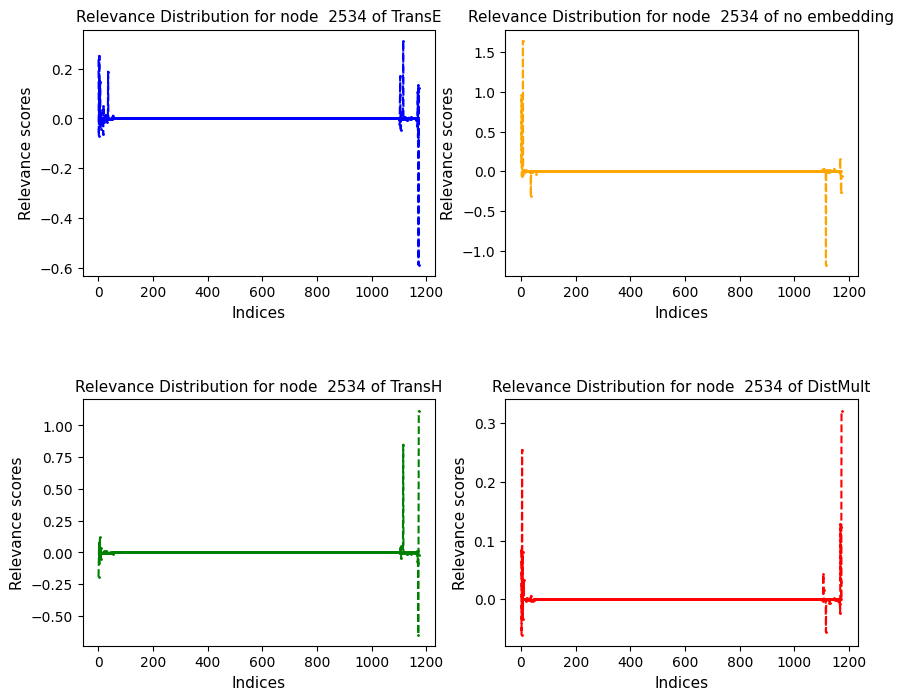

<Figure size 900x600 with 0 Axes>

relevances_edge_2639.pt 2639


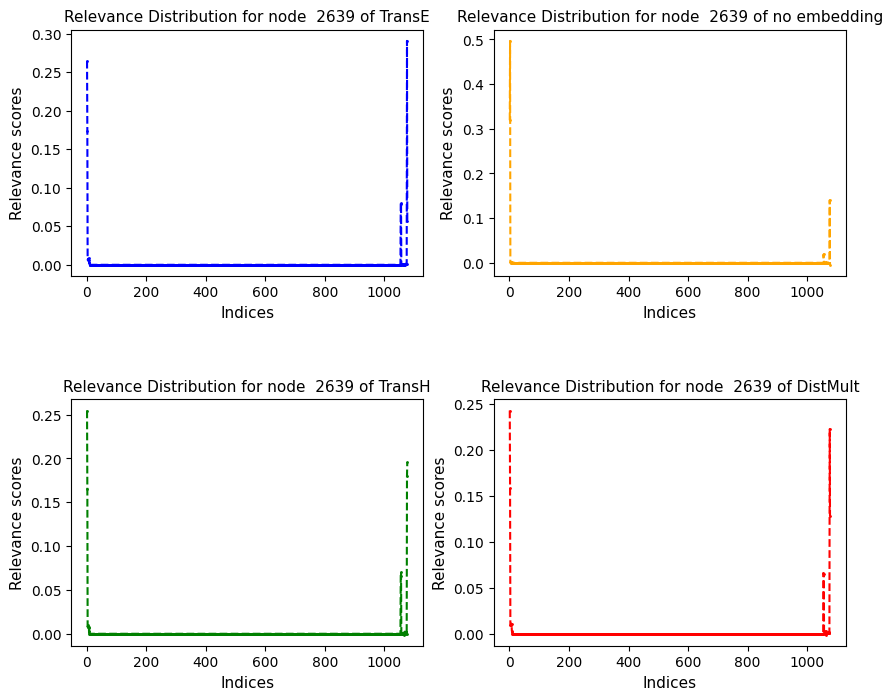

<Figure size 900x600 with 0 Axes>

relevances_edge_323.pt 323


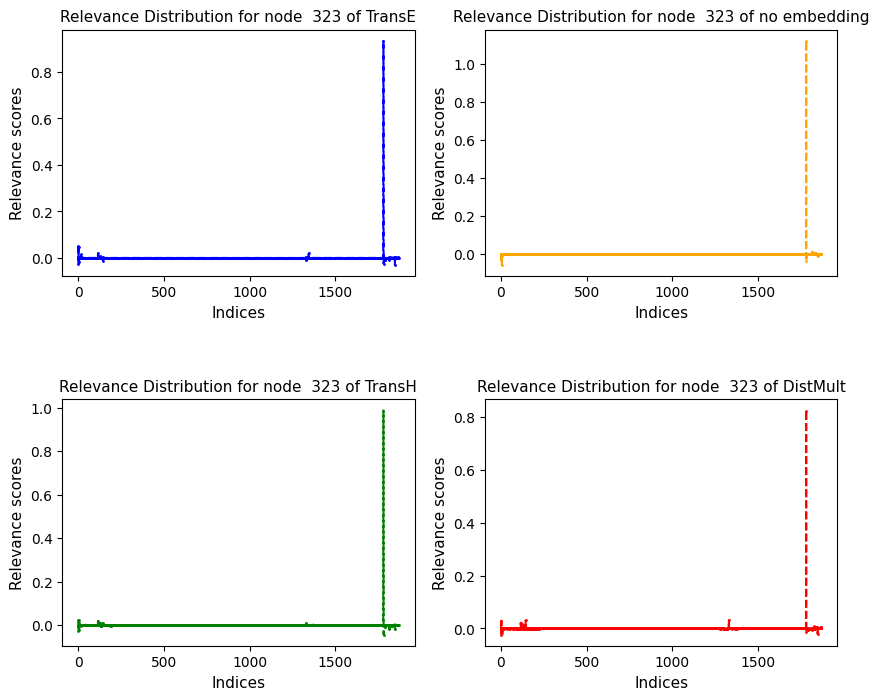

<Figure size 900x600 with 0 Axes>

relevances_edge_394.pt 394


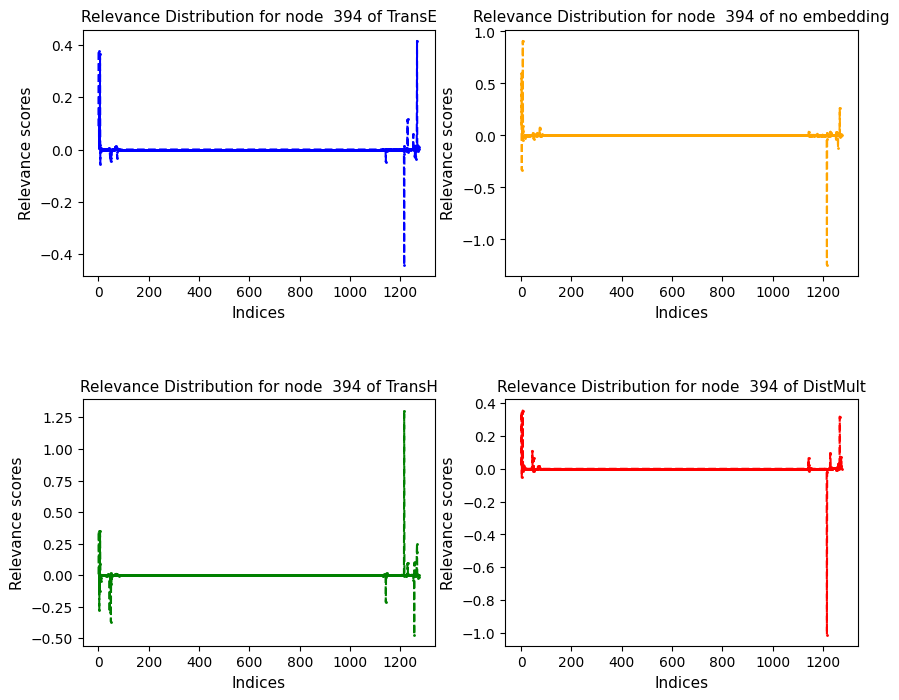

<Figure size 900x600 with 0 Axes>

relevances_edge_467.pt 467


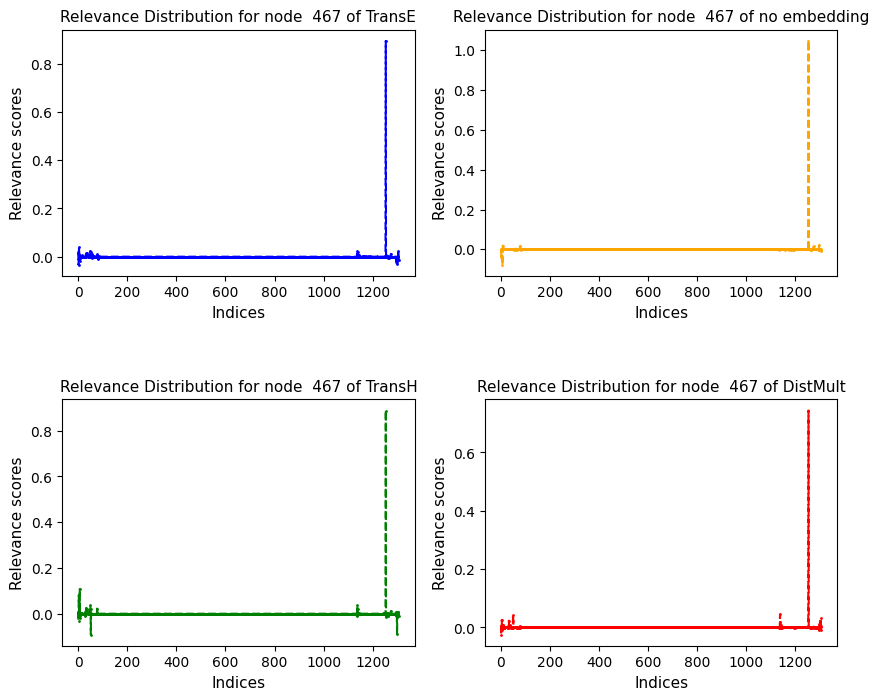

<Figure size 900x600 with 0 Axes>

relevances_edge_532.pt 532


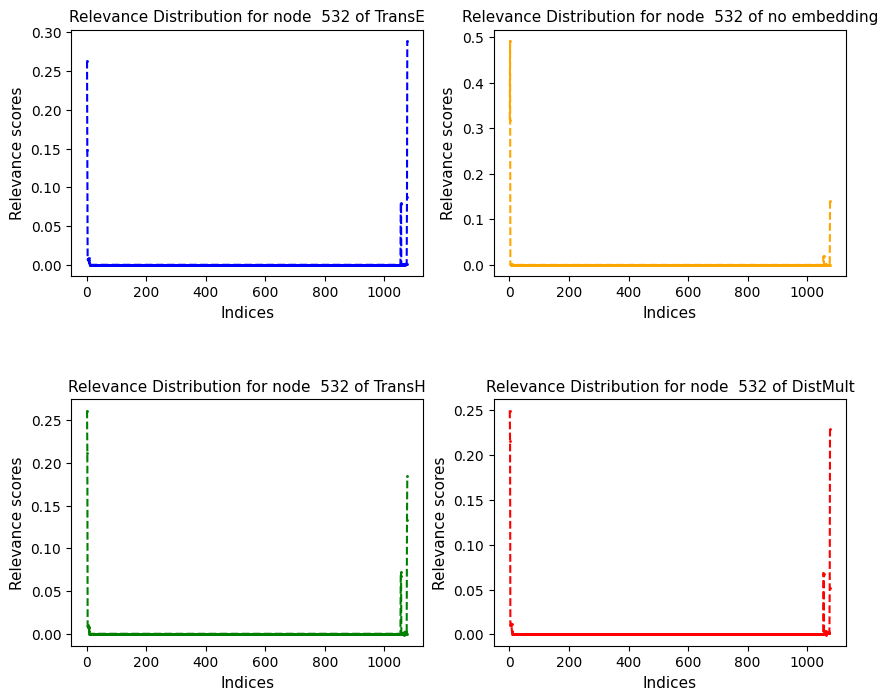

<Figure size 900x600 with 0 Axes>

relevances_edge_572.pt 572


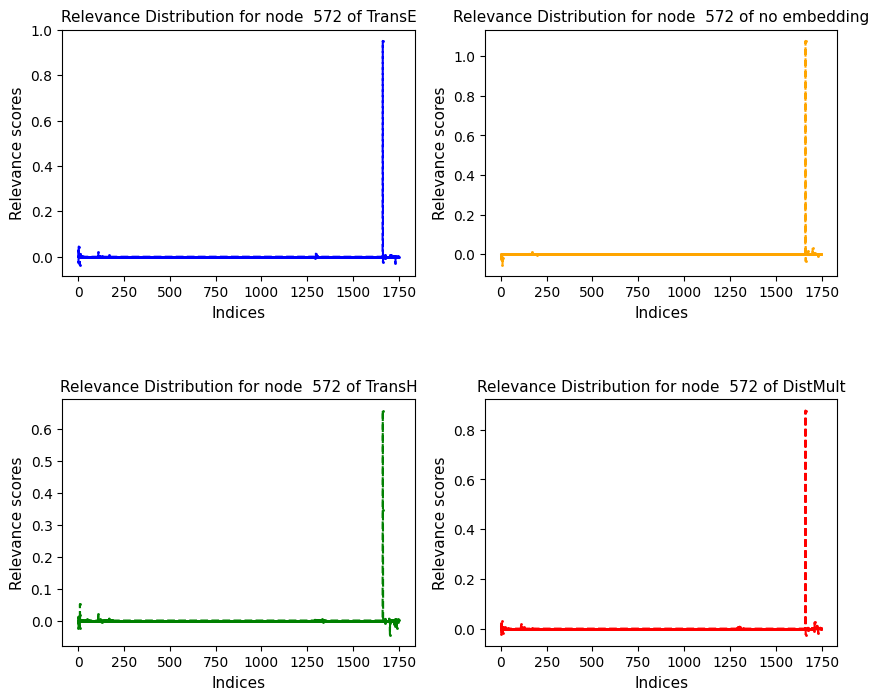

<Figure size 900x600 with 0 Axes>

relevances_edge_600.pt 600


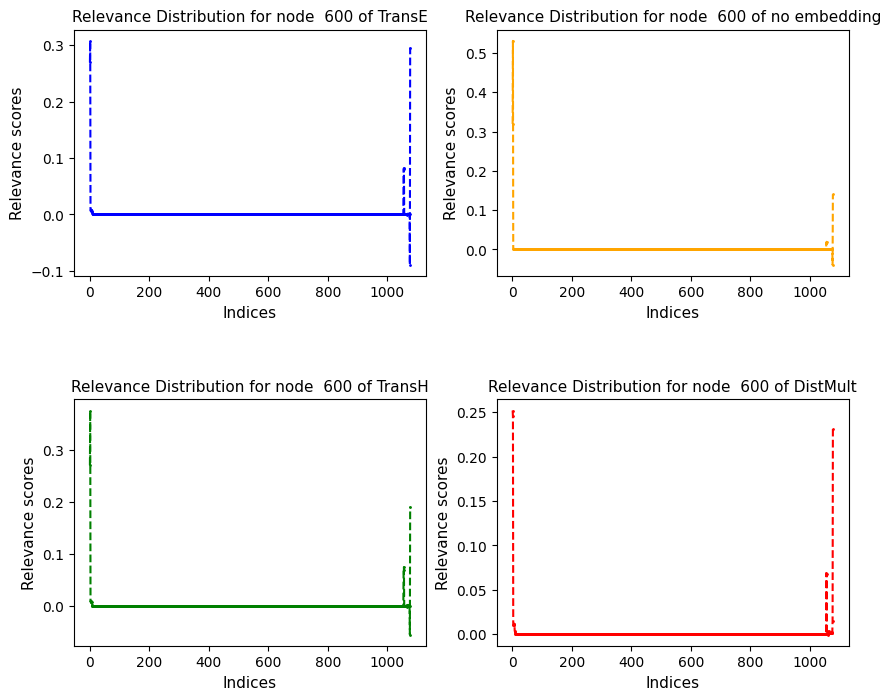

<Figure size 900x600 with 0 Axes>

relevances_edge_636.pt 636


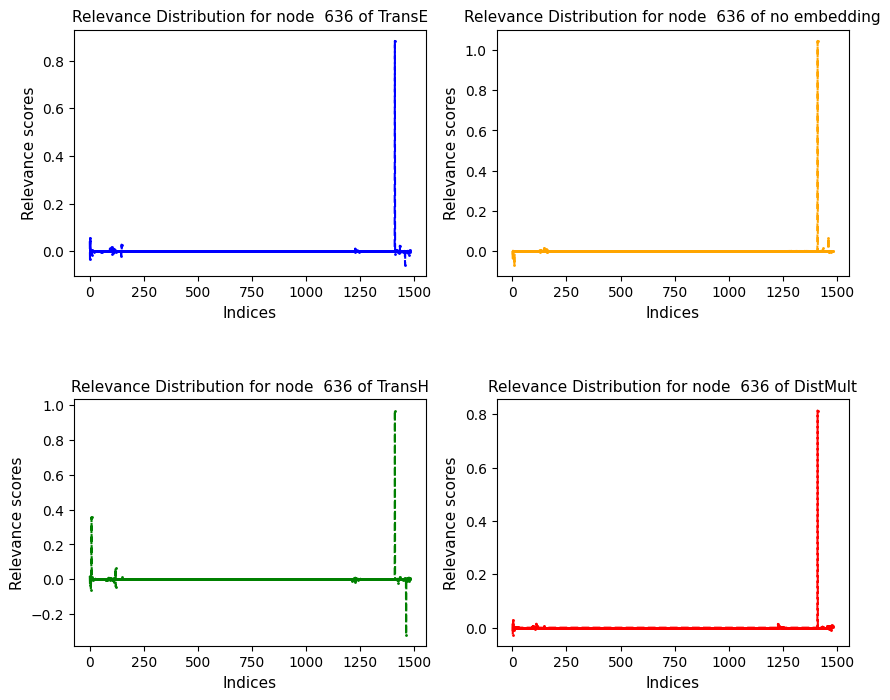

<Figure size 900x600 with 0 Axes>

relevances_edge_64.pt 64


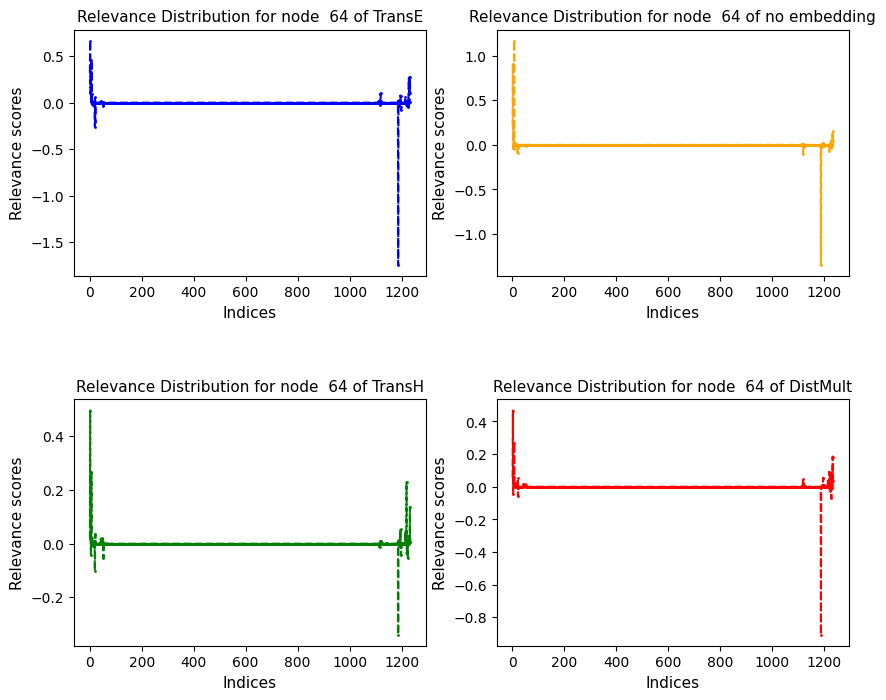

<Figure size 900x600 with 0 Axes>

relevances_edge_643.pt 643


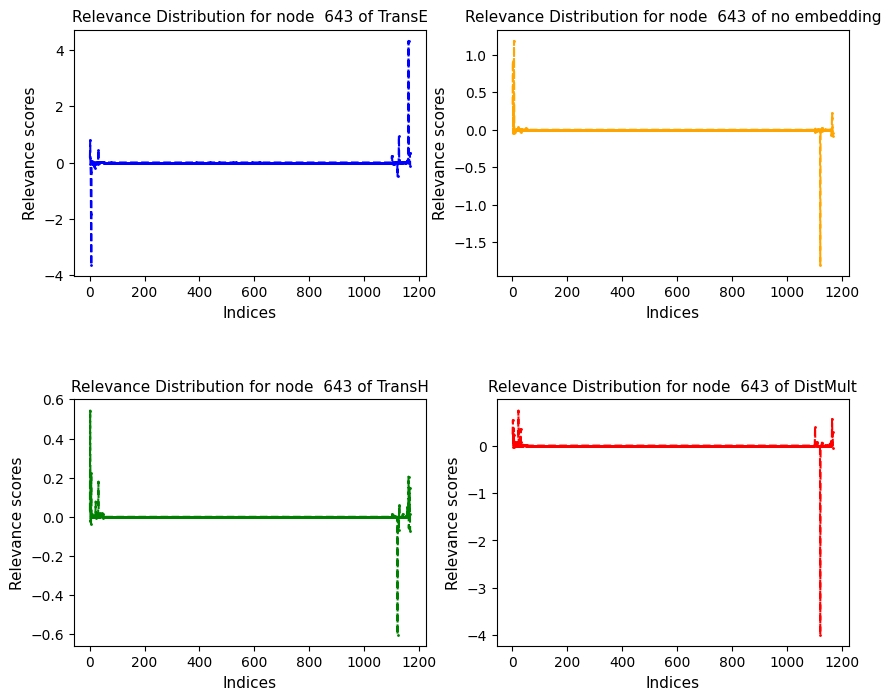

<Figure size 900x600 with 0 Axes>

relevances_edge_682.pt 682


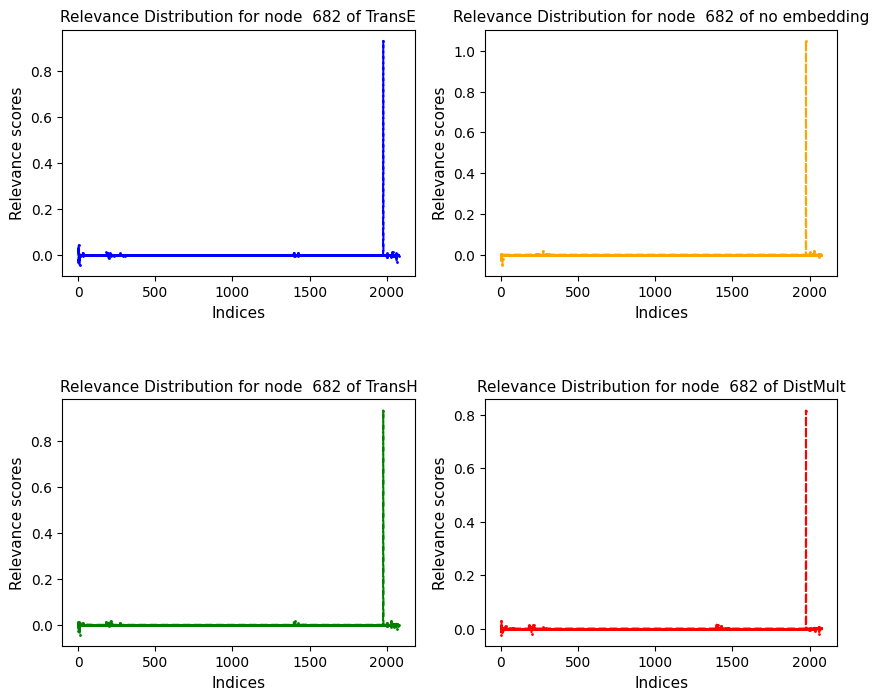

<Figure size 900x600 with 0 Axes>

relevances_edge_787.pt 787


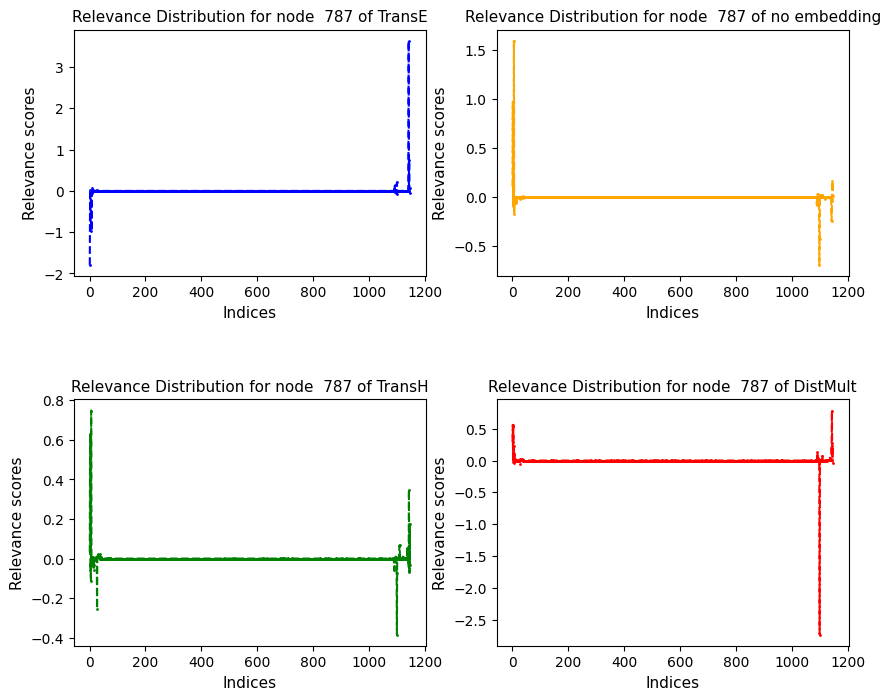

<Figure size 900x600 with 0 Axes>

relevances_edge_819.pt 819


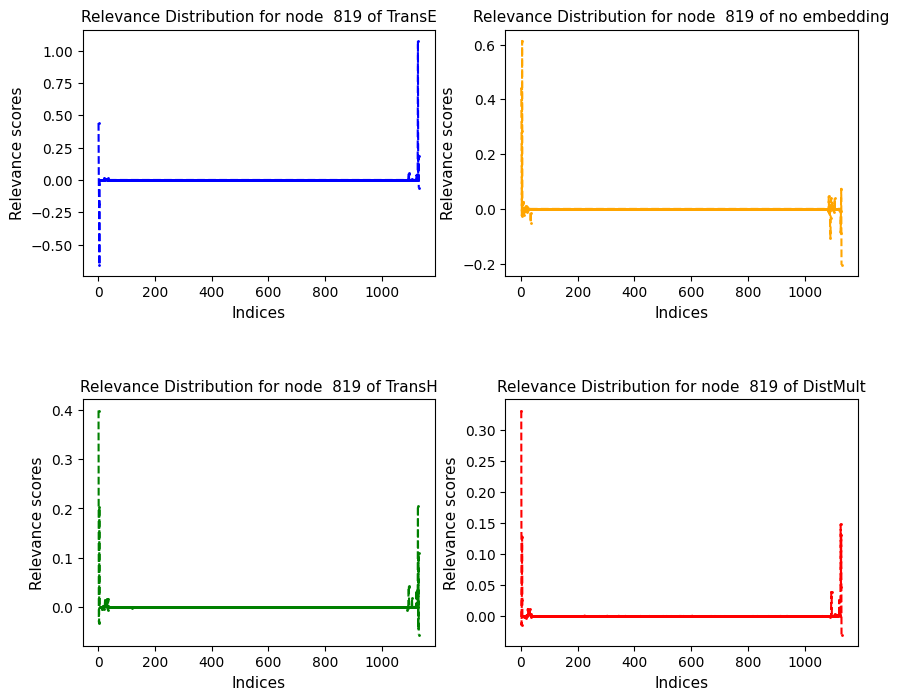

<Figure size 900x600 with 0 Axes>

relevances_edge_821.pt 821


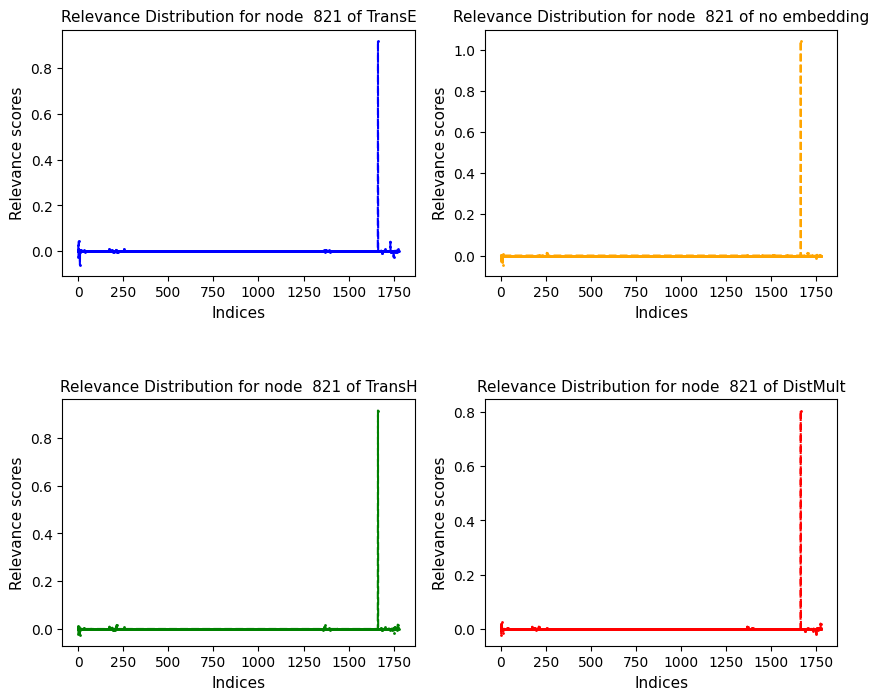

<Figure size 900x600 with 0 Axes>

relevances_edge_83.pt 83


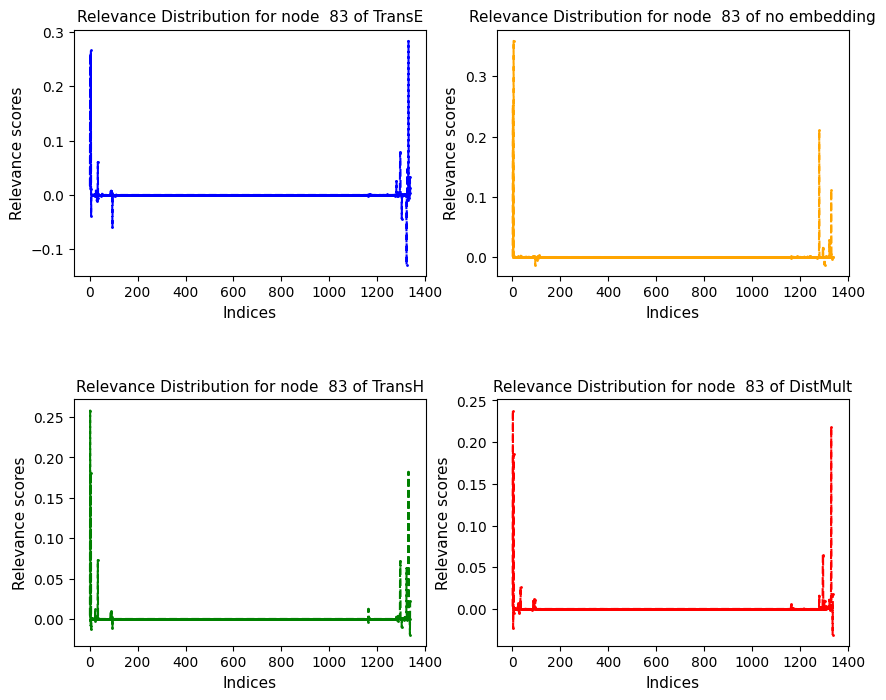

<Figure size 900x600 with 0 Axes>

relevances_edge_856.pt 856


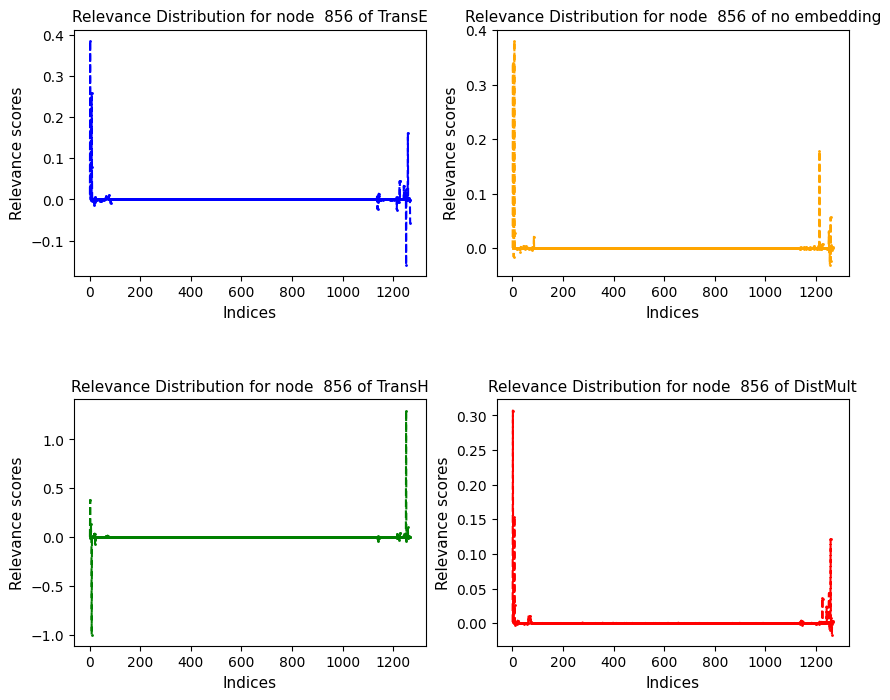

<Figure size 900x600 with 0 Axes>

In [594]:
path = 'out/AIFB/RGCN_no_emb/relevances/'
path_dist = 'out/AIFB/RGCN_emb/DistMult/relevances/'
path_transe = 'out/AIFB/RGCN_emb/TransE/relevances/'
path_transh = 'out/AIFB/RGCN_emb/TransH/relevances/'
fil = os.listdir(path)
fil_transe = os.listdir('out/AIFB/RGCN_emb/TransE/relevances/')
fil_transh = os.listdir('out/AIFB/RGCN_emb/TransH/relevances/')
fil_dist = os.listdir('out/AIFB/RGCN_emb/DistMult/relevances/')
rel_no = [file for file in fil if file.startswith("relevances_edge_")]
rel_transe = [file for file in fil if file.startswith("relevances_edge_")]
rel_transh = [file for file in fil if file.startswith("relevances_edg_")]
rel_dist = [file for file in fil if file.startswith("relevances_edge_")]

dfs = []
for rel in rel_transe:
    rte = torch.load(path_transe+rel).to_dense().detach().numpy()
    node_name = rel.split('edge_')[1].split('.')[0]
    print(rel, node_name)
    rno = torch.load(path+rel).to_dense().detach().numpy()
    rth = torch.load(path_transh+rel).to_dense().detach().numpy()
    rdi = torch.load(path_dist+rel).to_dense().detach().numpy()
    XX,YY = np.meshgrid(np.arange(rno.shape[1]),np.arange(rno.shape[0]))
    table = np.vstack((rte.ravel(),rno.ravel(),rth.ravel(), rdi.ravel(),XX.ravel(),YY.ravel())).T
    table = table[(table[:,0] != 0) & (table[:,1] != 0) & (table[:,2] != 0) & (table[:,3] != 0)]

    indices = np.arange(1, len(table[:,0]) + 1)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), gridspec_kw={'hspace': 0.5})
    # Create a line plot with different line styles and markers
    plt.figure(figsize=(9, 6))
    axes[0,0].plot(indices, table[:,0], color='blue', linestyle='--', marker='.', markersize=2, label='Relevance TransE')
    axes[0,1].plot(indices, table[:,1], color='orange', linestyle='--', marker='.', markersize=2, label='Relevance no embedding')
    axes[1,0].plot(indices, table[:,2], color='green', linestyle='--', marker='.', markersize=2, label='Relevance TransH')
    axes[1,1].plot(indices, table[:,3], color='red', linestyle='--', marker='.', markersize=2, label='Relevance DistMult')
    emb_type = ['TransE', 'no embedding', 'TransH', 'DistMult']
    plt.tight_layout()
    for i, ax in enumerate(axes.flatten()):
        ax.set_xlabel('Indices', fontsize=11)
        ax.set_ylabel('Relevance scores', fontsize=11)
        ax.set_title('Relevance Distribution for node  {} of {}'.format(node_name, emb_type[i]), fontsize=11)


    plt.show()



# TRANS H RGCN

In [595]:
model = 'TransH'
csv = readallcsvinpath('out/AIFB/RGCN_emb/')
pred_before = torch.load('out/AIFB/RGCN_emb/'+model+'/pred_before.pt').to_dense().detach().numpy()
test_file = pd.read_csv('data/AIFB/testSet.tsv', sep='\t')

i2n = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/i2n.pkl')
n2i = {n:i for i, n in enumerate(i2n)}
i2r = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/i2r.pkl')

test_list = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/test_list.pkl')
test_idx = [n2i[name] for name, _ in test_list.items()]
for i,n in enumerate(i2n):
    if i == 234:
        print(n)

i2r
r2i = {r:i for i, r in enumerate(i2r)}
path = 'out/AIFB/RGCN_emb/'+model+'/'
pred_before = pred_before[test_idx]
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
fil.sort()
dfs = []
fil = fil[:len(fil)-1]
for file in fil:
    dfs.append(torch.load(path + file).to_dense()[test_idx].detach().numpy())
print(len(fil))
diff = {}
i=0                                
for i in range(len(fil)):
    minus = (dfs[i] - pred_before)
    diff[i] = minus
    # if minus.sum() != 0:
    #     diff[i] = minus
#len(diff)
classes_before = pred_before.argmax(axis=1)
count_changed,total_pred = 0,0
ch_index = []
cl_after = []
count_cl_after = []
for i in range(len(dfs)):
    classes = dfs[i].argmax(axis=1)
    changed_pred = np.sum([classes != classes_before])
    changed_index = np.where(classes != classes_before)[0]
    count_changed += changed_pred
    total_pred += len(classes)
    ch_index.append(changed_index)
    cl_after.append(classes)
    count_cl_after.append(np.unique(classes, return_counts=True))
    print(changed_pred)
print(len(dfs), total_pred,  count_changed)
score = count_changed / total_pred
print(ch_index[1])
print(score)
count_classes_before = np.unique(classes_before, return_counts=True)
count_classes_before

http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2137instance
12
1
1
0
0
1
0
0
0
0
5
0
1
12 432 9
[18]
0.020833333333333332


(array([0, 2], dtype=int64), array([25, 11], dtype=int64))

12
0
pred_after1374adapt_2481_14.pt
Prediction Score before:  [[0.47290045 0.05958526 0.41887403 0.04864031]] Prediction Score after:  [[0.20000896 0.04195198 0.72339875 0.03464037]]
1374
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([24, 12], dtype=int64))


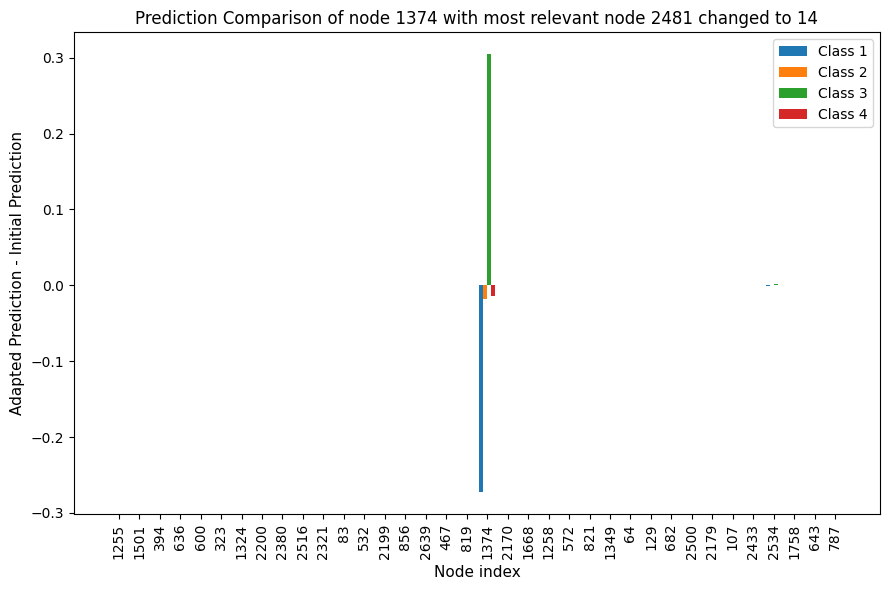

1
pred_after1374adapt_2656_6.pt
Prediction Score before:  [[0.47290045 0.05958526 0.41887403 0.04864031]] Prediction Score after:  [[0.21224126 0.04277905 0.70965075 0.03532889]]
1374
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([24, 12], dtype=int64))


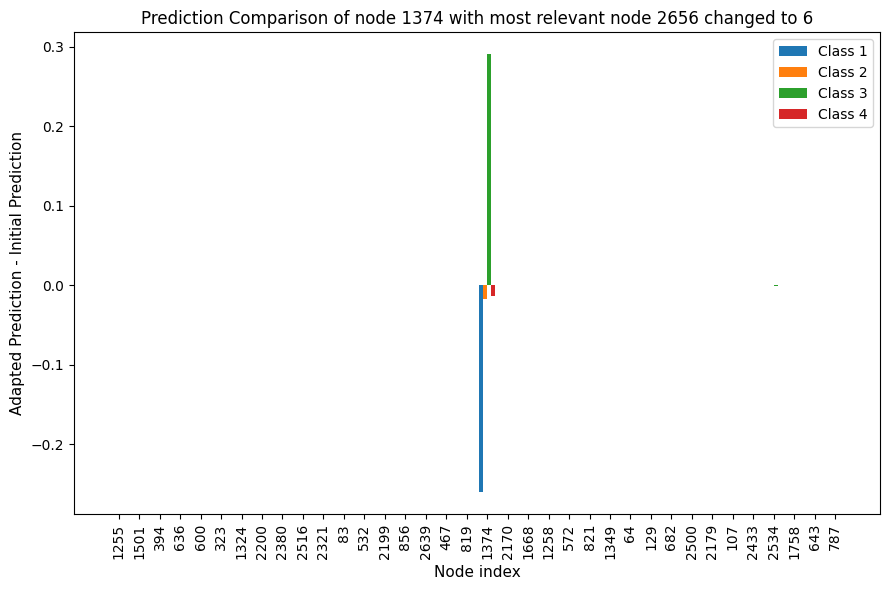

2
pred_after1374adapt_tensor([  42, 2656])_9.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


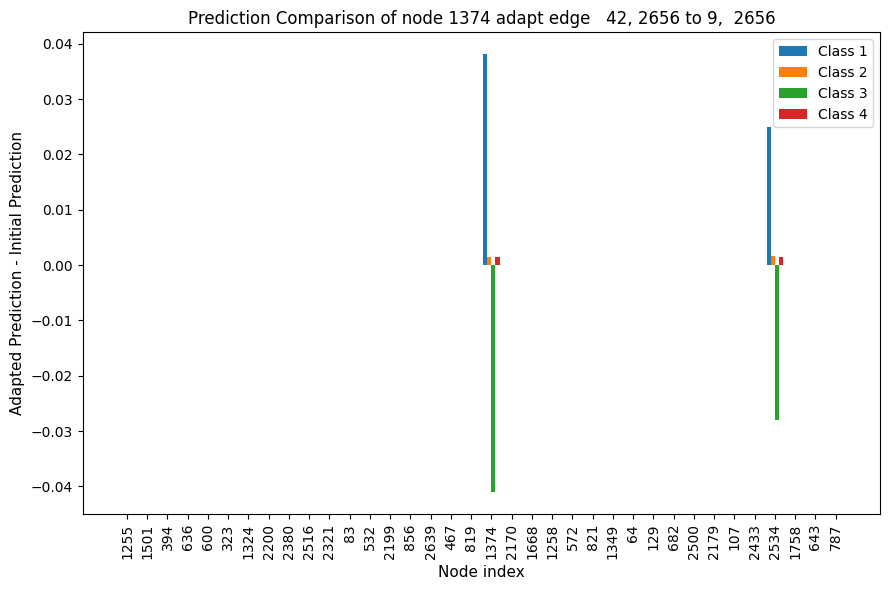

3
pred_after2170adapt_1226_2.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


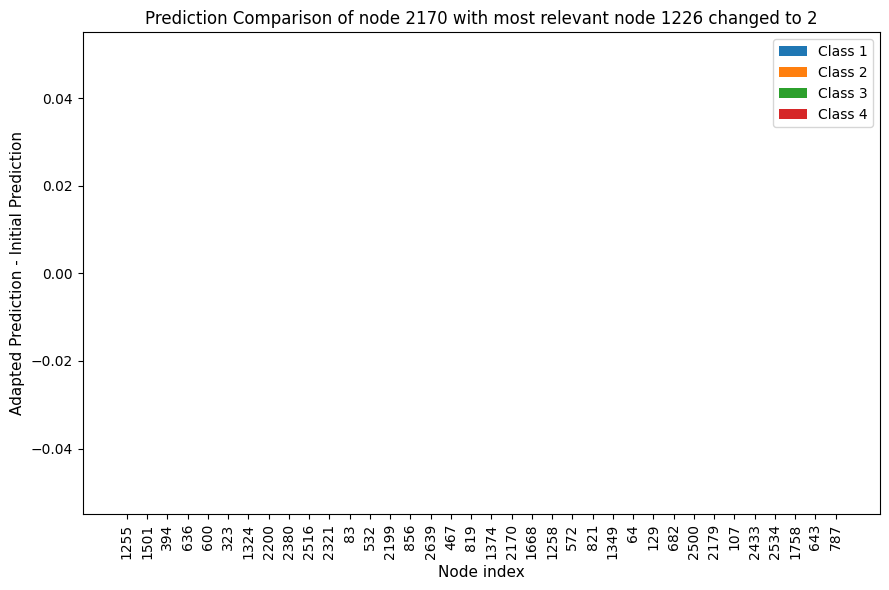

4
pred_after2170adapt_tensor([  27, 1226])_30.pt
Prediction Score before:  [[0.08546384 0.02342634 0.8716932  0.01941668]] Prediction Score after:  [[0.4563559  0.05504188 0.44366038 0.04494179]]
1668
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


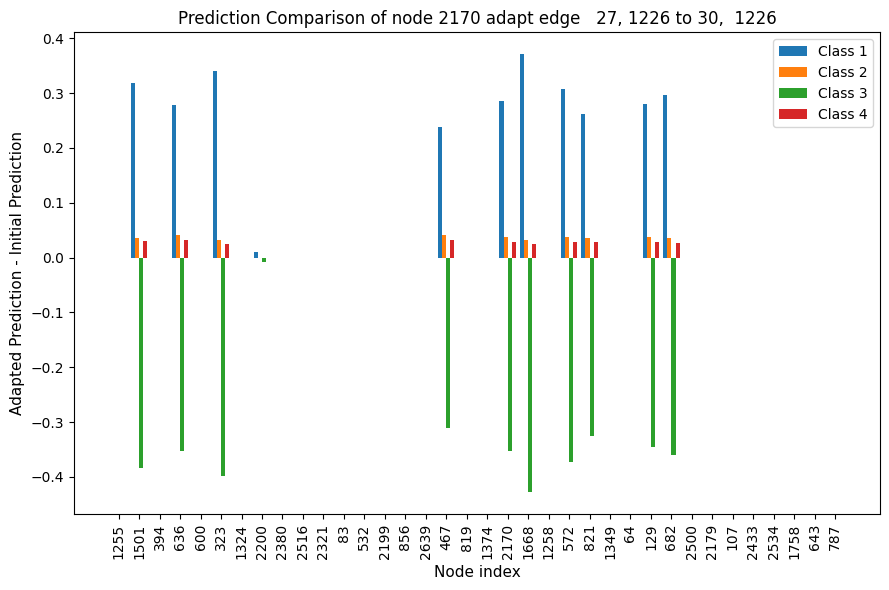

5
pred_after2534adapt_2481_6.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


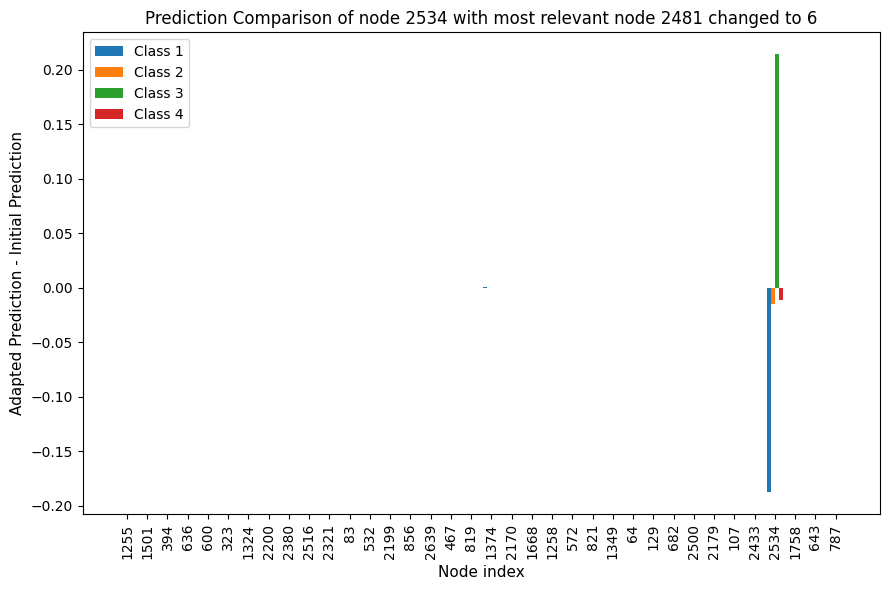

6
pred_after2534adapt_tensor([  42, 2481])_13.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


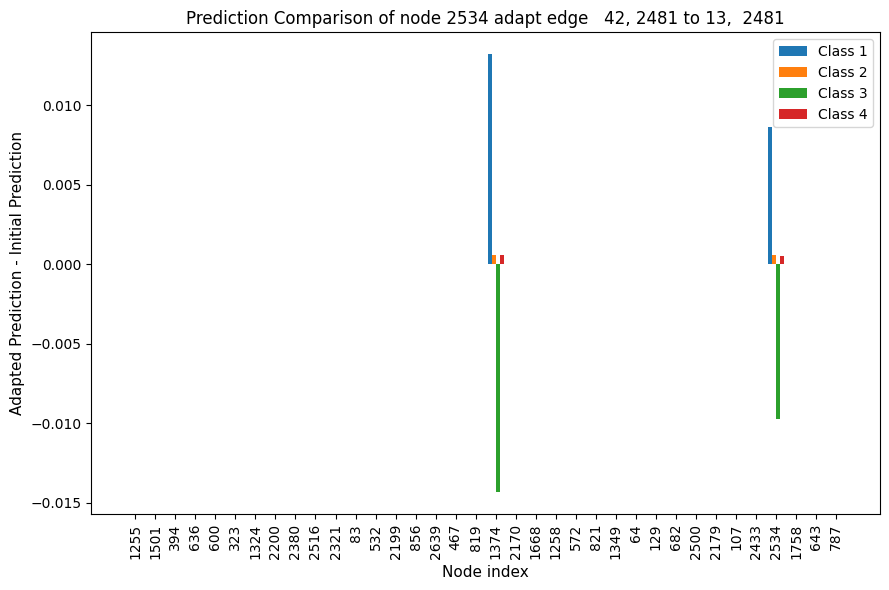

7
pred_after2534adapt_tensor([  42, 2656])_30.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


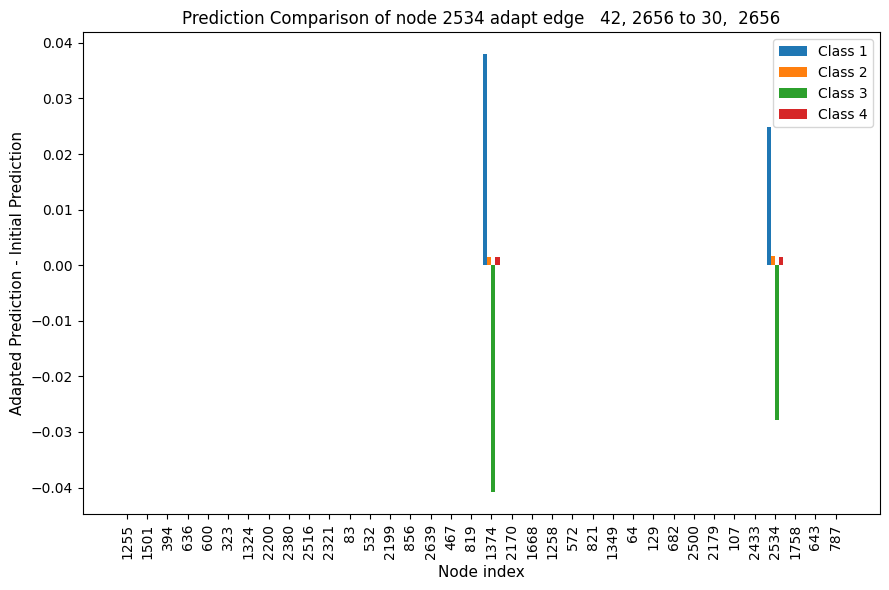

8
pred_after394adapt_2538_39.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


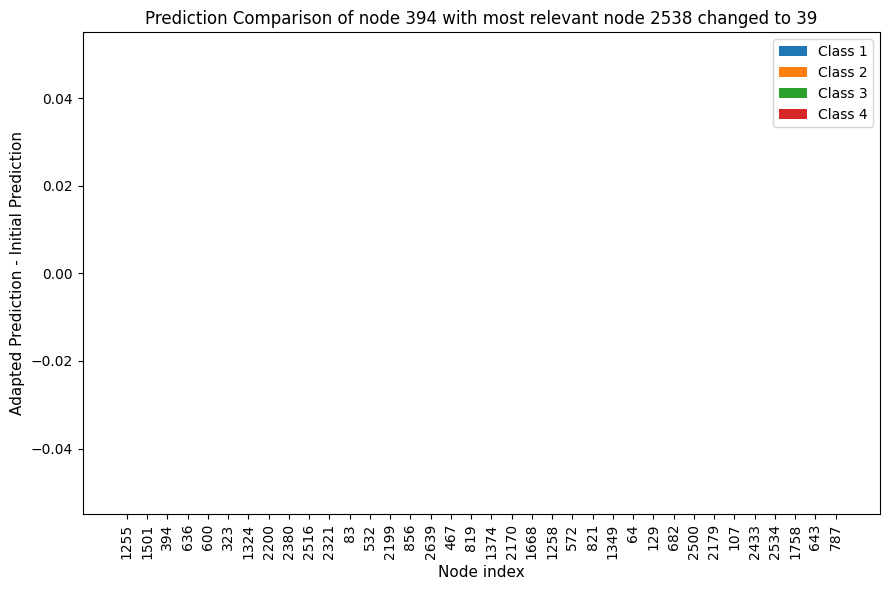

9
pred_after394adapt_tensor([  27, 2538])_12.pt
Prediction Score before:  [[0.6865881  0.058996   0.20954135 0.04487456]
 [0.6575092  0.06782997 0.22235154 0.05230932]
 [0.69159293 0.06022257 0.20216899 0.04601546]
 [0.61327535 0.06823842 0.26641497 0.05207132]
 [0.56456786 0.0750303  0.30104506 0.05935675]] Prediction Score after:  [[0.41961756 0.0572628  0.47914428 0.04397527]
 [0.3682864  0.06271064 0.5201375  0.04886552]
 [0.40395424 0.05805966 0.4931608  0.04482538]
 [0.31851998 0.05849856 0.5778766  0.04510481]
 [0.41732183 0.07125399 0.45476165 0.0566625 ]]
394
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([20, 16], dtype=int64))


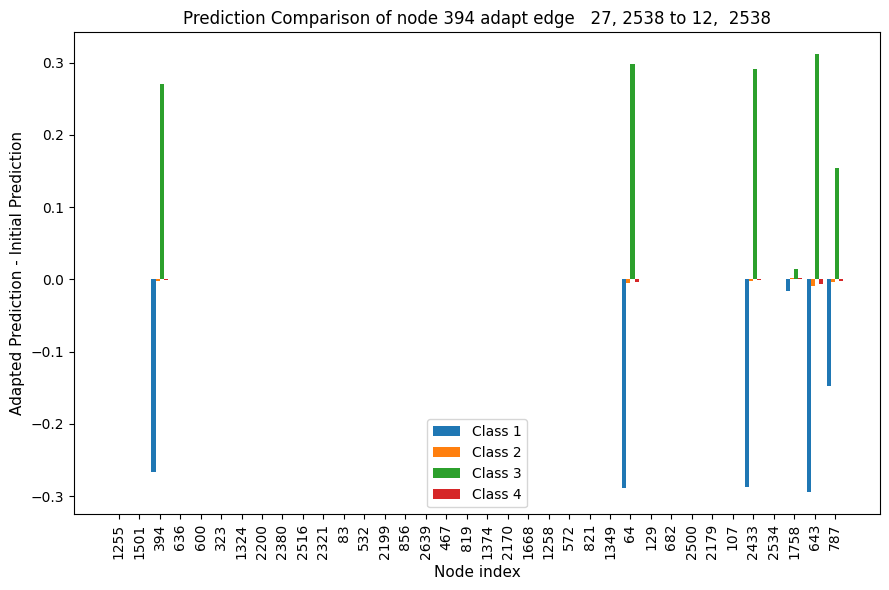

10
pred_after856adapt_1849_6.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


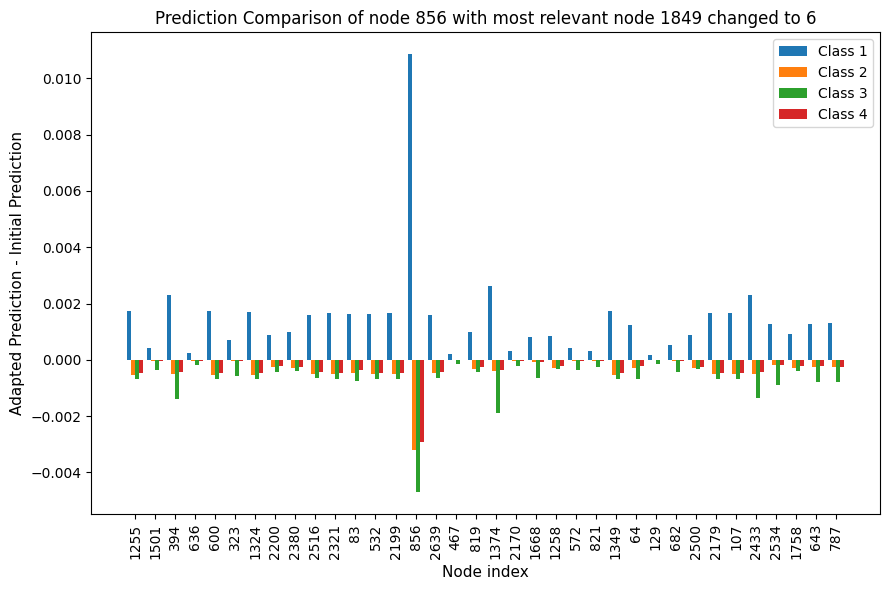

11
pred_after856adapt_tensor([   0, 1849])_17.pt
Prediction Score before:  [[0.47290045 0.05958526 0.41887403 0.04864031]] Prediction Score after:  [[0.41452816 0.06850205 0.45995188 0.05701787]]
1374
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([24, 12], dtype=int64))


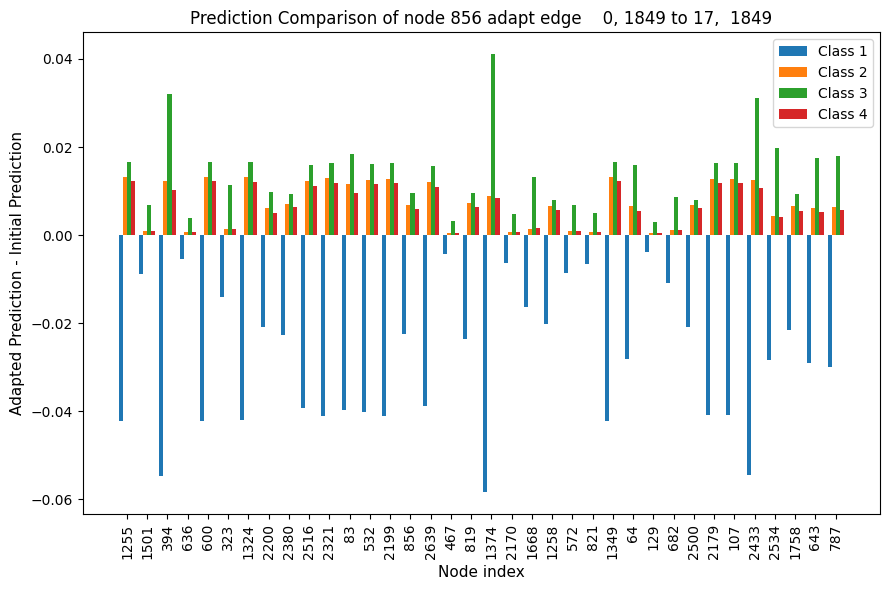

In [596]:
path = 'out/AIFB/RGCN_emb/'+model+'/'
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
print(len(diff))
for i in diff:
    print(i)
    percentage_changes = diff[i]
    name = fil[i]
    print(name)
    
    start_node = name.split('pred_after')[1].split('adapt')[0]
    if ch_index[i].size != 0:
        pb = pred_before[ch_index[i]]
        pa = dfs[i][ch_index[i]]
        print('Prediction Score before: ',pb, 'Prediction Score after: ', pa)
        print(test_idx[ch_index[i][0]])
    print(count_classes_before, count_cl_after[i])
    
    # Set the width of each bar
    bar_width = 0.2
    x_positions = np.arange(36)
    # Create a bar plot for each class
    plt.figure(figsize=(9, 6))
    plt.bar(x_positions - 1.5*bar_width, percentage_changes[:, 0], width=bar_width, label='Class 1')
    plt.bar(x_positions - 0.5*bar_width, percentage_changes[:, 1], width=bar_width, label='Class 2')
    plt.bar(x_positions + 0.5*bar_width, percentage_changes[:, 2], width=bar_width, label='Class 3')
    plt.bar(x_positions + 1.5*bar_width, percentage_changes[:, 3], width=bar_width, label='Class 4')

    # Set x-axis labels and tick positions
    plt.xticks(x_positions, test_idx, rotation='vertical', fontsize=10)
    plt.xlabel('Node index', fontsize=11)
    plt.ylabel('Adapted Prediction - Initial Prediction' , fontsize=11)
    if 'adapt_tensor' in name:
        relevant_edge = name.split('[')[1].split(']')[0]
        adapt_edge = name.split('_')[-1].split('.')[0]
        second_node = relevant_edge.split(',')[1]
        plt.title('Prediction Comparison of node {} adapt edge {} to {}, {}'.format(start_node, relevant_edge, adapt_edge, second_node))

    else:
        adapt_to = name.split('_')[2].split('_')[0]
        to_node = name.split('_')[3].split('.')[0]
        plt.title('Prediction Comparison of node {} with most relevant node {} changed to {}'.format(start_node, adapt_to,to_node))
    plt.legend()
    plt.tight_layout()
    plt.show()

# RGCN DistMult

In [599]:
model = 'DistMult'
csv = readallcsvinpath('out/AIFB/RGCN_emb/')
pred_before = torch.load('out/AIFB/RGCN_emb/'+model+'/pred_before.pt').to_dense().detach().numpy()
test_file = pd.read_csv('data/AIFB/testSet.tsv', sep='\t')

i2n = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/i2n.pkl')
n2i = {n:i for i, n in enumerate(i2n)}
i2r = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/i2r.pkl')

test_list = pd.read_pickle('out/AIFB/RGCN_emb/'+model+'/test_list.pkl')
test_idx = [n2i[name] for name, _ in test_list.items()]
for i,n in enumerate(i2n):
    if i == 234:
        print(n)

i2r
r2i = {r:i for i, r in enumerate(i2r)}
path = 'out/AIFB/RGCN_emb/'+model+'/'
pred_before = pred_before[test_idx]
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
fil.sort()
dfs = []
fil = fil[:len(fil)-1]
for file in fil:
    dfs.append(torch.load(path + file).to_dense()[test_idx].detach().numpy())
print(len(fil))
diff = {}
i=0                                
for i in range(len(fil)):
    minus = (dfs[i] - pred_before)
    diff[i] = minus
    # if minus.sum() != 0:
    #     diff[i] = minus
#len(diff)
classes_before = pred_before.argmax(axis=1)
count_changed,total_pred = 0,0
ch_index = []
cl_after = []
count_cl_after = []
for i in range(len(dfs)):
    classes = dfs[i].argmax(axis=1)
    changed_pred = np.sum([classes != classes_before])
    changed_index = np.where(classes != classes_before)[0]
    count_changed += changed_pred
    total_pred += len(classes)
    ch_index.append(changed_index)
    cl_after.append(classes)
    count_cl_after.append(np.unique(classes, return_counts=True))
    print(changed_pred)
print(len(dfs), total_pred,  count_changed)
score = count_changed / total_pred
print(ch_index[1])
print(score)
count_classes_before = np.unique(classes_before, return_counts=True)
count_classes_before

http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2137instance
12
0
1
0
1
0
3
0
1
0
3
0
3
12 432 12
[20]
0.027777777777777776


(array([0, 2], dtype=int64), array([25, 11], dtype=int64))

12
0
pred_after1501adapt_1226_32.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


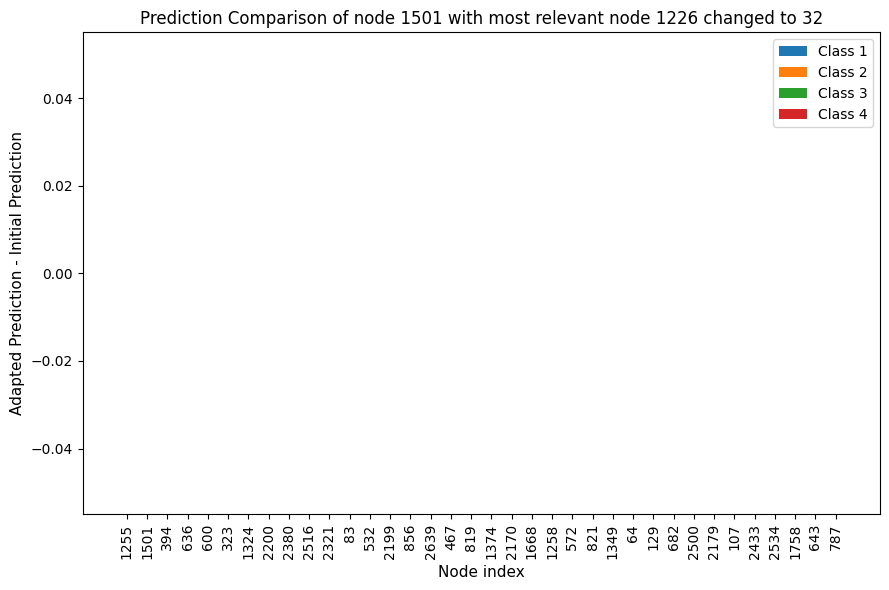

1
pred_after1501adapt_tensor([  27, 1226])_18.pt
Prediction Score before:  [[0.0951365  0.02688021 0.856581   0.02140229]] Prediction Score after:  [[0.49133503 0.05800147 0.4044087  0.04625485]]
1668
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


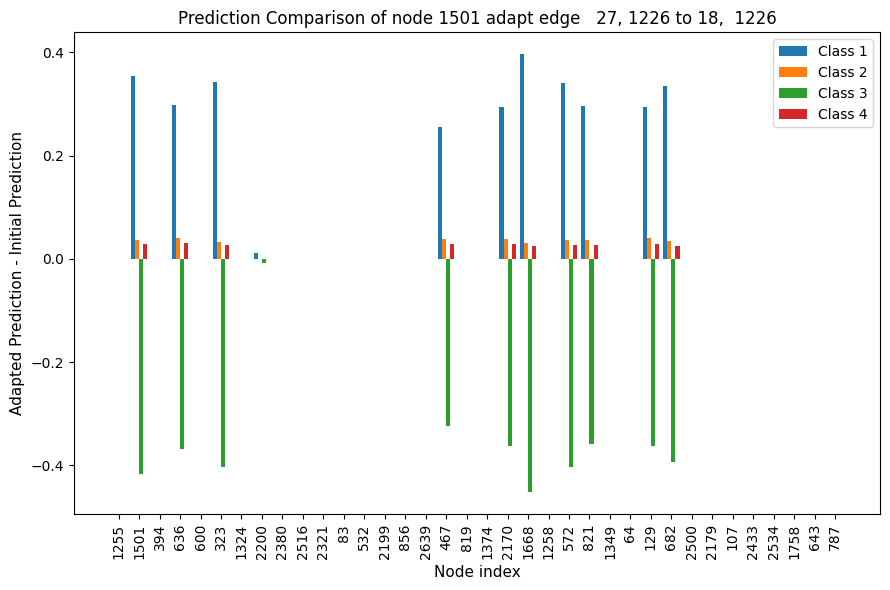

2
pred_after1668adapt_1226_25.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


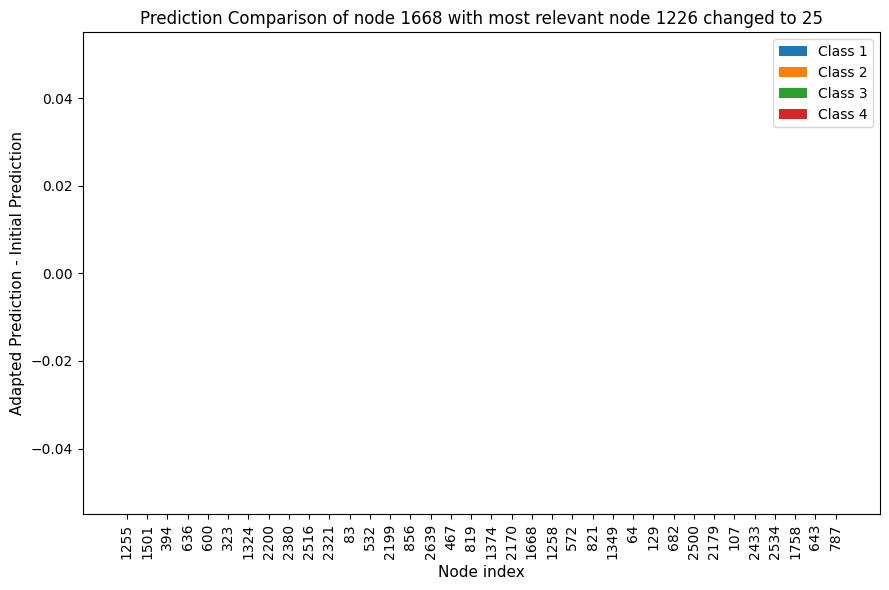

3
pred_after1668adapt_tensor([  27, 1226])_8.pt
Prediction Score before:  [[0.0951365  0.02688021 0.856581   0.02140229]] Prediction Score after:  [[0.49898195 0.05822424 0.39632037 0.04647342]]
1668
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


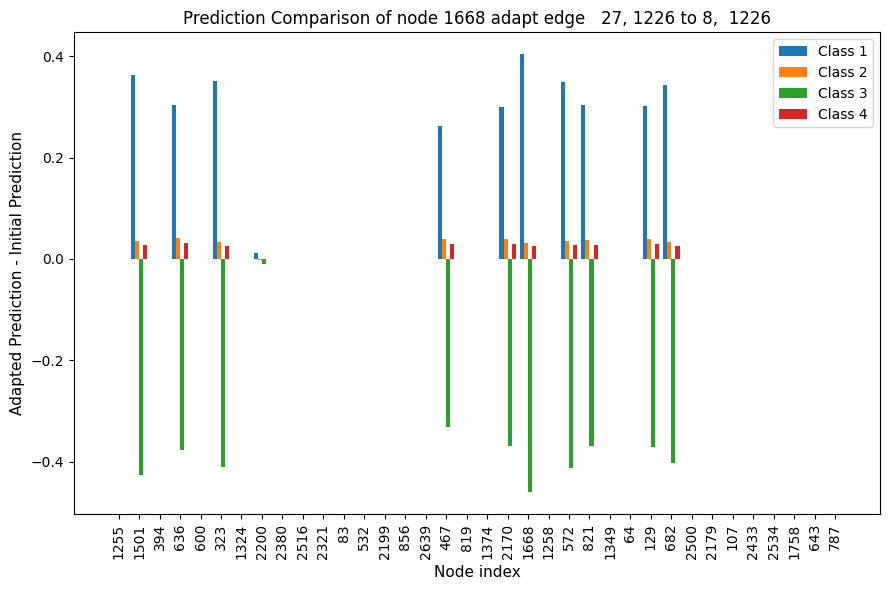

4
pred_after2433adapt_2538_30.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


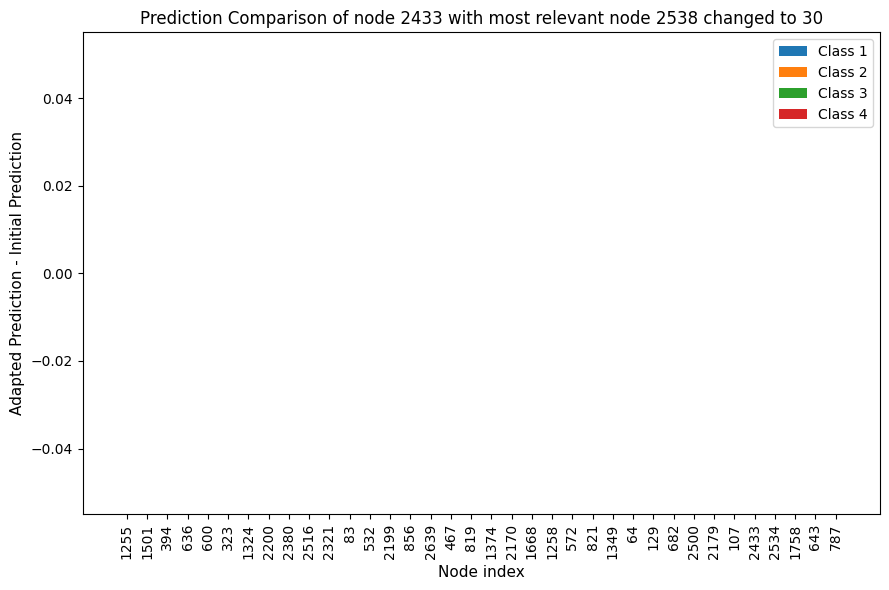

5
pred_after2433adapt_tensor([  27, 2538])_39.pt
Prediction Score before:  [[0.61300504 0.07129493 0.26116663 0.05453343]
 [0.5457085  0.07018629 0.33092603 0.05317924]
 [0.535246   0.07197166 0.33661726 0.05616508]] Prediction Score after:  [[0.409513   0.06834748 0.4698487  0.05229094]
 [0.33812112 0.06240567 0.5521783  0.04729484]
 [0.43124875 0.06946501 0.44507104 0.05421518]]
64
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([22, 14], dtype=int64))


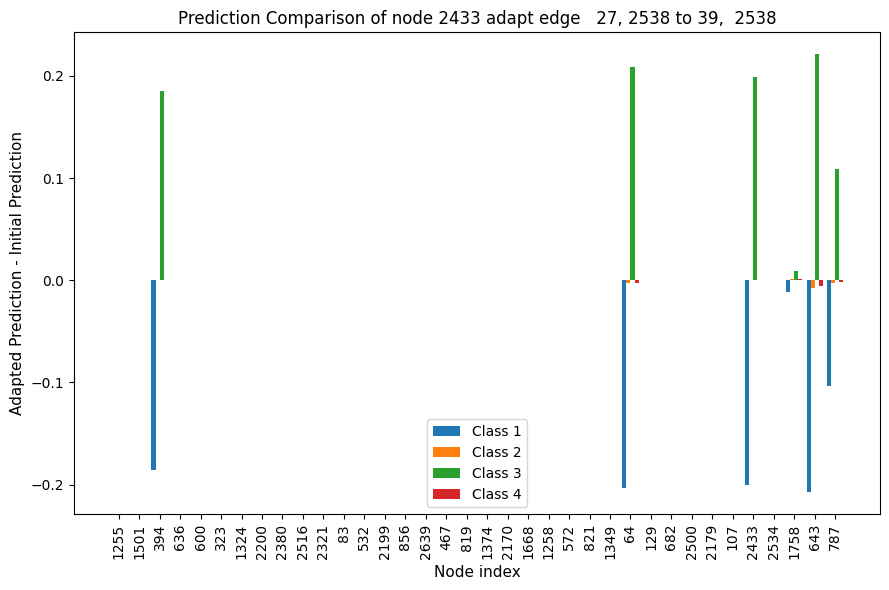

6
pred_after572adapt_1226_8.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


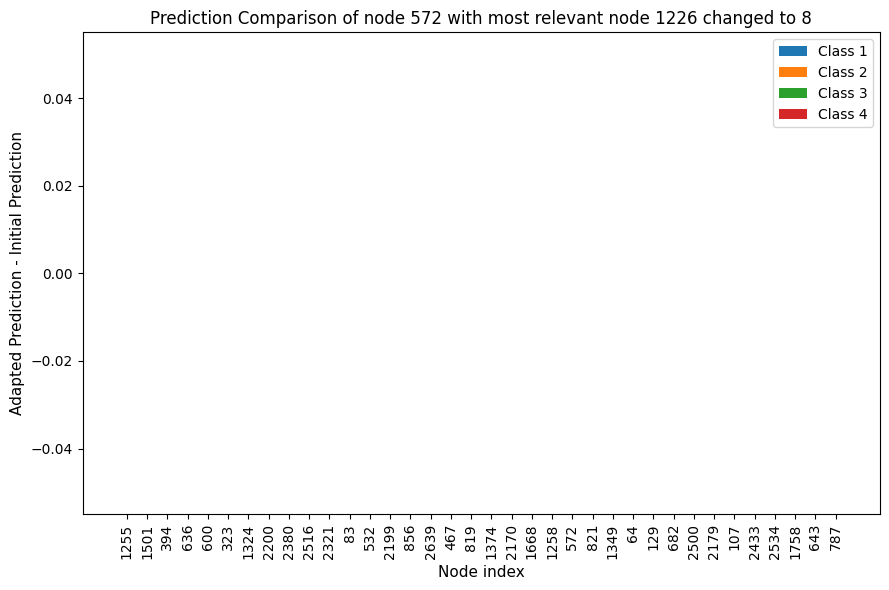

7
pred_after572adapt_tensor([  27, 1226])_10.pt
Prediction Score before:  [[0.0951365  0.02688021 0.856581   0.02140229]] Prediction Score after:  [[0.49153095 0.05801501 0.4041817  0.0462723 ]]
1668
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([26, 10], dtype=int64))


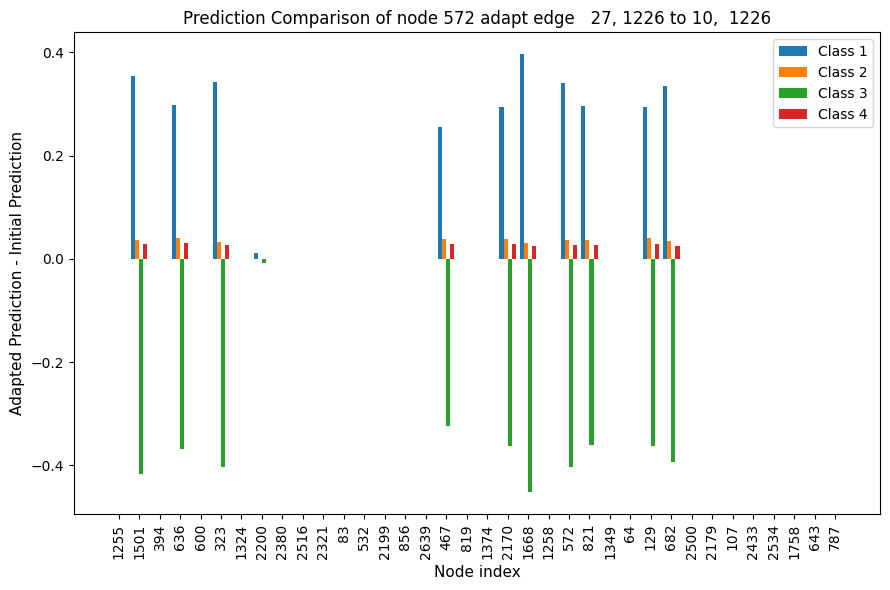

8
pred_after643adapt_2538_32.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


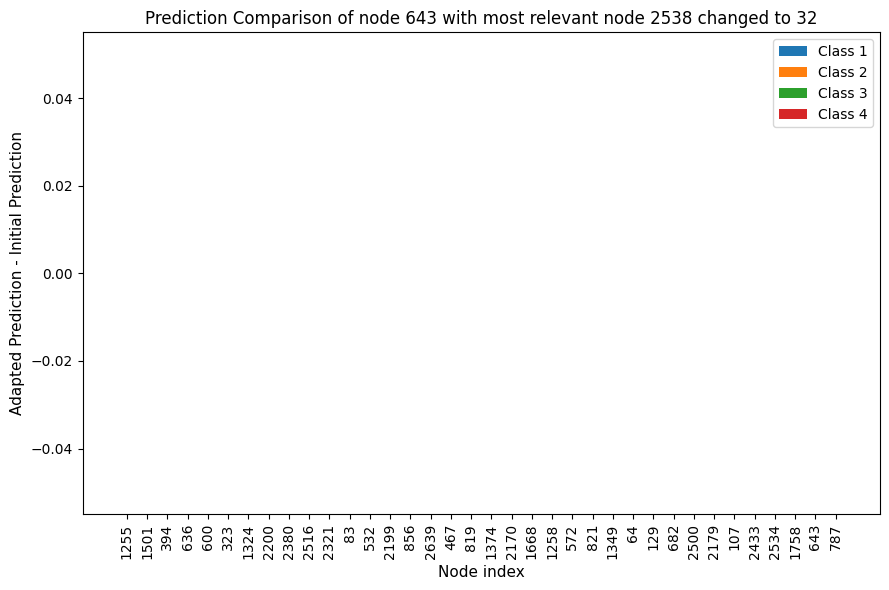

9
pred_after643adapt_tensor([  27, 2538])_39.pt
Prediction Score before:  [[0.61300504 0.07129493 0.26116663 0.05453343]
 [0.5457085  0.07018629 0.33092603 0.05317924]
 [0.535246   0.07197166 0.33661726 0.05616508]] Prediction Score after:  [[0.409513   0.06834748 0.4698487  0.05229094]
 [0.33812112 0.06240567 0.5521783  0.04729484]
 [0.43124875 0.06946501 0.44507104 0.05421518]]
64
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([22, 14], dtype=int64))


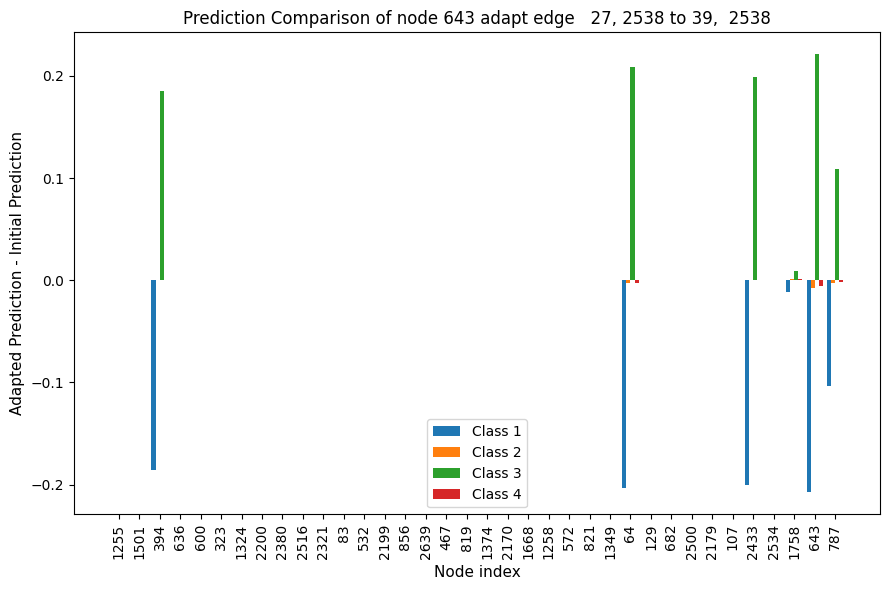

10
pred_after787adapt_2538_18.pt
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([25, 11], dtype=int64))


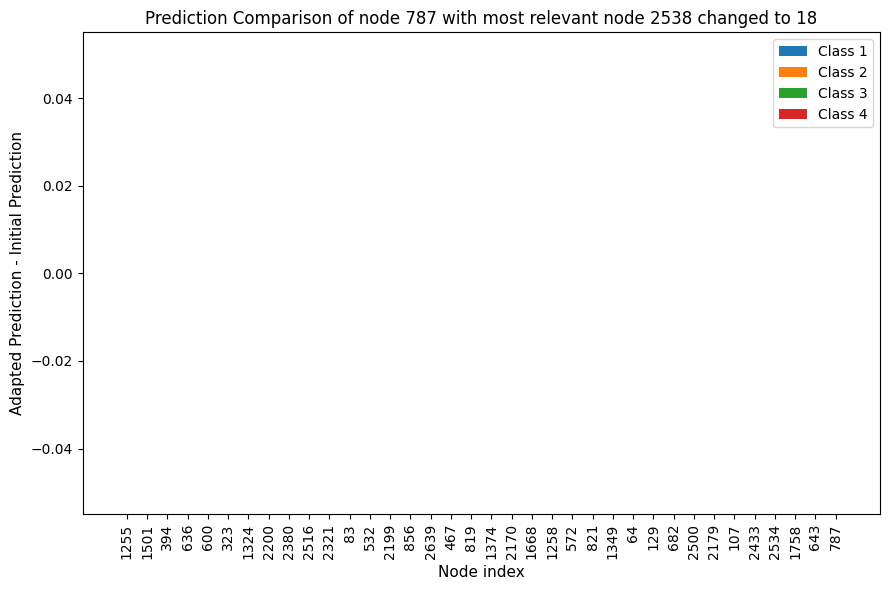

11
pred_after787adapt_tensor([  27, 2538])_41.pt
Prediction Score before:  [[0.61300504 0.07129493 0.26116663 0.05453343]
 [0.5457085  0.07018629 0.33092603 0.05317924]
 [0.535246   0.07197166 0.33661726 0.05616508]] Prediction Score after:  [[0.40834033 0.06833681 0.47103778 0.05228515]
 [0.33701333 0.06237011 0.5533465  0.04727001]
 [0.43065822 0.06946399 0.4456621  0.05421561]]
64
(array([0, 2], dtype=int64), array([25, 11], dtype=int64)) (array([0, 2], dtype=int64), array([22, 14], dtype=int64))


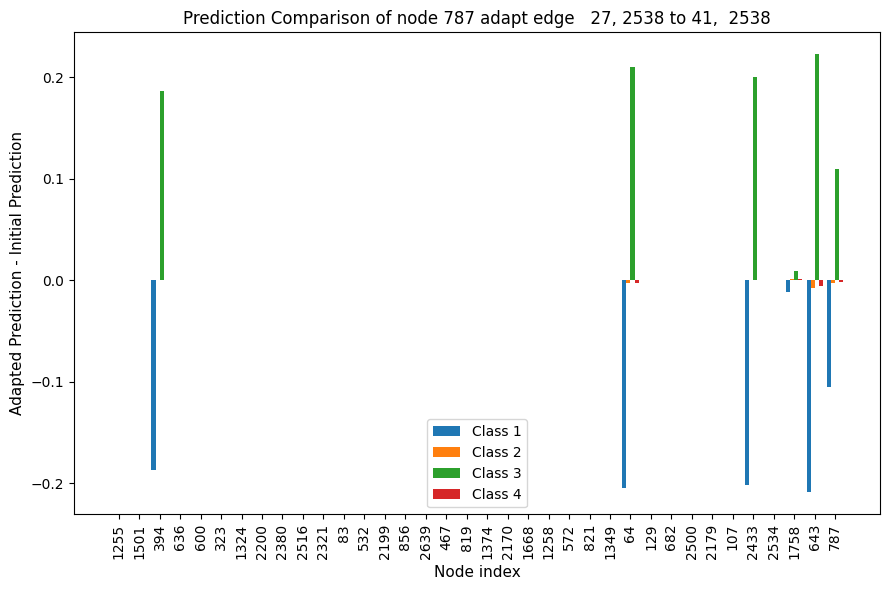

In [600]:
path = 'out/AIFB/RGCN_emb/'+model+'/'
fil = os.listdir(path)
fil = [file for file in fil if file.endswith(".pt")]
print(len(diff))
for i in diff:
    print(i)
    percentage_changes = diff[i]
    name = fil[i]
    print(name)
    
    start_node = name.split('pred_after')[1].split('adapt')[0]
    if ch_index[i].size != 0:
        pb = pred_before[ch_index[i]]
        pa = dfs[i][ch_index[i]]
        print('Prediction Score before: ',pb, 'Prediction Score after: ', pa)
        print(test_idx[ch_index[i][0]])
    print(count_classes_before, count_cl_after[i])
    
    # Set the width of each bar
    bar_width = 0.2
    x_positions = np.arange(36)
    # Create a bar plot for each class
    plt.figure(figsize=(9, 6))
    plt.bar(x_positions - 1.5*bar_width, percentage_changes[:, 0], width=bar_width, label='Class 1')
    plt.bar(x_positions - 0.5*bar_width, percentage_changes[:, 1], width=bar_width, label='Class 2')
    plt.bar(x_positions + 0.5*bar_width, percentage_changes[:, 2], width=bar_width, label='Class 3')
    plt.bar(x_positions + 1.5*bar_width, percentage_changes[:, 3], width=bar_width, label='Class 4')

    # Set x-axis labels and tick positions
    plt.xticks(x_positions, test_idx, rotation='vertical', fontsize=10)
    plt.xlabel('Node index', fontsize=11)
    plt.ylabel('Adapted Prediction - Initial Prediction' , fontsize=11)
    if 'adapt_tensor' in name:
        relevant_edge = name.split('[')[1].split(']')[0]
        adapt_edge = name.split('_')[-1].split('.')[0]
        second_node = relevant_edge.split(',')[1]
        plt.title('Prediction Comparison of node {} adapt edge {} to {}, {}'.format(start_node, relevant_edge, adapt_edge, second_node))

    else:
        adapt_to = name.split('_')[2].split('_')[0]
        to_node = name.split('_')[3].split('.')[0]
        plt.title('Prediction Comparison of node {} with most relevant node {} changed to {}'.format(start_node, adapt_to,to_node))
    plt.legend()
    plt.tight_layout()
    plt.show()